# Using Predicitive Modeling with RF to identify Important factors and help determine phone campaign success rate for a Portuguese bank

_____________________________
## Introduction
- The purpose of this project was to analyze a dataset of our choice and use different modeling techniques to solve a classification problem. 

- In this case, we are looking at the effectiveness of phone telemarketing campgin and the outcome of a previous one.

    - We utilize the Banking Marketing Data Set(s) from a Portuguese banking instition to do so, by looking at their sucess at bank telemarketing on a previous campaign. 
    
        - Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
    
       
    - I built a final model that justifies that the telemarketing campaign outcomes, and how they can  be improved on. The harmonic mean is 88% but callers only have ~8% succuess rate to sell the product, which means for anomoly detection Decision Trees are fundamentally preferred.

- The dataset consisted of both continuous and categorical values, and that posseses a challenge to determine if a customer will subscribe to a product of the bank( 'y' in the dataset) 


    - Classification models that include binary variable prediction that were used are but not limited to, decision trees, random forest etc.

___________________________________


# Current Buisness Problem 

- As stated in the introduction, we are looking at how an previous phone campaign's outcome to a successful contacted customer that bought a 'subscription' from the bank. This helps increase the bank's financial standing by:
   
    - Looking at dominant trends and patterns amongst different demographic, social, political etc domains of a customer prior to calling
   
    - Assessing chances of getting a successful transaction between customers
   
    - Using models to help determine if choosing this type of campaigning is worth it. 


- Some banks rely on many different campaigns to obtain capital and expand their buisness, they must make some sacrifices in order to do so. This is done by dedicating some resources to the campaign and in order to minimize loss: they can use predicitive modeling before launching a campaign. 

    - this will assess the risk involved with respect to the resources used.
    
    - this will then allow users to determine *if this method of campaigning is still viable*



- The stake holders, financial institutions, are responsibile for performing such campaigns, insight on the modelling process is beneficial and would assist the bank by providing the following values:
    
    - using a metric (F1 score) to determine the sucess of the campaign
    
    - providing insight on potential monetary gains or losses 
    
    - other finding and recommendations that a simple data analysis cannot obtain

__________________

# EDA with a Buisness Driven approach 

- While the source website https://archive.ics.uci.edu/ml/datasets/Bank+Marketing# gives us a clear understanding of the columns, we need to look at the data more indepth in order to look at the descriptive statistics of the features. The major limitation in this dataset is that it is *an imbalanced class*- thus we need to take precauation throughout EDA and data preparation. 
    
    - affects the model's performance and interpretation if not treated properly.
    
         - but gives us insights on how the following, affects the outcome of a campaign:
             - demographics of a customer, 
             - customer's financial standing
             - time
             - factors relating to the campaign (internal)
             - factors relating to the economy at the time (external)

- A decision tree approach was taken over other models, thus along with eda: data processing & modeling techniques will be addressed to fit the address any problems that may disfavor the performance of the decision tree model.

In [1]:
#import preliminary libraries 
import pandas as pd
import numpy as np 
import csv 
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)#visual purposes

In [2]:
#read csv 
df = pd.read_csv(r"C:\Users\Gamer\Documents\Ironflat\P3 project\Phase 3 Project\bank-additional-full.csv", sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Data Understanding 

Summary
    
     This file has all the updated columns described on their website, the time range is from May 2008 to Nov 2010: thus this was a two year+ attempt at improving sales through phone calls. Other datasets can be used to test our model deployment with further investigation

     The shape of the data frame is 41,188 by 21 columns, there are 41,188 attempts to secure a bank loan in the resulting boolean value of true/valse (needs to be transformed for a decision tree). Business relationships exist because of the customer, thus their demographics matter. 
    
     Age, job, marital status, education, can be demographical factors of the customer. 
    
    Default, housing, loan, can be economical factors of the customer. Contact, month, day of week, may indiciate some communication factors. Campaign, p days, previous, poutcome, are factors related to the campaign. 

   If we cumulate the factors into their respective domains then we can perhaps find some insights.


- Additionally the other factors are explained as follows:

    - We understand that a fiscal year is from the first of Jan to the 31st of December. The following indicators are explained and related to the fiscal year and are external economic factors.

    - Emperical variation rate may be employment rate and is measured every 3 months (quarterly): https://tradingeconomics.com/portugal/employment-rate . 
    
    - Consumer price index is an indicator of showing how a piece of steak costs now and then a few years from now, that index is the rate at which it changes. This is measured every 1 month, according to: https://www.economy.com/portugal/consumer-price-index-cpi. 

    - The consumer confidence index is a survey that measures how 'optimistic or pessimistic they are about finances' https://www.investopedia.com/insights/understanding-consumer-confidence-index/ they are every 1 month. 

    - Euribor is euro interbank offered rate, which is the interest rate at which banks lend each other money, this is every 3 months https://www.global-rates.com/en/interest-rates/euribor/euribor-interest-3-months.aspx.

    
    - Nr_Employed is the number of employees.



In [3]:
#Check for existing null values
null = df.isnull().sum()
null


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
#0 null values lets look at the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
#make a list of the column names, .columns will return an index so just make that into a list 
column_name= list(df.columns)

In [6]:
column_name

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [7]:
#we need the value counts and this method works great for at a quick glance
#https://stackoverflow.com/questions/32589829/how-to-get-value-counts-for-multiple-columns-at-once-in-pandas-dataframe

#take all the columns that are an object and assign it to a list, call that list cat cols
cat_cols = df.select_dtypes(include=object).columns.tolist()

#create a dataframe the following is interpreted from https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
#pd.DataFrame(data, index, collumns) and in this case everything is one long chain 
valuecountchart= (pd.DataFrame(
   #1create a df strictly with objects
    df[cat_cols]
    
    #2where we pivot the table 90 degrees , and have the first column represent the column names
    #3then it branches out to where you have the unique rows of each column called value
    #4and then take the counts of them and make it into the third column called counts
   
    .melt(var_name='column', value_name='value')
    
    .value_counts())
#this was probably for step 4
.rename(columns={0: 'counts'})
#sort the values by column and unique counts and display
.sort_values(by=['column', 'counts']))

In [8]:
#it would be worth revisiting this table for future visualizations
valuecountchart

counts
column      value                      
contact     telephone             15044
            cellular              26144
day_of_week fri                    7827
            tue                    8090
            wed                    8134
            mon                    8514
            thu                    8623
default     yes                       3
            unknown                8597
            no                    32588
education   illiterate               18
            unknown                1731
            basic.6y               2292
            basic.4y               4176
            professional.course    5243
            basic.9y               6045
            high.school            9515
            university.degree     12168
housing     unknown                 990
            no                    18622
            yes                   21576
job         unknown                 330
            student                 875
            unemployed             1014
            housemaid              1060
            self-employed          1421
            entrepreneur           1456
            retired                1720
            management             2924
            services               3969
            technician             6743
            blue-collar            9254
            admin.                10422
loan        unknown                 990
            yes                    6248
            no                    33950
marital     unknown                  80
            divorced               4612
            single                11568
            married               24928
month       dec                     182
            mar                     546
            sep                     570
            oct                     718
            apr                    2632
            nov                    4101
            jun                    5318
            aug                    6178
            jul                    7174
            may                   13769
poutcome    success                1373
            failure                4252
            nonexistent           35563
y           yes                    4640
            no                    36548

In [9]:
#the primitative approach is 
#apple the valuecounts to dfcatcols 
dfcat_cols= df[cat_cols].apply(pd.Series.value_counts)
#display(dfcat_cols)
#reset the index to include all the values possible within the df that are an object 
dfcatcols1 = dfcat_cols.reset_index()
#create this list 
dfcatcol2 = list((dfcatcols1.drop(columns='index')).columns)



In [10]:
#fill na seperately because th eoriginal df gives us nan values which we cant use asc=False
dfcatcols = dfcatcols1.fillna(value=0)

In [11]:
#this should return an pd of all the value counts
dfcatcols

,index,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,admin.,10422.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,apr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2632.0,0.0,0.0,0.0
2,aug,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6178.0,0.0,0.0,0.0
3,basic.4y,0.0,0.0,4176.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,basic.6y,0.0,0.0,2292.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,basic.9y,0.0,0.0,6045.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,blue-collar,9254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,cellular,0.0,0.0,0.0,0.0,0.0,0.0,26144.0,0.0,0.0,0.0,0.0
8,dec,0.0,0.0,0.0,0.0,0.0,0.0,0.0,182.0,0.0,0.0,0.0
9,divorced,0.0,4612.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#sort by ascending 
dfcatcols.sort_values(by=dfcatcol2, inplace=True,
            ascending = False)

In [13]:
#https://www.geeksforgeeks.org/how-to-drop-rows-that-contain-a-specific-string-in-pandas/
#useful forcolumn manipulation and deleting rows by setting it to false based on the conditional
dfcatcols = dfcatcols[dfcatcols["index"].str.contains("yes|no") == False]

In [14]:
#so that you can sort by ascending 
dfcatcols

,index,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,admin.,10422.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,blue-collar,9254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,technician,6743.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,services,3969.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,management,2924.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,retired,1720.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,entrepreneur,1456.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,self-employed,1421.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,housemaid,1060.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,unemployed,1014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#https://stackoverflow.com/questions/51937381/increase-dpi-of-matplotlib-show-in-jupyter-notebook
#needed to increase DPI for matlab b/c vis is hard
import matplotlib as mpl
import matplotlib.image as mpimg

mpl.rcParams['figure.dpi'] = 500


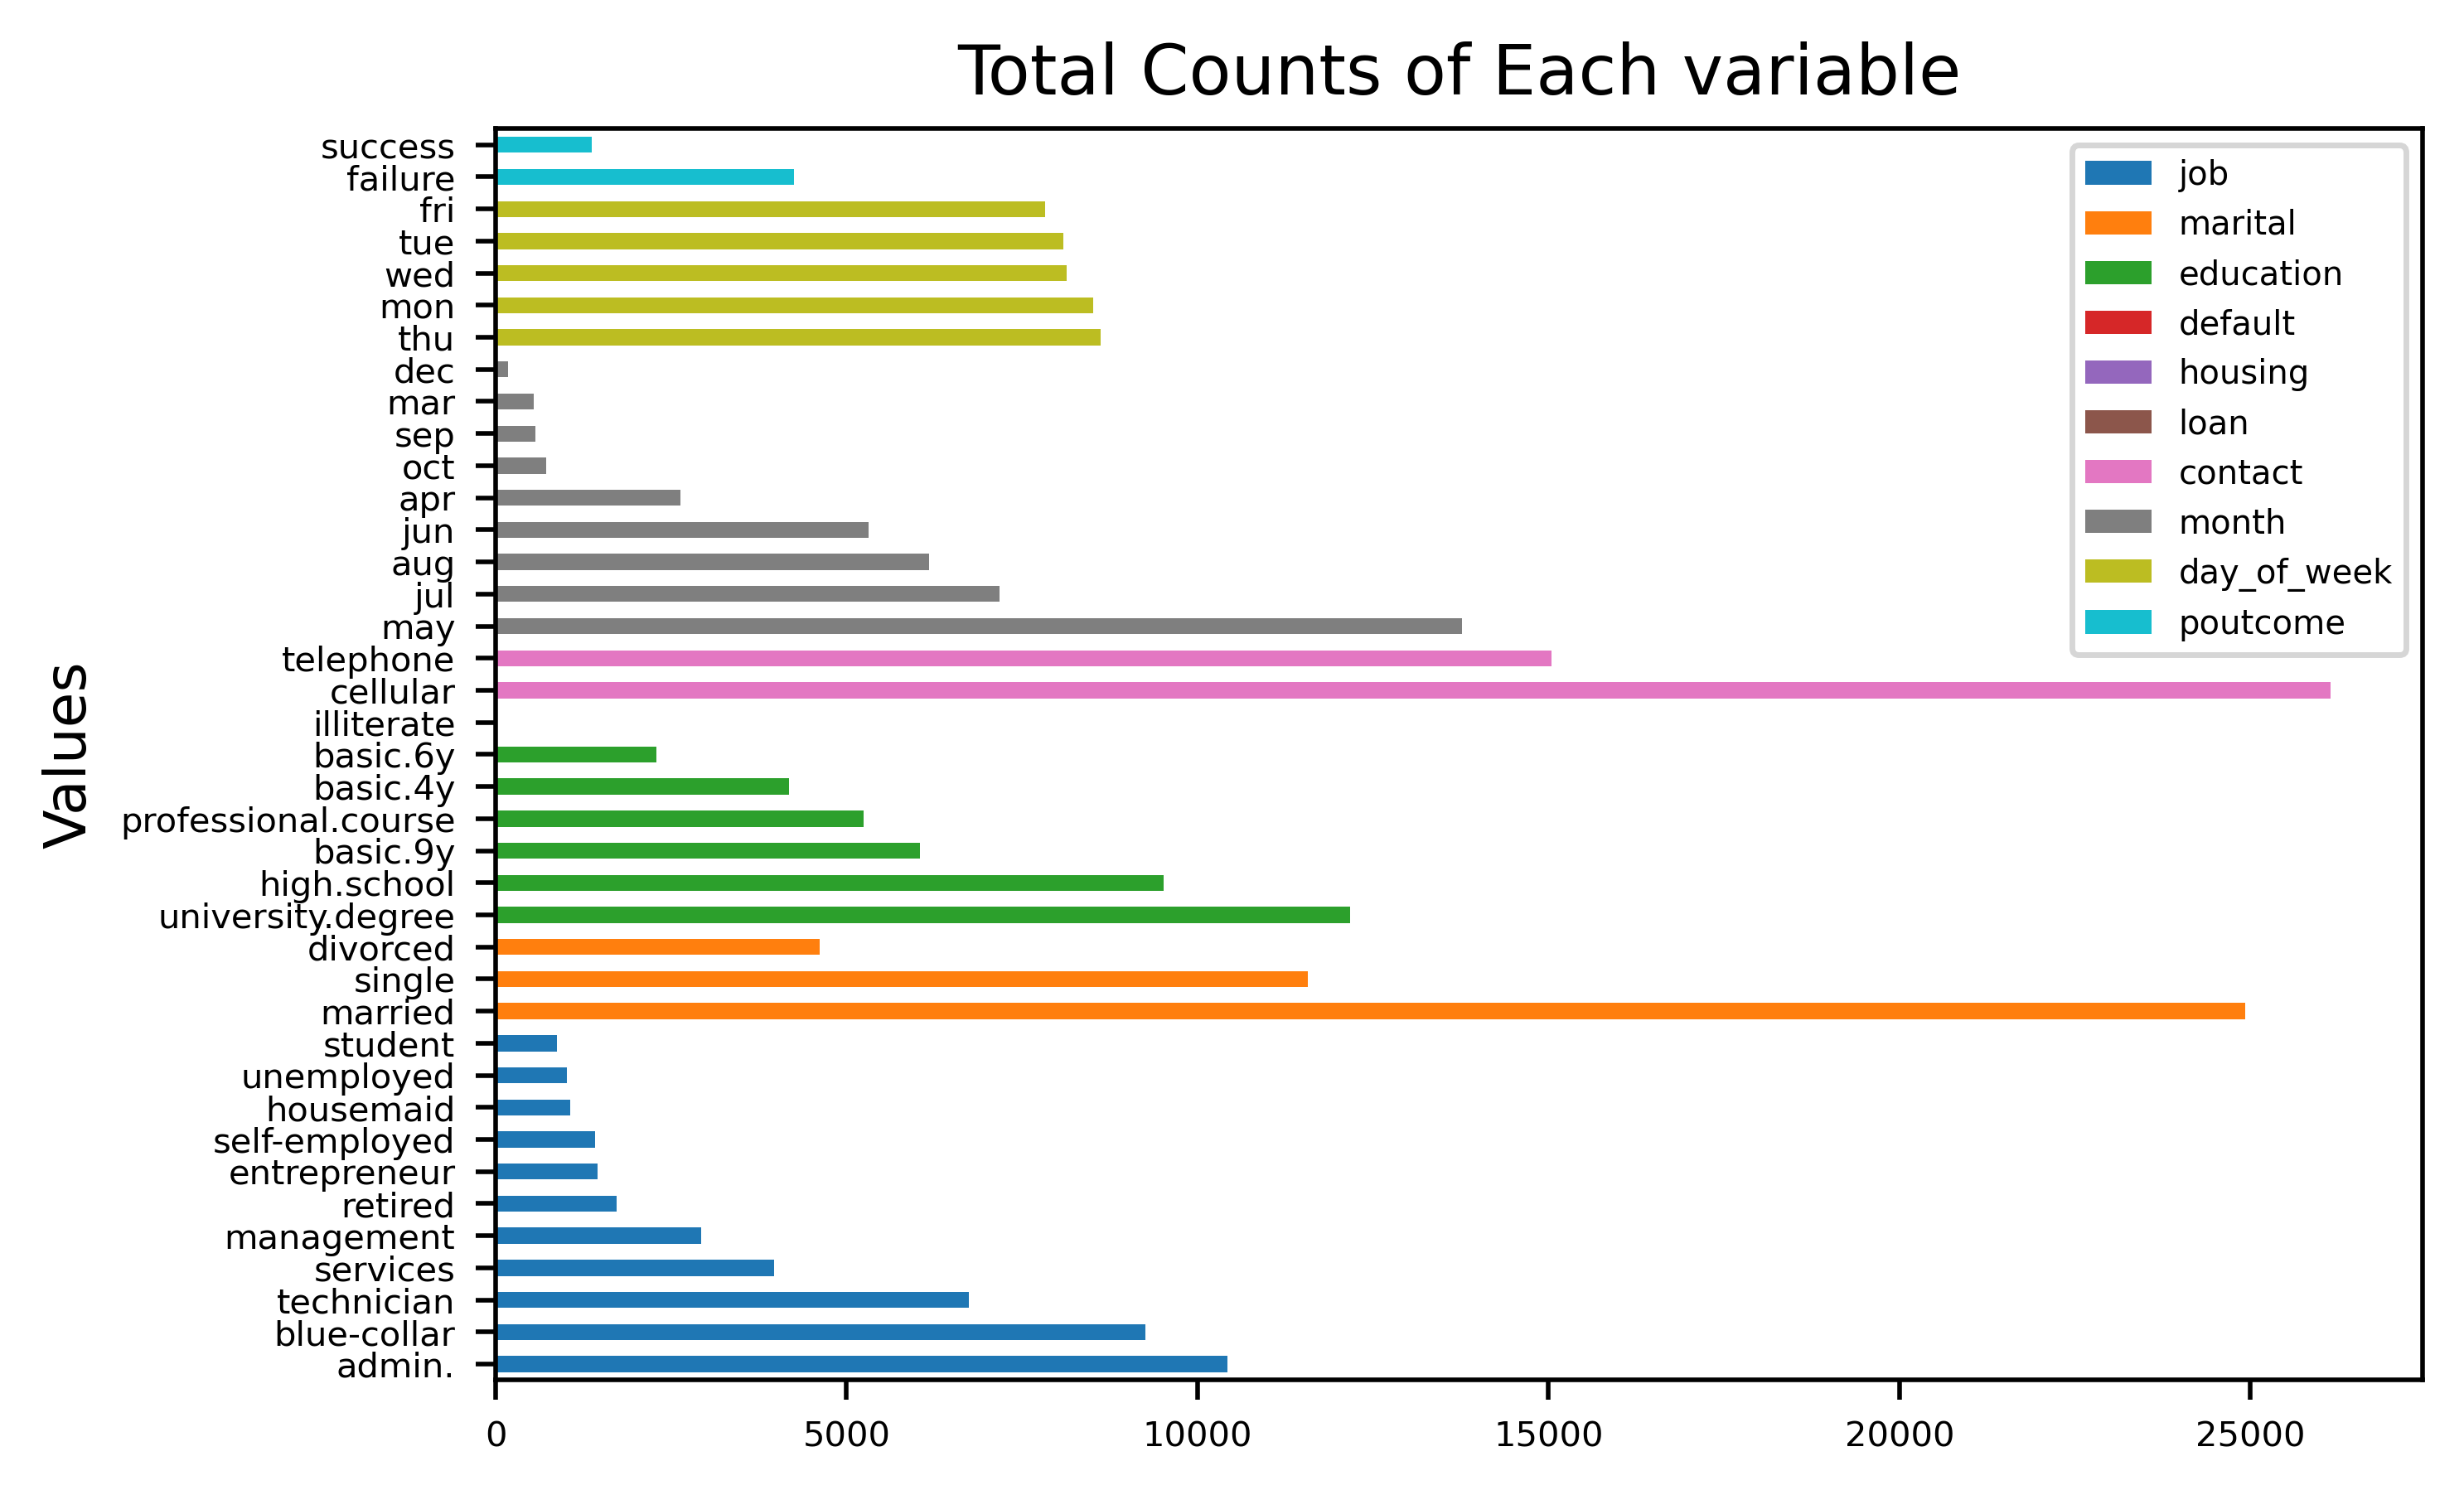

In [16]:
#plot
ax = dfcatcols.plot.barh(x='index', y=['job', 'marital',	'education',	'default',	'housing',	'loan'	,
                            'contact',	'month',	'day_of_week',	'poutcome'],	
 title ='Total Counts of Each variable', xlabel = 'Values', ylabel = 'Total counts', fontsize = 6,  stacked=True)
plt.legend(fontsize="xx-small")


In [17]:
#save
#plt.savefig('Value counts for data .png')

This is a value graph accounting for each unique value that is an object based column in the original dataframe, on the y axis we have the name of the values, and x is the # of counts. The legend helps refer to the original dataframes column name and helps colorize our chart.



**We can see that the population reached prefered:**
 - cellular conversaiton over telphone. 
 - the person was a university educated person and married 
 - They also were in an adminsitrative position 


Now its time to focus a bit more indepth on the value themselves and how they are distributed.

In [18]:
#we need to change the output to a binary for our model and also for a correlation matrix  
df['y'] = np.where(df['y']  ==  'yes' , '1', df['y'])
df['y'] = np.where(df['y']  ==  'no' , '0', df['y'])
df['y'] = df['y'].astype(int)

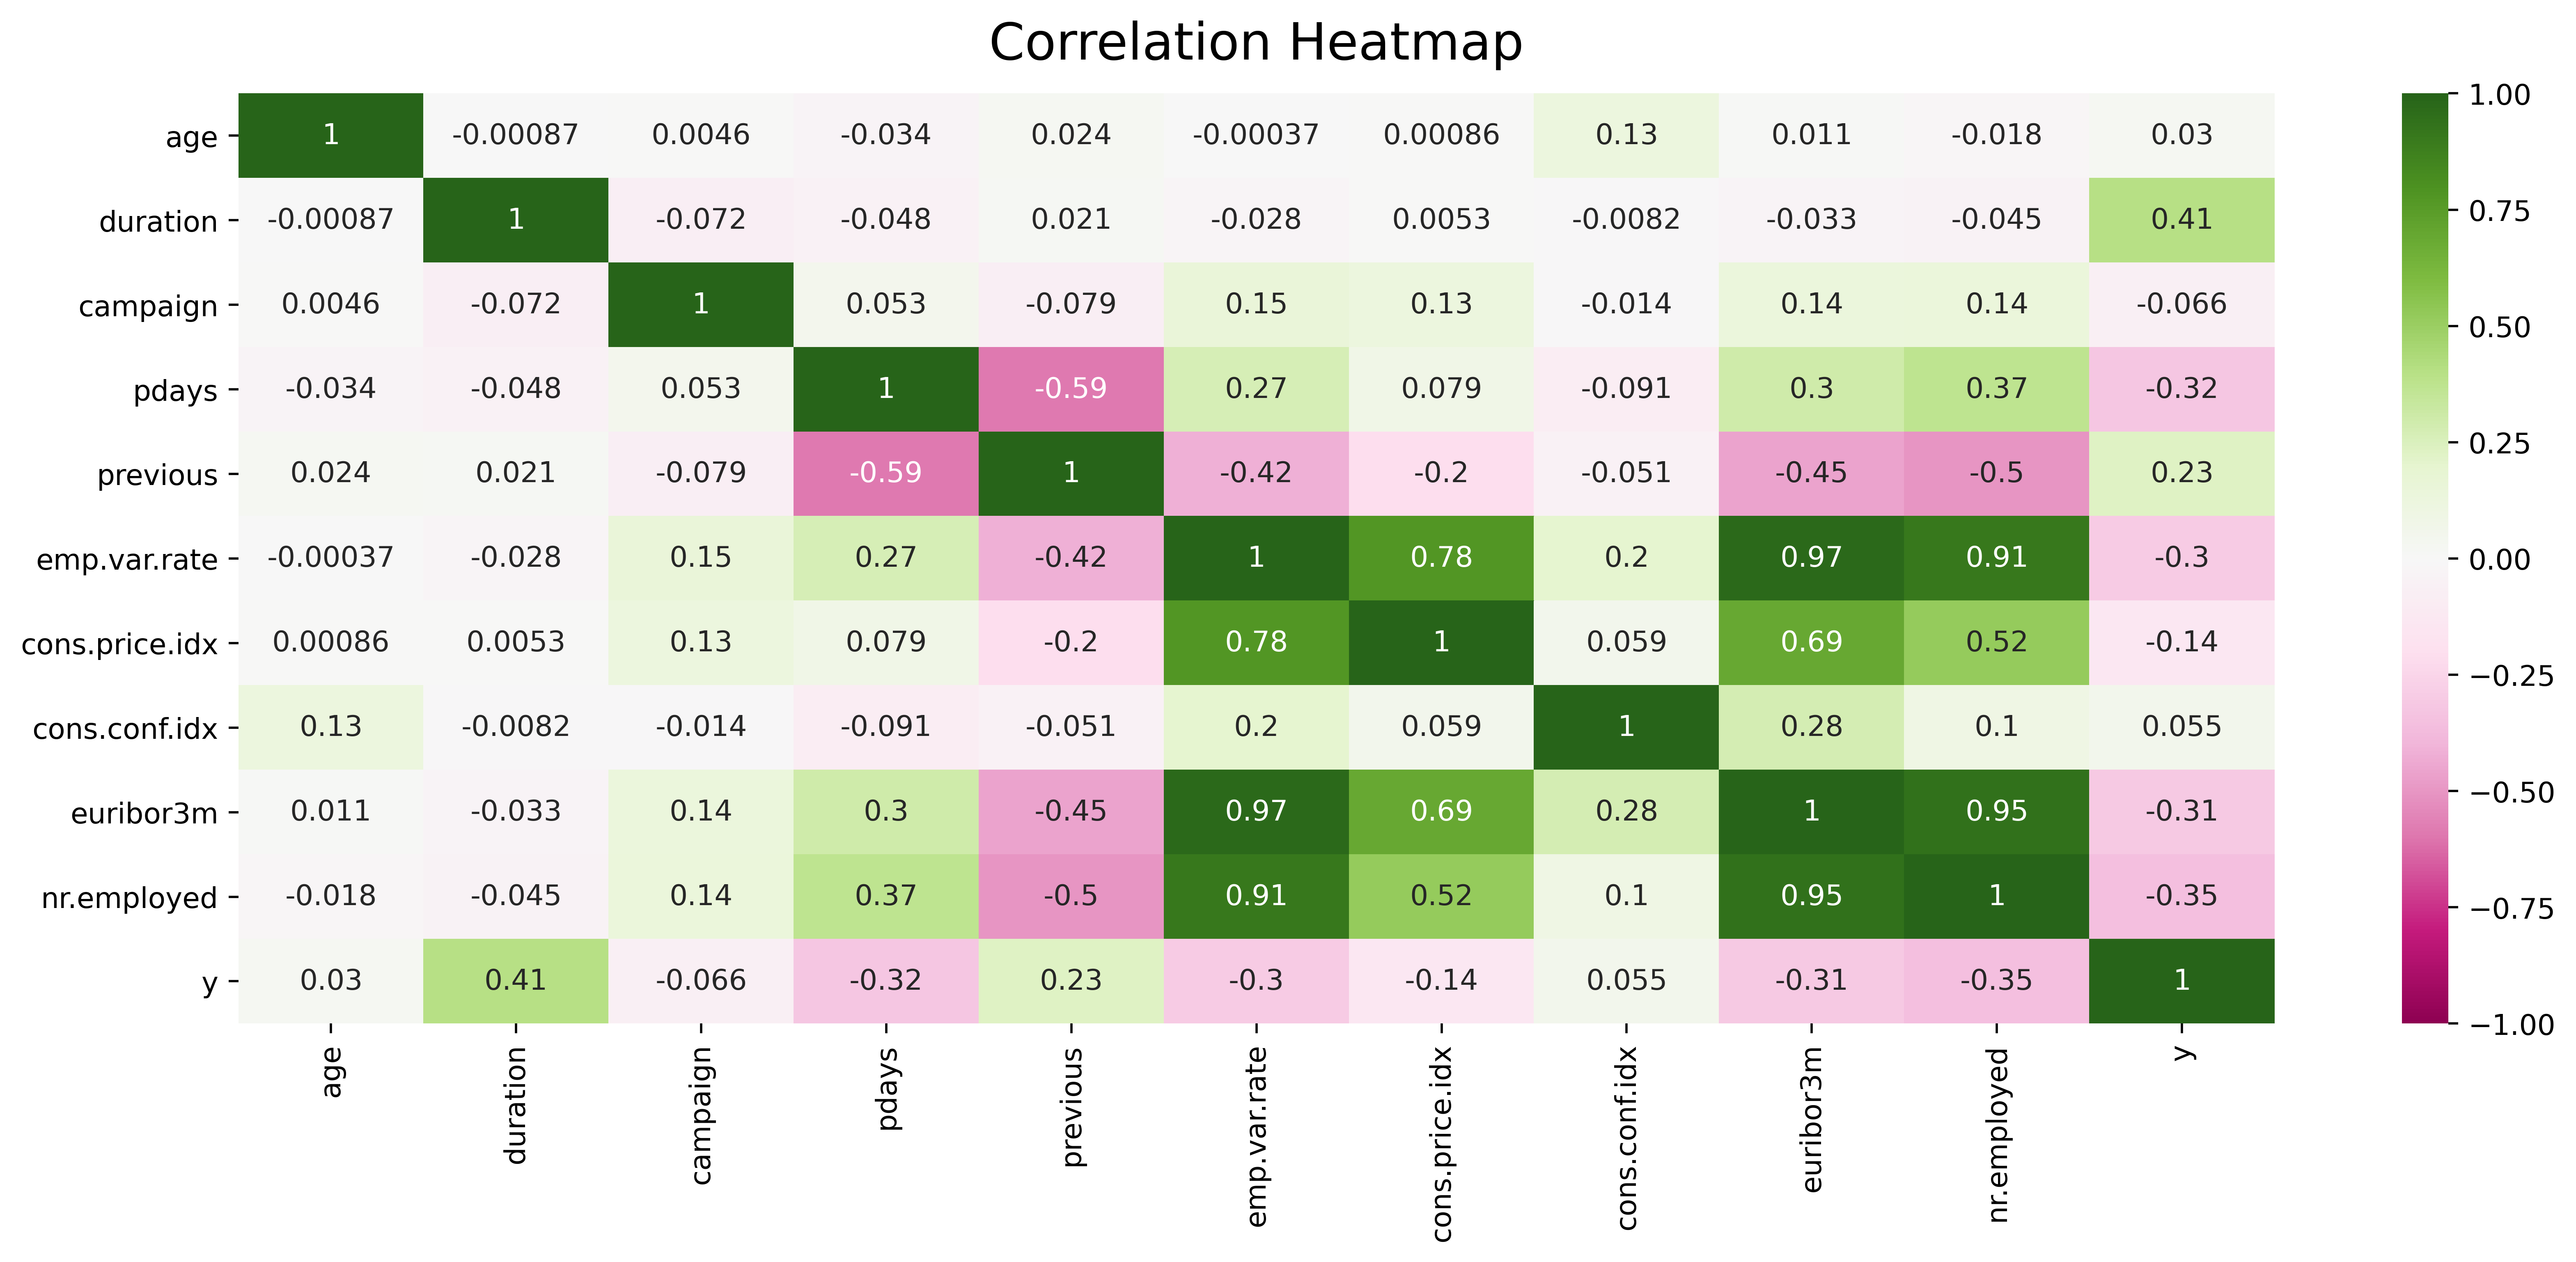

In [19]:
#correlation between variables:
import seaborn as sns
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#for limits of vmin and vmax which tell us the scale
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
#look at library
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

We see strong correlations between external economic variables themselves, aside from consumer confidence index (which is perhaps more perception based)
External economic factors and campaign also have strong correlation, and as expected, the correlation of duration is strong because if it is 0 then y = 0 (as per source)

In [20]:
#visualization for how unstack works
#df.corr().unstack()

In [21]:
#see above 
uncor = df.corr()
uncor2 = uncor.unstack().drop_duplicates().sort_values(ascending= False).head(30)
uncor2

age             age               1.000000
emp.var.rate    euribor3m         0.972245
euribor3m       nr.employed       0.945154
emp.var.rate    nr.employed       0.906970
                cons.price.idx    0.775334
cons.price.idx  euribor3m         0.688230
                nr.employed       0.522034
duration        y                 0.405274
pdays           nr.employed       0.372605
                euribor3m         0.296899
cons.conf.idx   euribor3m         0.277686
pdays           emp.var.rate      0.271004
previous        y                 0.230181
emp.var.rate    cons.conf.idx     0.196041
campaign        emp.var.rate      0.150754
                nr.employed       0.144095
                euribor3m         0.135133
age             cons.conf.idx     0.129372
campaign        cons.price.idx    0.127836
cons.conf.idx   nr.employed       0.100513
pdays           cons.price.idx    0.078889
cons.price.idx  cons.conf.idx     0.058986
cons.conf.idx   y                 0.054878
campaign   

Scrubbing data and value modification


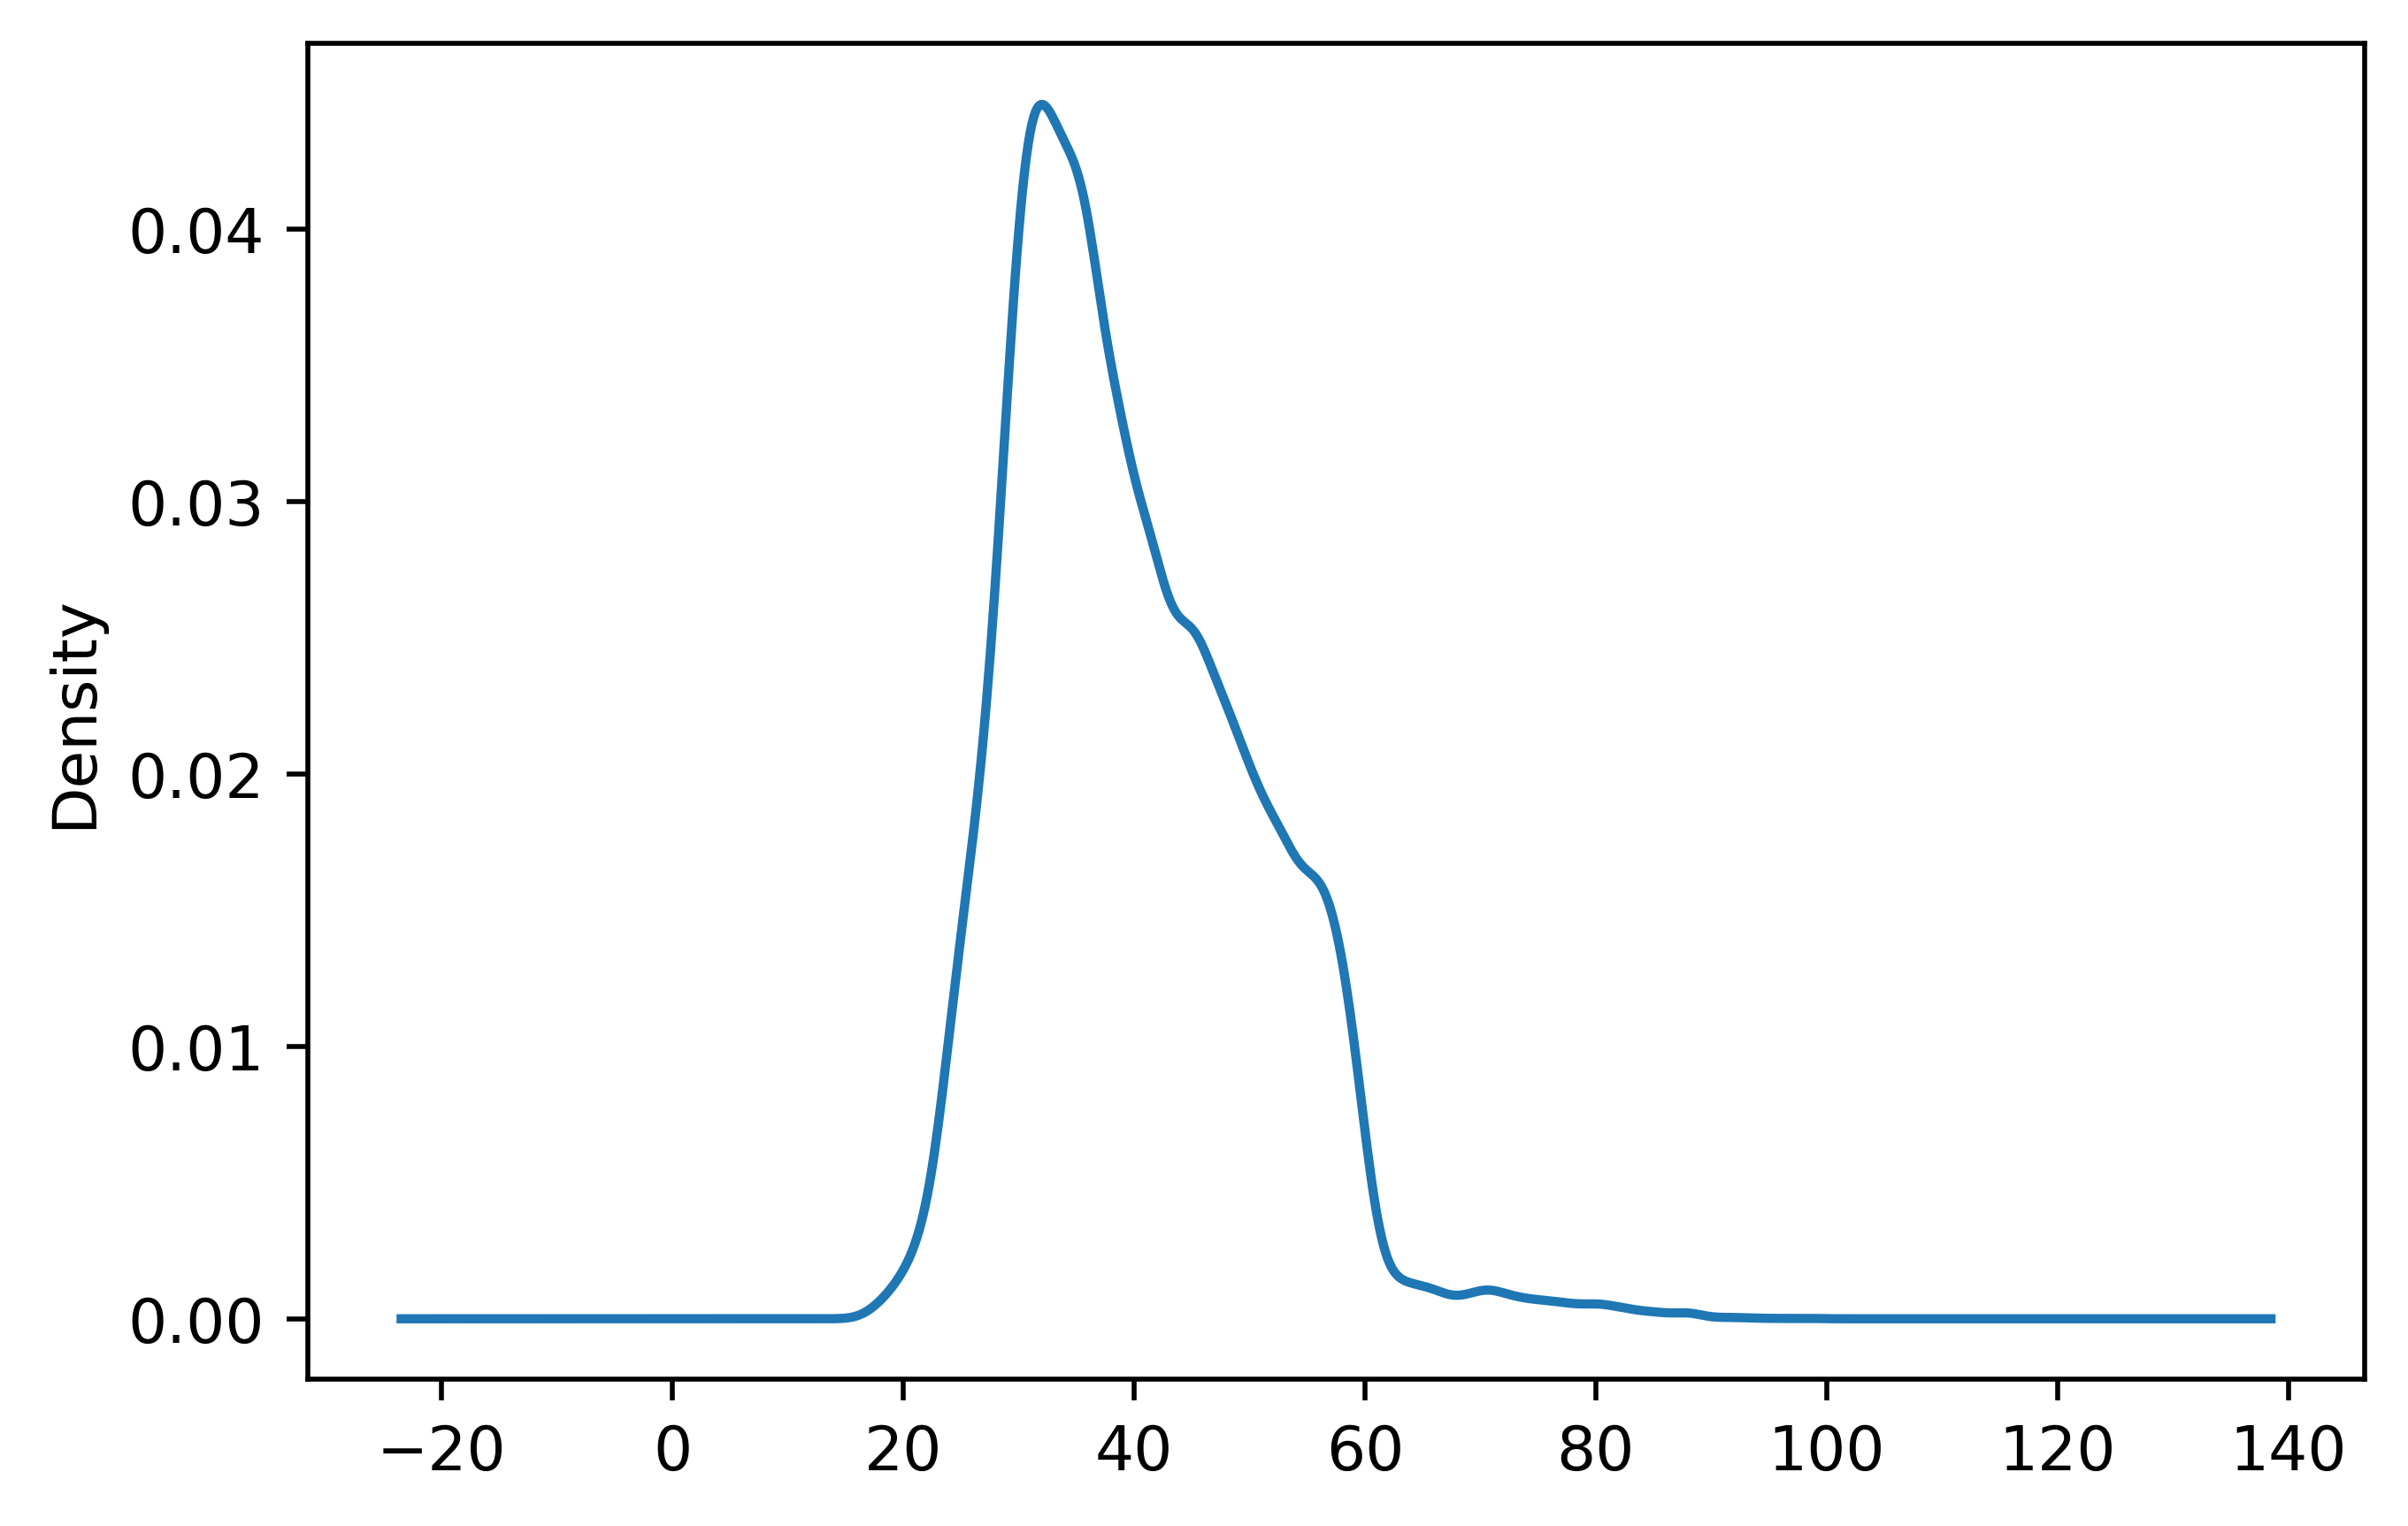

In [22]:
#for age we have seen that it is kind of evenly distributed and the chart is as follows
#this std deviation is fine for some scalars 
#this wont tell us much about the age, but more so that there are more outliers than the std dis
df.age.plot(kind='kde')

In [23]:
#unknown in this case should be left alone because they could be a job listed or an unpopular job
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [24]:
#martial 
#so this is important because of of the we should consider if the income stream is single or duo
df.marital.value_counts()


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [25]:
#divorced is considered widowed or single, finaically it is considered an single income stream  
df['marital'] = np.where(df['marital']  ==  'divorced' , 'single', df['marital'])

In [26]:
#let's leave education 
df.education.value_counts()


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [27]:
#default is equivalent to how much debt they've accumulated and cant pay back. 
#unknown may mean that they are in progress so we shouldn't touch this column
df.default.value_counts()


no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [28]:
#contacts are how the customer was contacted maybe cellular = more money?
df.contact.value_counts()


cellular     26144
telephone    15044
Name: contact, dtype: int64

In [29]:
#housing- so for this unknown we would want to categorize unknown as no 
df.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [30]:
#the code 
df['housing'] = np.where(df['housing']  ==  'unknown' , 'no', df['housing'])

In [31]:
#lets explore values of duration:
df.duration.min()
df[df['duration'] == 0]



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,0,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,0,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
28063,53,blue-collar,single,high.school,no,yes,no,cellular,apr,fri,0,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,0
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,0,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0


So if there are only 4 entries do they really make an impact?
Lets keep this as a part of our preliminary model as a benchmark, as recommended by the source

In [32]:
#looking at campaign we see the # of attempted contacts 
df.campaign.unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

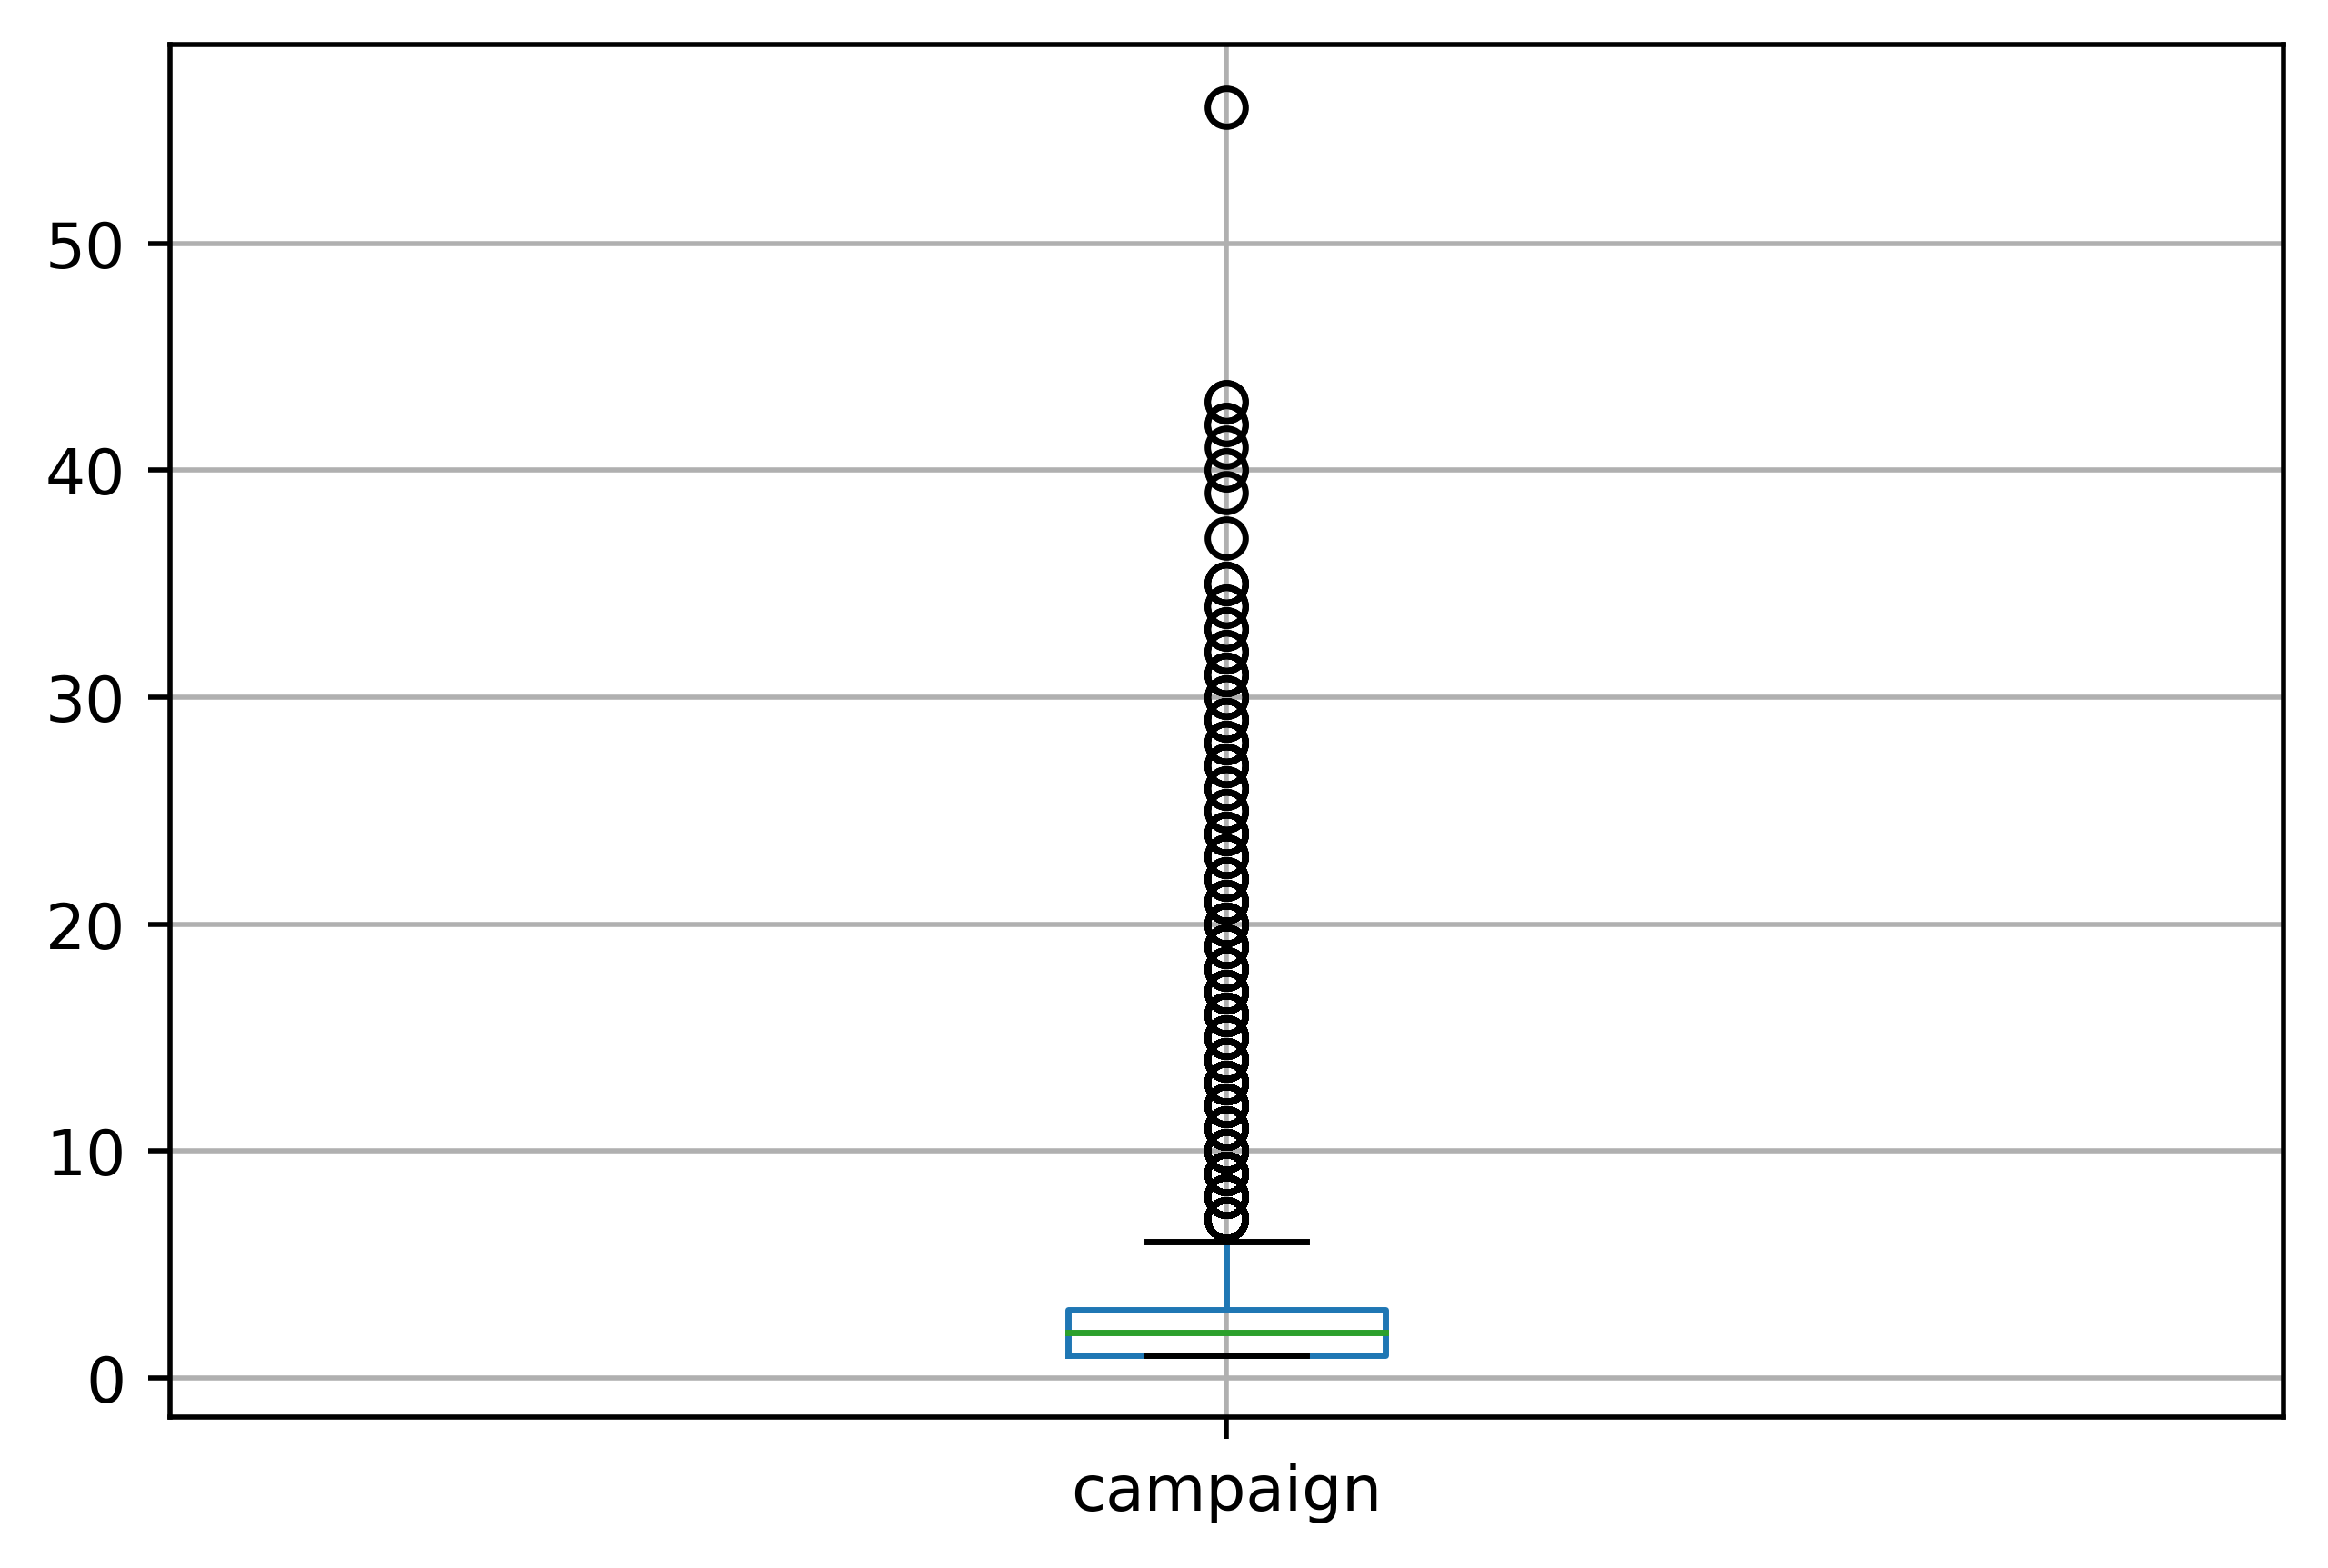

In [33]:
#outliers can be definitely seen 
boxplot = df.boxplot(column=['campaign'])
#so we log it



In [34]:
#log to skewed continuous data 
df['campaign'] = np.log(df['campaign'])

In [35]:
#999 means that they have never been contacted 
#if there is an number than: number of days that passed 
#after the client was last contacted from a previous campaign
#there is not enough information so we're going to make this column Reached?
df.pdays.describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [36]:
#set a cut for this 
conditions = [
    (df['pdays'] == 999),
    (df['pdays'] != 999)
    ]
#==999 = no contact. != 999 = contact
values =['no', 'yes']
#combine values and switch conditions for values
df['pdays'] = np.select(conditions, values)


In [37]:
#make it into new column and drop pdays
df['Reachedout']= df['pdays']
df= df.drop(columns='pdays')

In [38]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [39]:
# this is for the outcome of the previous campaign (did the customer subscribe)
##remember that nonexistent=failure in the poutcome so lets change that

df['poutcome'] = np.where(df['poutcome'] == 'nonexistent', 'failure', df['poutcome'])

In [40]:
df['poutcome'].value_counts()

failure    39815
success     1373
Name: poutcome, dtype: int64

In [41]:
#month there is no jan, so making this a time series problem wont work, we need to keep it though.
# its also the last contact they made (how long ago it was)
#we are not sure when the start date is
df.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [42]:
#day of the week 
df.day_of_week.value_counts()


thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [43]:
#number of contacts performed before this campaign and for this client
#what type of contact are they referring to and is it about the campaign?
df.previous.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [44]:
#save this dataframe as the benchmark 
df.to_csv('benchmark.csv')


In [45]:
#this should be a continuous variable to be scaled 
display(df['emp.var.rate'].value_counts())
print(df['emp.var.rate'].max())
print(df['emp.var.rate'].min())


 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

1.4
-3.4


In [46]:
#we know that we need to scale this because its between two intervals
display(df['cons.price.idx'].value_counts)
print(df['cons.price.idx'].max())
print(df['cons.price.idx'].min())

<bound method IndexOpsMixin.value_counts of 0        93.994
1        93.994
2        93.994
3        93.994
4        93.994
          ...  
41183    94.767
41184    94.767
41185    94.767
41186    94.767
41187    94.767
Name: cons.price.idx, Length: 41188, dtype: float64>

94.767
92.201


In [47]:
#it doesnt seem like they were very confident, scale it 
display(df['cons.conf.idx'].value_counts())
print(df['cons.conf.idx'].max())
print(df['cons.conf.idx'].min())

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

-26.9
-50.8


In [48]:
#Euribor
#scale this 
display(df['euribor3m'].value_counts())
print(df['euribor3m'].max())
print(df['euribor3m'].min())

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.853       1
3.901       1
0.969       1
0.956       1
3.669       1
Name: euribor3m, Length: 316, dtype: int64

5.045
0.634


In [49]:
#scale 
df['nr.employed']

0        5191.0
1        5191.0
2        5191.0
3        5191.0
4        5191.0
          ...  
41183    4963.6
41184    4963.6
41185    4963.6
41186    4963.6
41187    4963.6
Name: nr.employed, Length: 41188, dtype: float64

# Initial Approach via Linear Regression
___________________


## First Model: Linear Regression with benchmark variable included

In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # to split
from sklearn.tree import DecisionTreeClassifier #our classifier 
from sklearn.metrics import accuracy_score, roc_curve, auc #metric 
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn import tree

In [51]:
#always save modified csv to avoid rerunning code 
df_bench=pd.read_csv('benchmark.csv', index_col=0)

In [52]:
#we need the names
cat_cols2 = df_bench.select_dtypes(include=object).columns.tolist()
cat_cols2

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'Reachedout']

In [53]:
#Creating a normal linear regression model
#normally we would OHE but this would lead to data leakage and multicollinearity between the variables.
#the model for the primary ML must not 
# have x_test be fitted twice due to array issues and computing the average of the average of the varaiance
from sklearn.linear_model import LinearRegression
X=None
y= None 
#dummy everything prior to processing, it give the variables an equivalent weight when they shouldnt
dummies=pd.get_dummies(df_bench[cat_cols2], prefix=cat_cols2, drop_first=True)
preprocessed_data1 = pd.concat([df_bench.drop(columns=cat_cols2), dummies], axis=1)

from sklearn.model_selection import train_test_split #we're trying to predict the outcome with a line


X= preprocessed_data1.drop(columns= 'y')
y= preprocessed_data1.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

reg = LinearRegression().fit(X, y)


reg.score(X, y)#prints.3577
#to double check with another linmodel from sk 

from sklearn.linear_model import RidgeCV

model = RidgeCV()

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')



model score on training data: 0.35340086499151113
model score on testing data: 0.36523660108265465


The reason why this model failed to help us predict a binary output is because there is no room for measuring the threshold to round either up or down (creating our false positive and negatives). Next, an accuracy of .35 is pretty bad, but again we need to address the the fact that 50% is the smallest threshold.

Why 50%?

The reason why is because the target is binary, and the minimum should be 50% probability, which is a coin flip. You can certainly combine it with another model but to have it be a stand alone is foolish.


# Selecting Decision Trees as our primary model benchmark

Decision trees split nodes at which the probability of the sample landing in a binary class (0s and ones) overwhelms the minority. It is a series of true/false statements and it is applicable for this survey in order to predict if, addressing clients of the different domains (demographics, eco, etc:  as mentioned previous)is possible. This can be expanded to include kclustering algos into a functional pipline but would require extensive tuning. 

Overall, a decision tree is optimal in this situation because it tells us the address the buisness problem: What can we improve on in our campaign in order to make this more successful or do we abandon the idea of telecommunication?



Why Decision trees work 

Pros

Decision trees are supervised (which makes it an ideal fit for our dataframe with a binary output.
    - this was why we transformed our output variable

It can also handle cateogrical and continuous variables, but the outputs are hard to read, we will fix that issue later.
    - this can get complicated

It is simple to understand and can be visualized
    - the R^2 does not explain almost 70%+ of the variance 

Programs such as streamlit can be used to predict future outcomes on a user-friendly interface 
    - by putting in the column names we can make this

There are no missing values in our dataframe
    -missing values in the df means that our decision tree will perform poorly

Cons and how to overcome them

Decision trees can be extremely complex and overfit, thus pruning and hyperparameter tunning is necessary.

    -Optuna is a library for optimizing hypertuning (explained later) 

A single decision tree is rarely useful in real world applications like this one for anomaly detection
    - Use an RF 

Since this is a anomly detection model, decision trees may need to require duplicating the minority class to increase sample size. 
    -Other data sets are available from the website to validate


## Baseline model: Vanilla DecisionTree with benchmark
____________________


-The point in keeping the benchmark is so that we have some metric goal after dropping the benchmark. If we can do this without duplicating the set, it should theoretically perform better on similar data sets. Or cexperience poor cross validation, *and* avoid duplicating sets and artificially transforming the df.


-In this model we would explore a method in retaining X_train and X_test columns using two different scalers (categorical and continuous). This prevents dataleakage exhibited in the linear regression model because if you OHE everything (X):

    -  you would destroy the original dataframe and its original usage

    - you need to have all categoricals, which can be done through binning


    - which will artifcally transfrom the df and make the model perform worse. 

-Even if you use this method described for the linear regression model, the results are practically uninterpretable.



In [54]:
#create the list necessary for model prep by dividing the columns
objcolslist = [ 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week',  
       'poutcome',  'Reachedout']
not_object = ['age','duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']


In [55]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder#this is because the transform gives an arrary, more on that later
from sklearn.model_selection import train_test_split, GridSearchCV#Grid search in my opinion is too slow 


In [56]:
#take the benchmark'd df from linear regression and find the lowest values 
preprocessed_data1.corr().unstack().sort_values().drop_duplicates()
#this shows too much multicollinearity thus pandas_dummies cannot be used 
#there is a .95 correlation between the 1's in poutcome_success and reachedout_yes


previous               nr.employed                   -0.501333
euribor3m              previous                      -0.454494
previous               emp.var.rate                  -0.420489
Reachedout_yes         nr.employed                   -0.372682
education_high.school  education_university.degree   -0.354912
                                                        ...   
nr.employed            emp.var.rate                   0.906970
euribor3m              nr.employed                    0.945154
poutcome_success       Reachedout_yes                 0.950283
euribor3m              emp.var.rate                   0.972245
age                    age                            1.000000
Length: 1276, dtype: float64

In the preliminary model we see that there was a problem with using pd.get_dummies thus we now use the f1 score as our metric for model performance. Accuracy cannot be used as the model will overfit the data and focus on the columns most closely attributed to y. To circumvent this, F1 is the harmonic mean between recall and precision is used:



- Precision is the ratio between true positives and (true and false positives)
- Recall is the ratio between true positives (False negative )


- Likewise we will also examine the confusion matrix for further insight on the predictive ability of the model


In [57]:
#import and split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import tree
X = df_bench.drop(columns='y')
y = df_bench.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [58]:
#prevent data leakages by:
#creating 2 lists
objcolslist
not_object
#get the classifiers
scalar = StandardScaler()
ohe = OneHotEncoder(sparse=False)
#fit transform parts of the pd with different classifiers (they are the same shape i checked)
X_train_scaled = scalar.fit_transform(X_train[not_object])
X_train_not_object = ohe.fit_transform(X_train[objcolslist])
#cannocate them  into X_train so they remain in the same shape array as the pd.dummies except theres no data leakage due to proper classifiyng 
X_train=np.concatenate([X_train_scaled, X_train_not_object], axis=1)

In [59]:
#we're going to be using this as a baseline, entropy to help determine splits if possible 
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [60]:
#do the same thing to test except dont fit it to avoid leakage 
X_test_scaled = scalar.transform(X_test[not_object])
X_test_not_object = ohe.transform(X_test[objcolslist])
X_test=np.concatenate([X_test_scaled, X_test_not_object], axis=1)

In [61]:
#take the predict 
y_pred=clf.predict(X_test)

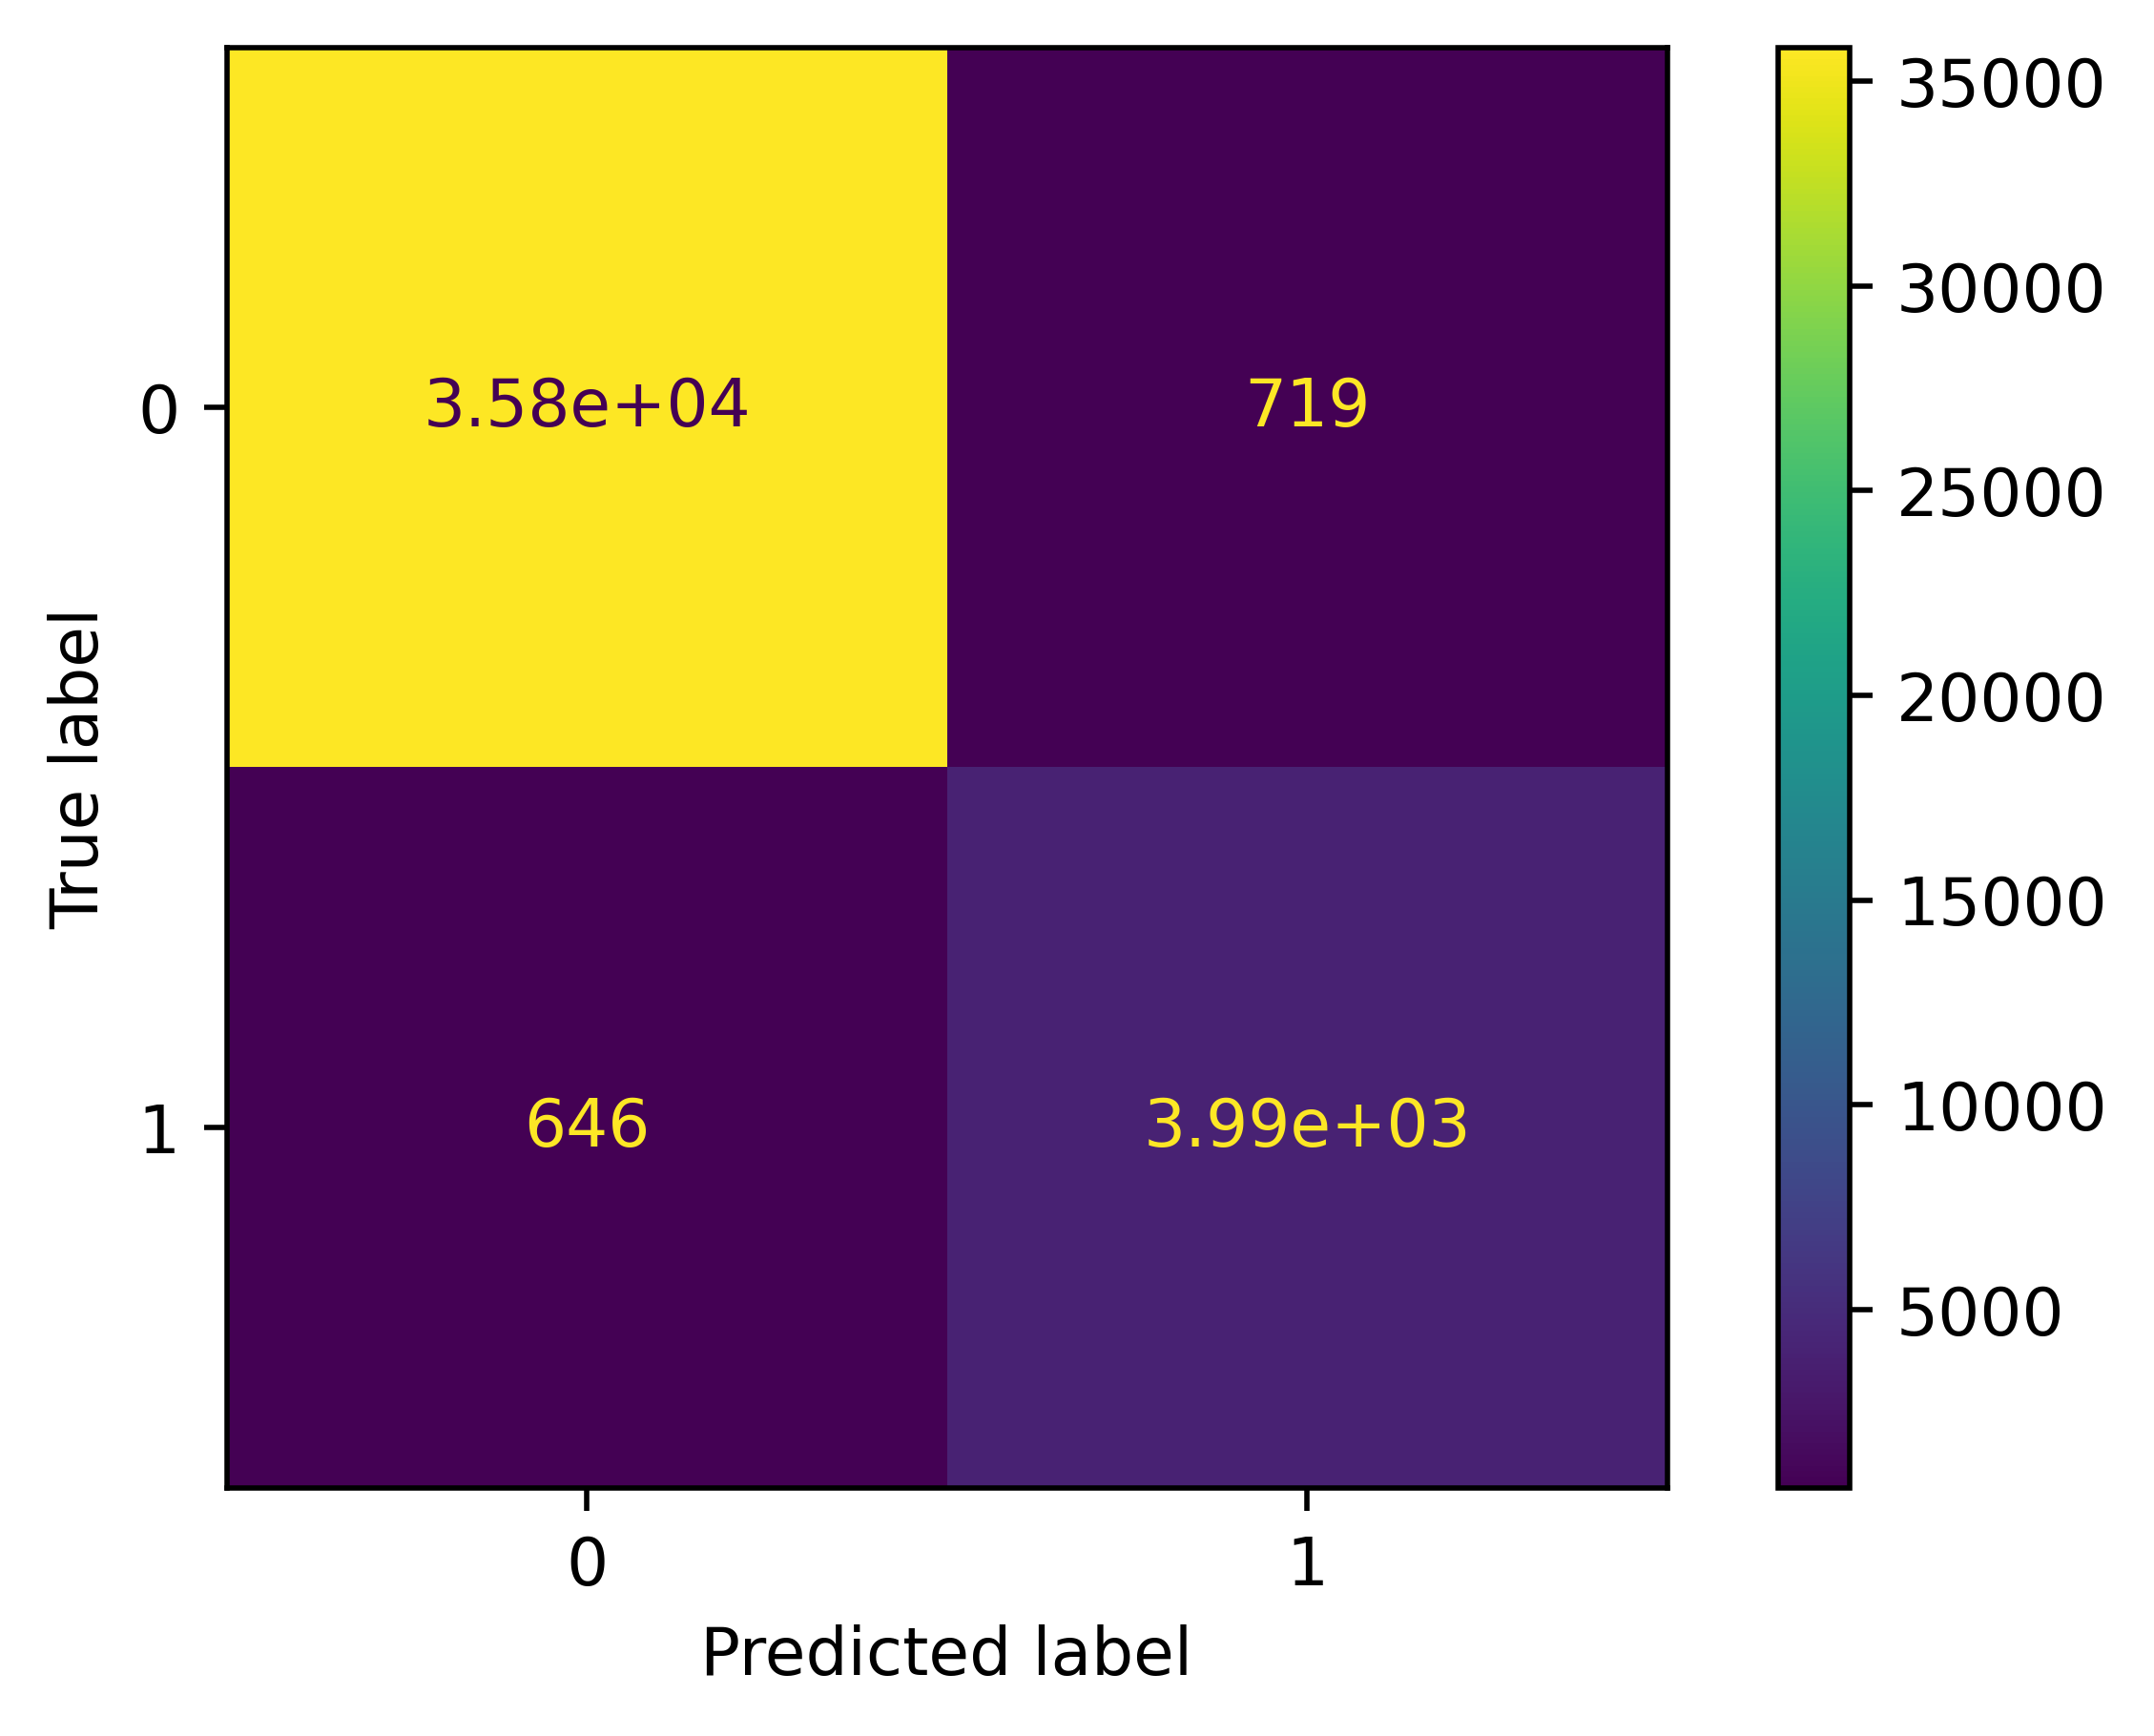

In [62]:
#confusion matrix from flatiron mixed with my 'pipeline'
from sklearn.metrics import plot_confusion_matrix

#recombine similar to the train test split 
X_scaled = scalar.transform(X[not_object])
X_not_object = ohe.transform(X[objcolslist])
#recombine X but with an array of values that do overfit the model with the new 1's and 0's from OHE X from the start 
X = np.concatenate([X_scaled, X_not_object], axis=1)
plot_confusion_matrix(clf, X, y, values_format='.3g')
plt.show()

A True positive is when the predicted and true both equal 1 (4000)

A true negative is when the predicted and true both equal 0 (3580)

A false positive is when the predicted = 1 and the actual = 0 (721)

A false negative is when the predicted = 0 and the acutal = 1 (643)

Impact of FP (Maximize attributes)
This is important because if you predict a subscription to occur and it doesnt- you lose resources by devoting certain attributes over others

Impact of FN (Minimize attributes)
On the other hand, if you predict a subsription to be false and it turns out to be true you struck gold, essentially you would want to maximize this



In [63]:
#model performs  according to the formula:
#F1 = 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import f1_score
#average=micro calculates metrics globally TP. FN, FP 
#documentation https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
print(f1_score(y_test, y_pred, average='micro'))

0.8895362952172857


In [64]:
#adapted from curriculum: The Area Under the Curve (AUC) is the measure of the ability of 
#a classifier to distinguish between FN and FP and is used as a summary of the ROC curve.

#this is in the next few cells, f1 will decrease, but not drastically, ROC is the curve that helps measure the ratios of true positives and negatives
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.7346814333627927

In [65]:
#fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,10), dpi=1000)
#tree.plot_tree(clf,
               #feature_names = X_train.columns, 
               #class_names=np.unique(y).astype('str'),
               #filled = True)
#plt.show()

In [66]:
#fig.savefig("First dt.png")

# THE BENCHMARK FOR DT/RF .73 AUC WITH 88% ACCURACY

# Creating the preliminary model against the benchmark 

In [67]:
#new df, no duration
df=df.drop(columns='duration')

In [68]:
#setting up train test split
X= None
y= None
X = df.drop(columns='y')
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [69]:
#we need to readjust the column names 
objcolslist = [ 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week',  
       'poutcome',  'Reachedout']
not_object = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']


In [70]:
#scale and OHE and fit_transform them based on the columns, recombine back into X train
scalar = StandardScaler()
ohe = OneHotEncoder(sparse=False)
X_train_scaled = scalar.fit_transform(X_train[not_object])
X_train_not_object = ohe.fit_transform(X_train[objcolslist])

X_train=np.concatenate([X_train_scaled, X_train_not_object], axis=1)

In [71]:
#fit the classifier with entropy again 
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [72]:
#transform but do not fit to avoid leakage, combine back into x test
X_test_scaled = scalar.transform(X_test[not_object])
X_test_not_object = ohe.transform(X_test[objcolslist])
X_test=np.concatenate([X_test_scaled, X_test_not_object], axis=1)

In [73]:
#if you dont concatenate then you cant get this running
y_pred=clf.predict(X_test)

In [74]:
#ROC 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))
print('----------------')
#
X_scaled = scalar.transform(X[not_object])
X_not_object = ohe.transform(X[objcolslist])
X = np.concatenate([X_scaled, X_not_object], axis=1)

#with clf it simple to see the features, you can always substitute in the feature# with the cols list for further analysis
#however we saw a significant drop in AUC, lets bring it up. F1 doesnt change much 
from sklearn.metrics import f1_score
text_representation = tree.export_text(clf)
print(text_representation)
print(f1_score(y_test, y_pred, average='micro'))


AUC is :0.63
----------------
|--- feature_7 <= -1.09
|   |--- feature_59 <= 0.50
|   |   |--- feature_39 <= 0.50
|   |   |   |--- feature_41 <= 0.50
|   |   |   |   |--- feature_5 <= 0.94
|   |   |   |   |   |--- feature_0 <= 0.53
|   |   |   |   |   |   |--- feature_48 <= 0.50
|   |   |   |   |   |   |   |--- feature_1 <= 0.35
|   |   |   |   |   |   |   |   |--- feature_31 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_31 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_6 <= -1.58
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= -1.59
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  -1.59
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_6 >  -1.58
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  0.35
|   |   |   |   | 

0.8448652585579024


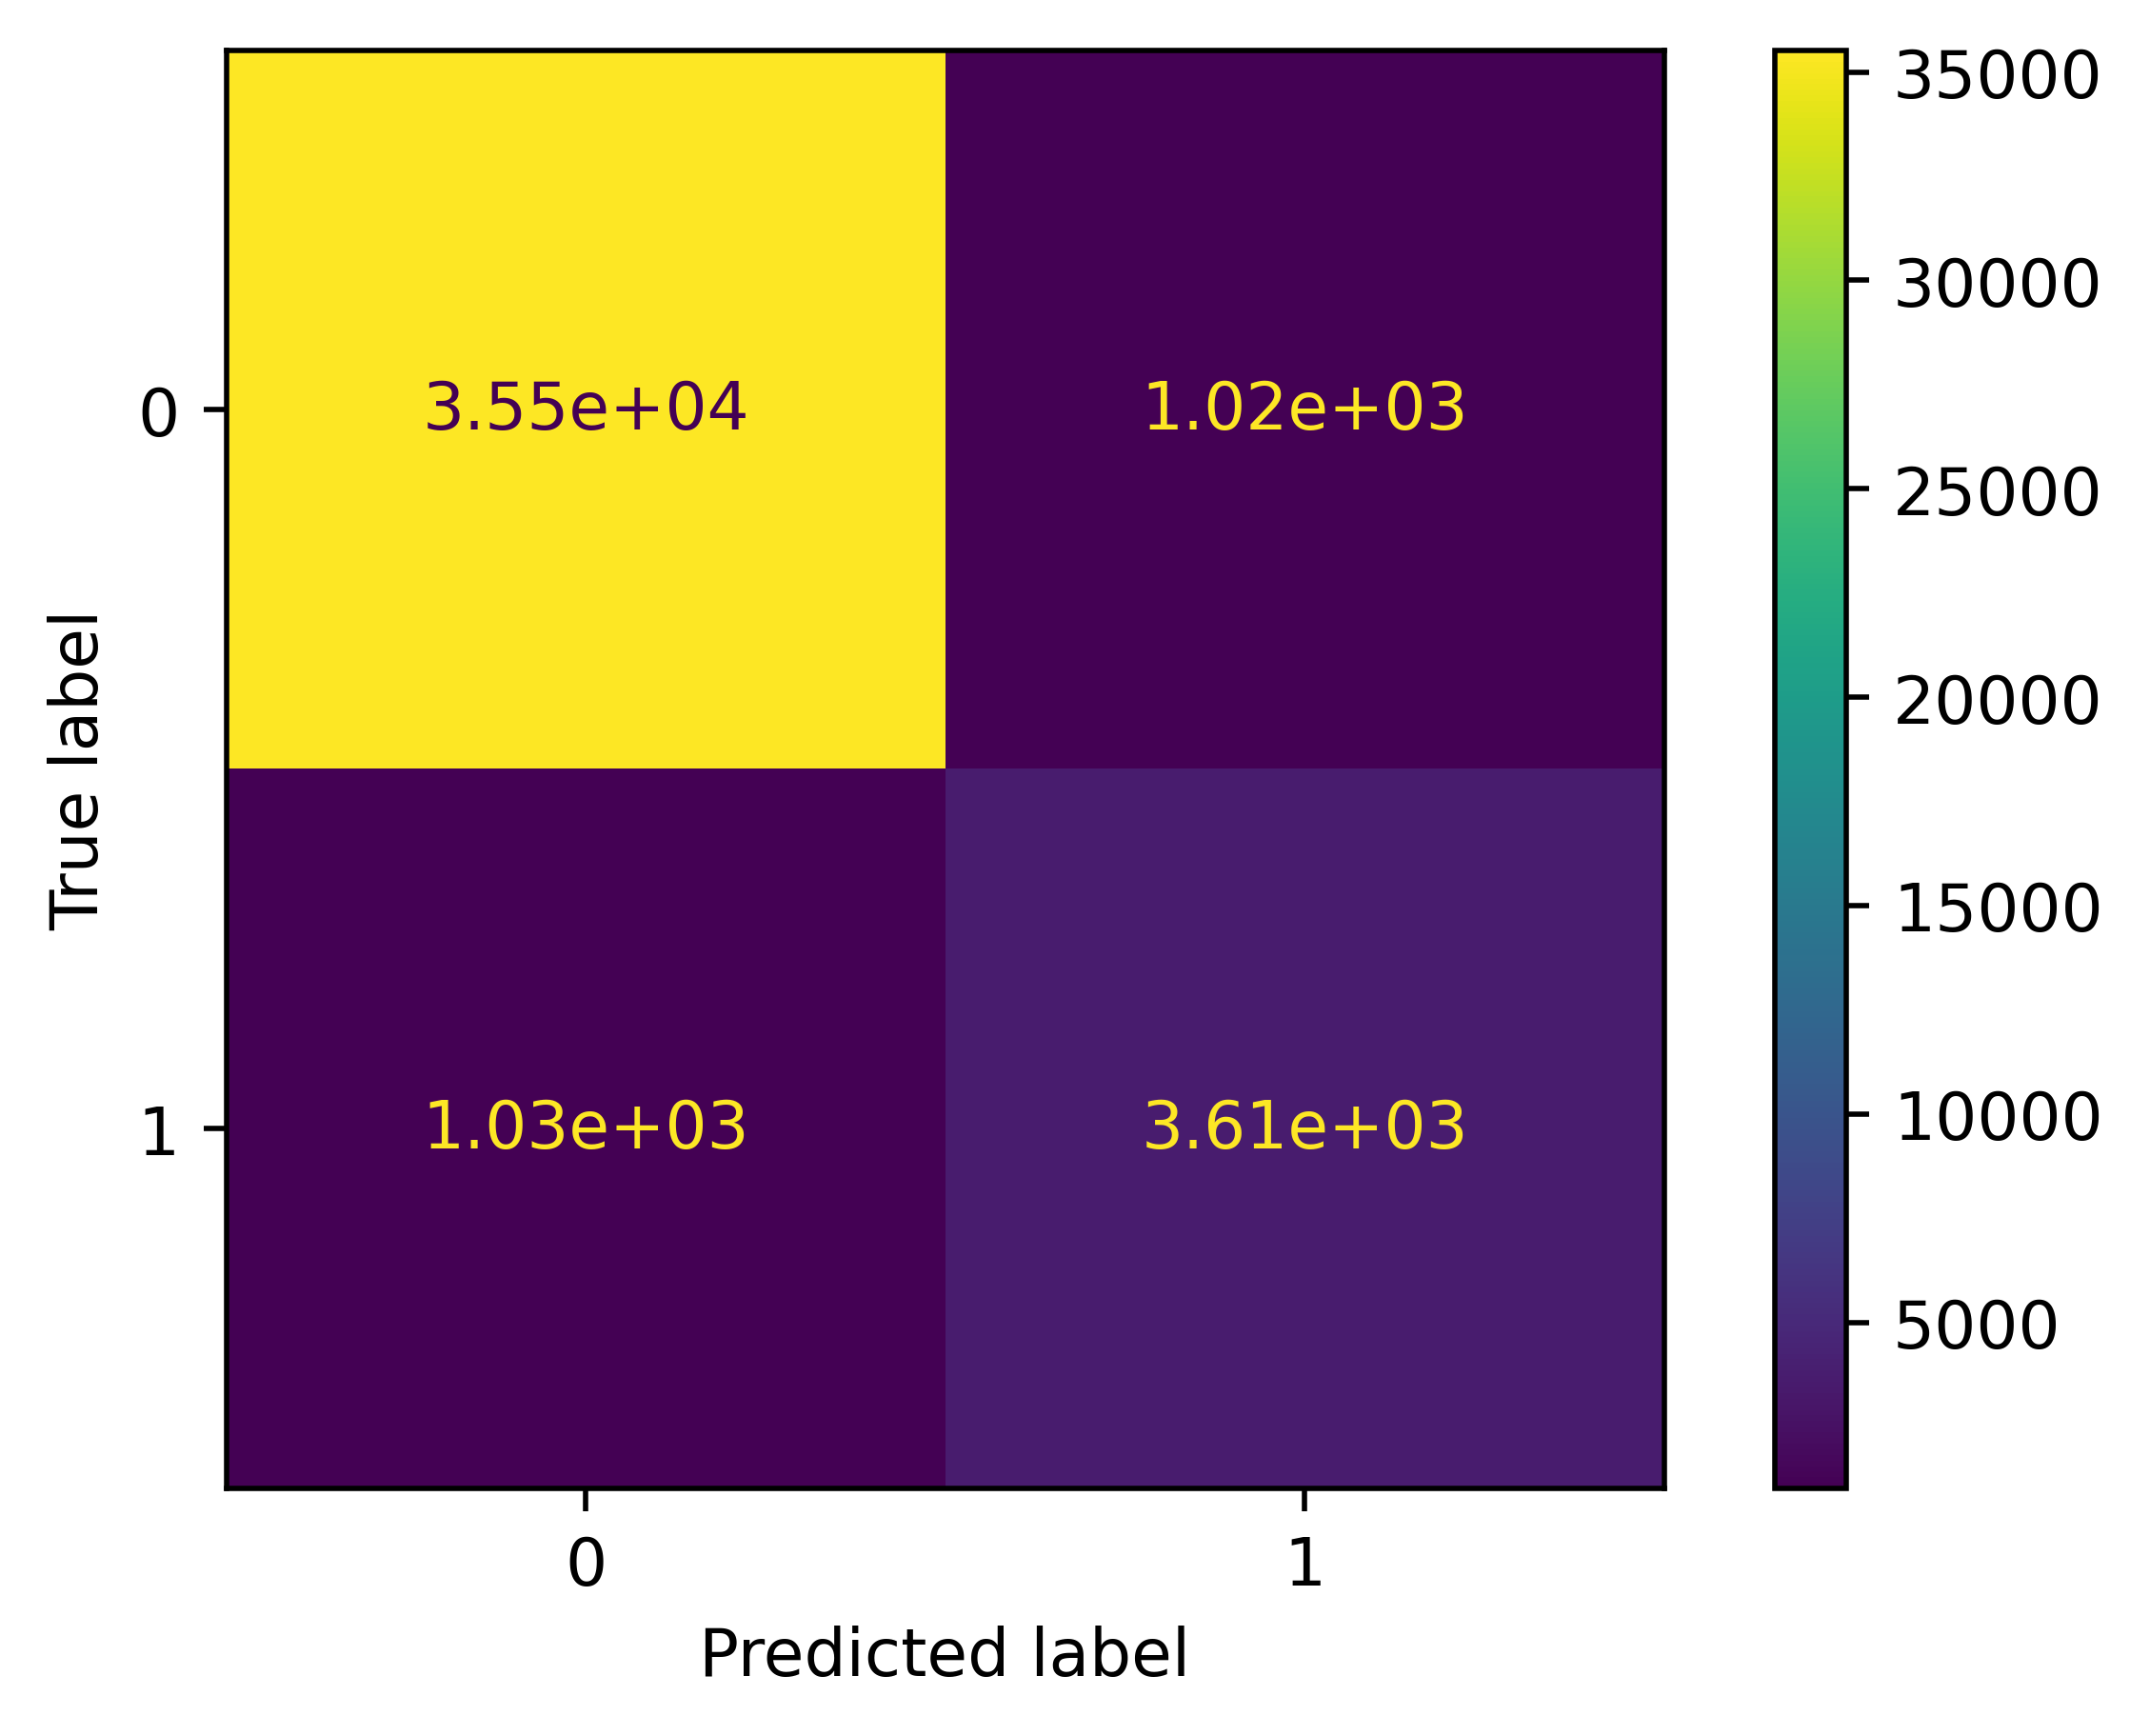

In [75]:
plot_confusion_matrix(clf, X, y, values_format='.3g')
plt.show()

These values are now more indicative of model interpretation because we can see how much money was made by accident and how much was lost to error.

## Hyper tuning the DT model 

In [76]:
#cross validation is a resampling procedure (helpful in our case
# k folds is how many splits the whole sample will incur
# this gets compared to the f1 score  
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'
results = model_selection.cross_val_score(clf, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.2f" % (results.mean()))

10-fold cross validation average accuracy: 0.84


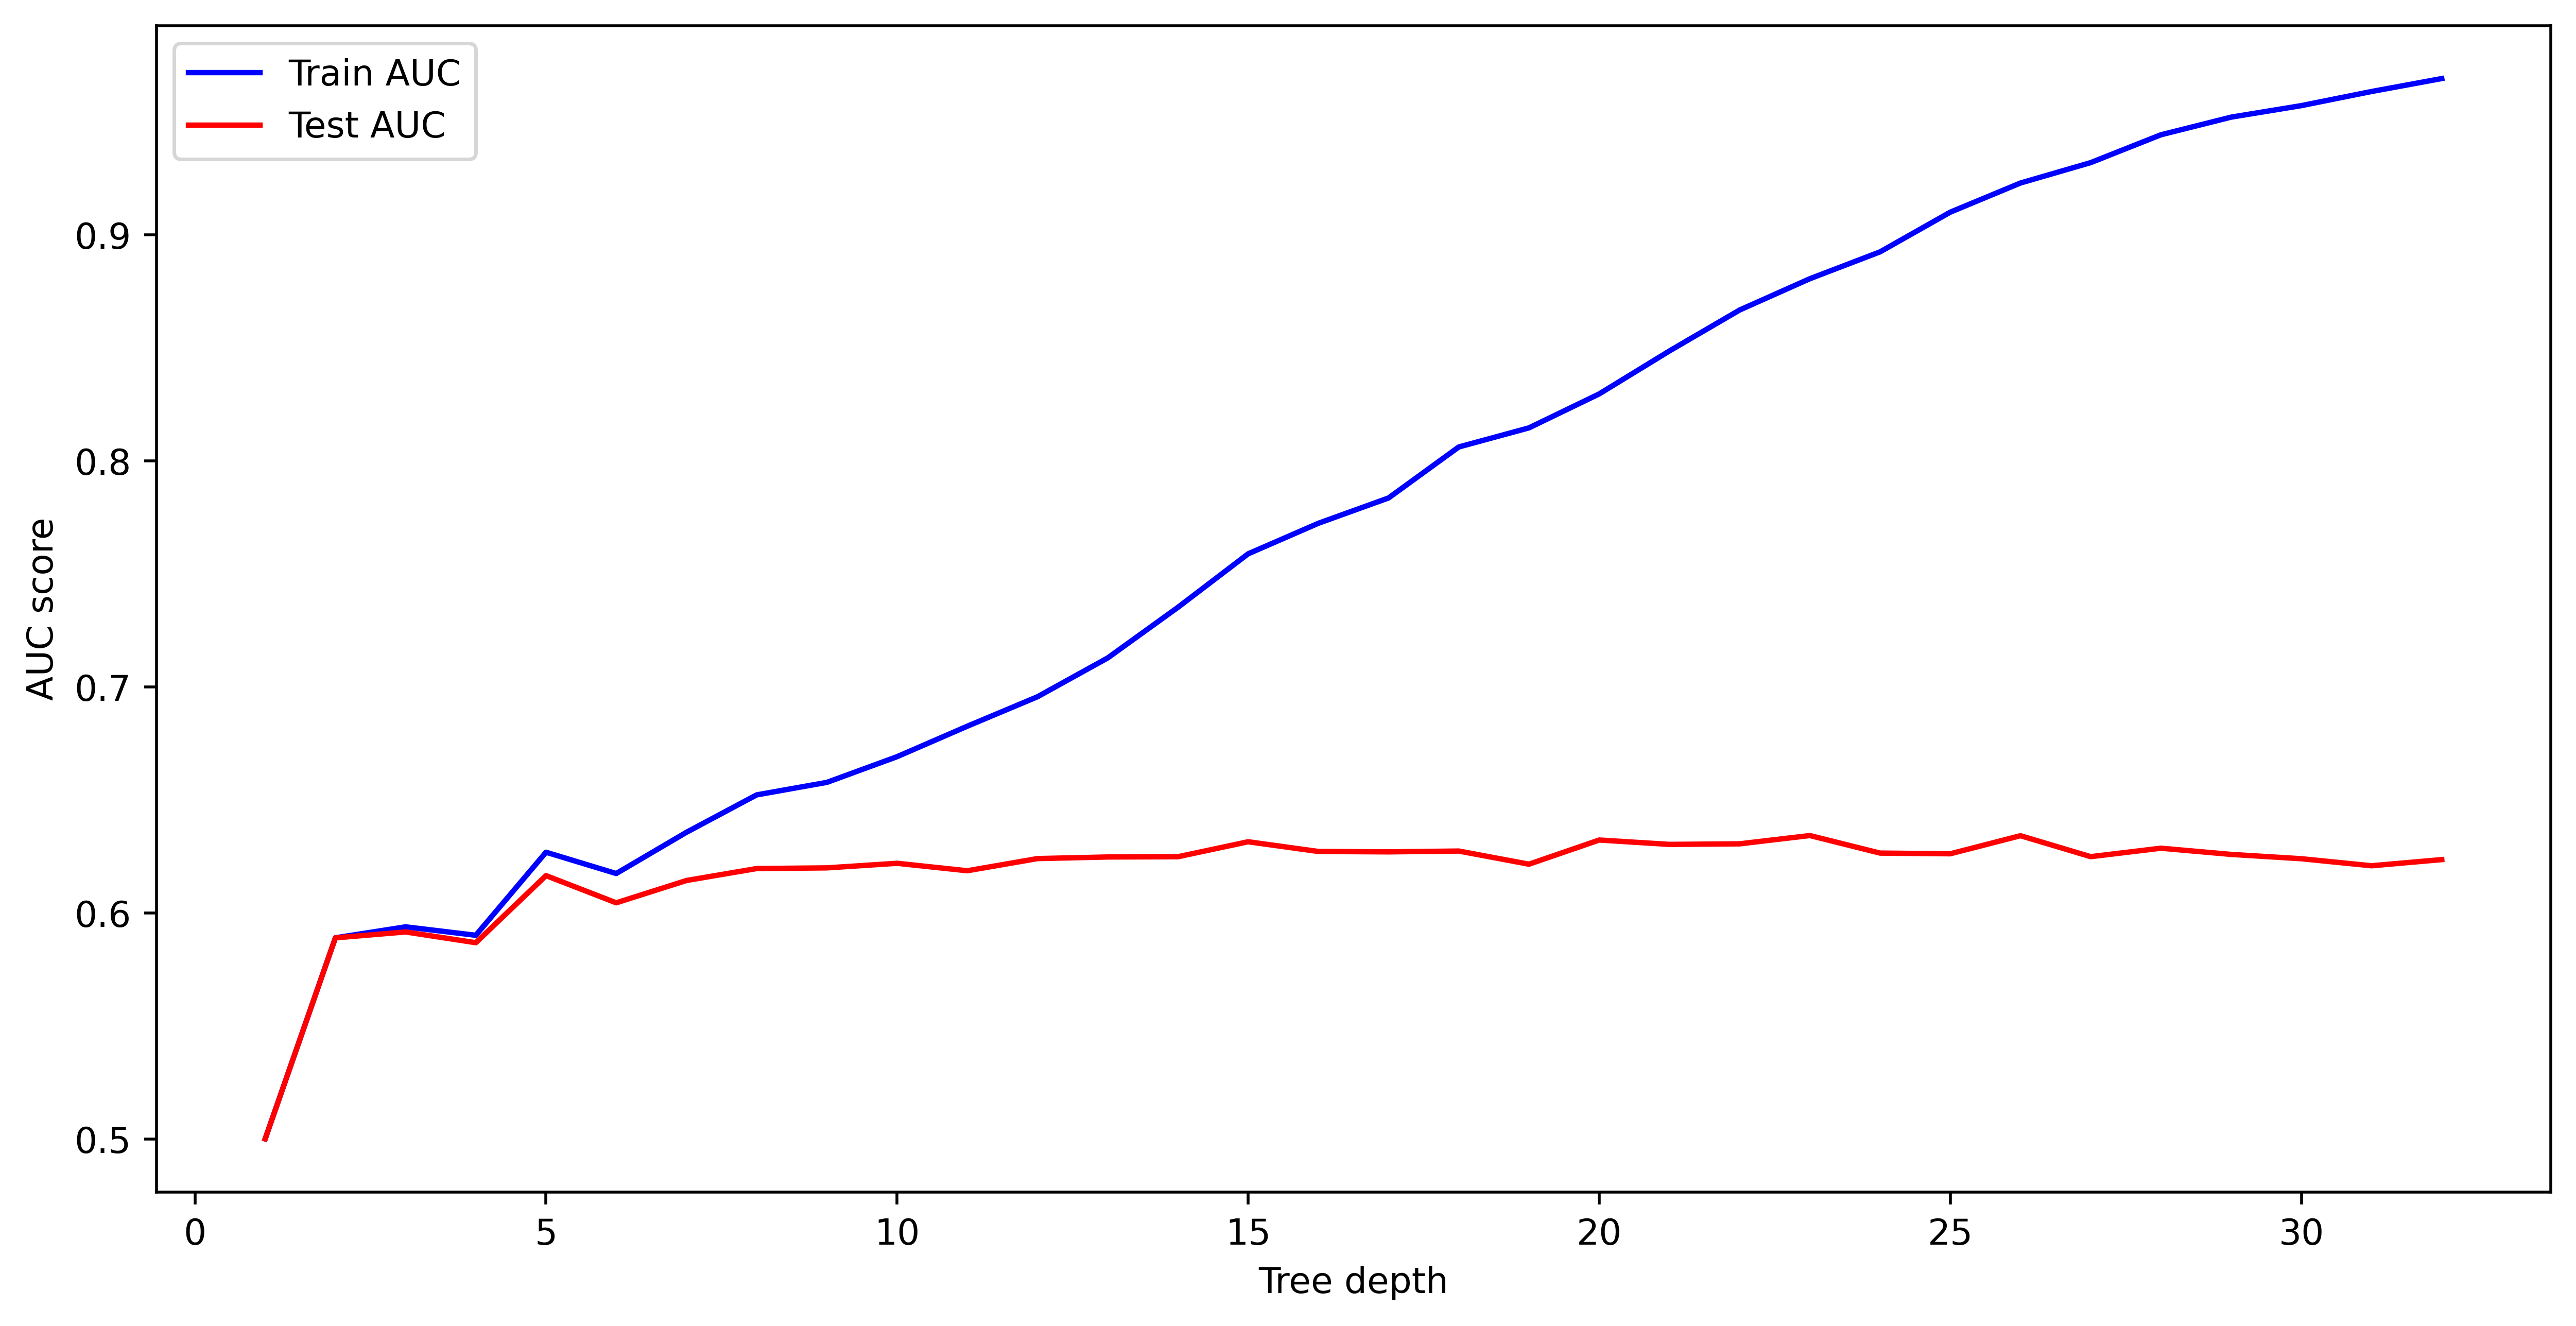

In [77]:
#lets find the best results through visualization from flatiron
#modifications are made 
max_depths = list(range(1, 33))

#create a fx 
train_results = []
test_results = []
#find the max_depths by:
for max_depth in max_depths:
    #create the classifier with max detph as the variable lets call it 
    
 #copied from prelim model to set up for these visualizations 
  
    #set dt but max deph = figure out max deph 
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    #TTS
    X= None
    y= None
    X = df.drop(columns='y')
    y = df.y

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)
    #scale and transform appropraite columns
    scalar = StandardScaler()
    ohe = OneHotEncoder(sparse=False)
    X_train_scaled = scalar.fit_transform(X_train[not_object])
    X_train_not_object = ohe.fit_transform(X_train[objcolslist])
    #recombine
    X_train=np.concatenate([X_train_scaled, X_train_not_object], axis=1)



    #fit as normal 
    dt.fit(X_train, y_train)


    X_test_scaled = scalar.transform(X_test[not_object])
    X_test_not_object = ohe.transform(X_test[objcolslist])
    X_test=np.concatenate([X_test_scaled, X_test_not_object], axis=1)
    
    train_pred = dt.predict(X_train)
    #use the roc() to get the fp, tp, thresholds and roc_auc score 
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # append auc score to list of train results from fpr and tpr  
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

#independently plot Train and test auc and look at the depth at which they performed across 1-33 tree depths 
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

When looking at this graph I think of predicitve power.

Ideal tree depth seems to be around 5 but we are not sure about the sacrifice in increase tree depth. Test auc remains the same while train auc increases.


Additionally, the roc curve should be above .5 ideally because otherwise youre flipping a coin. the higher the test auc score the better.

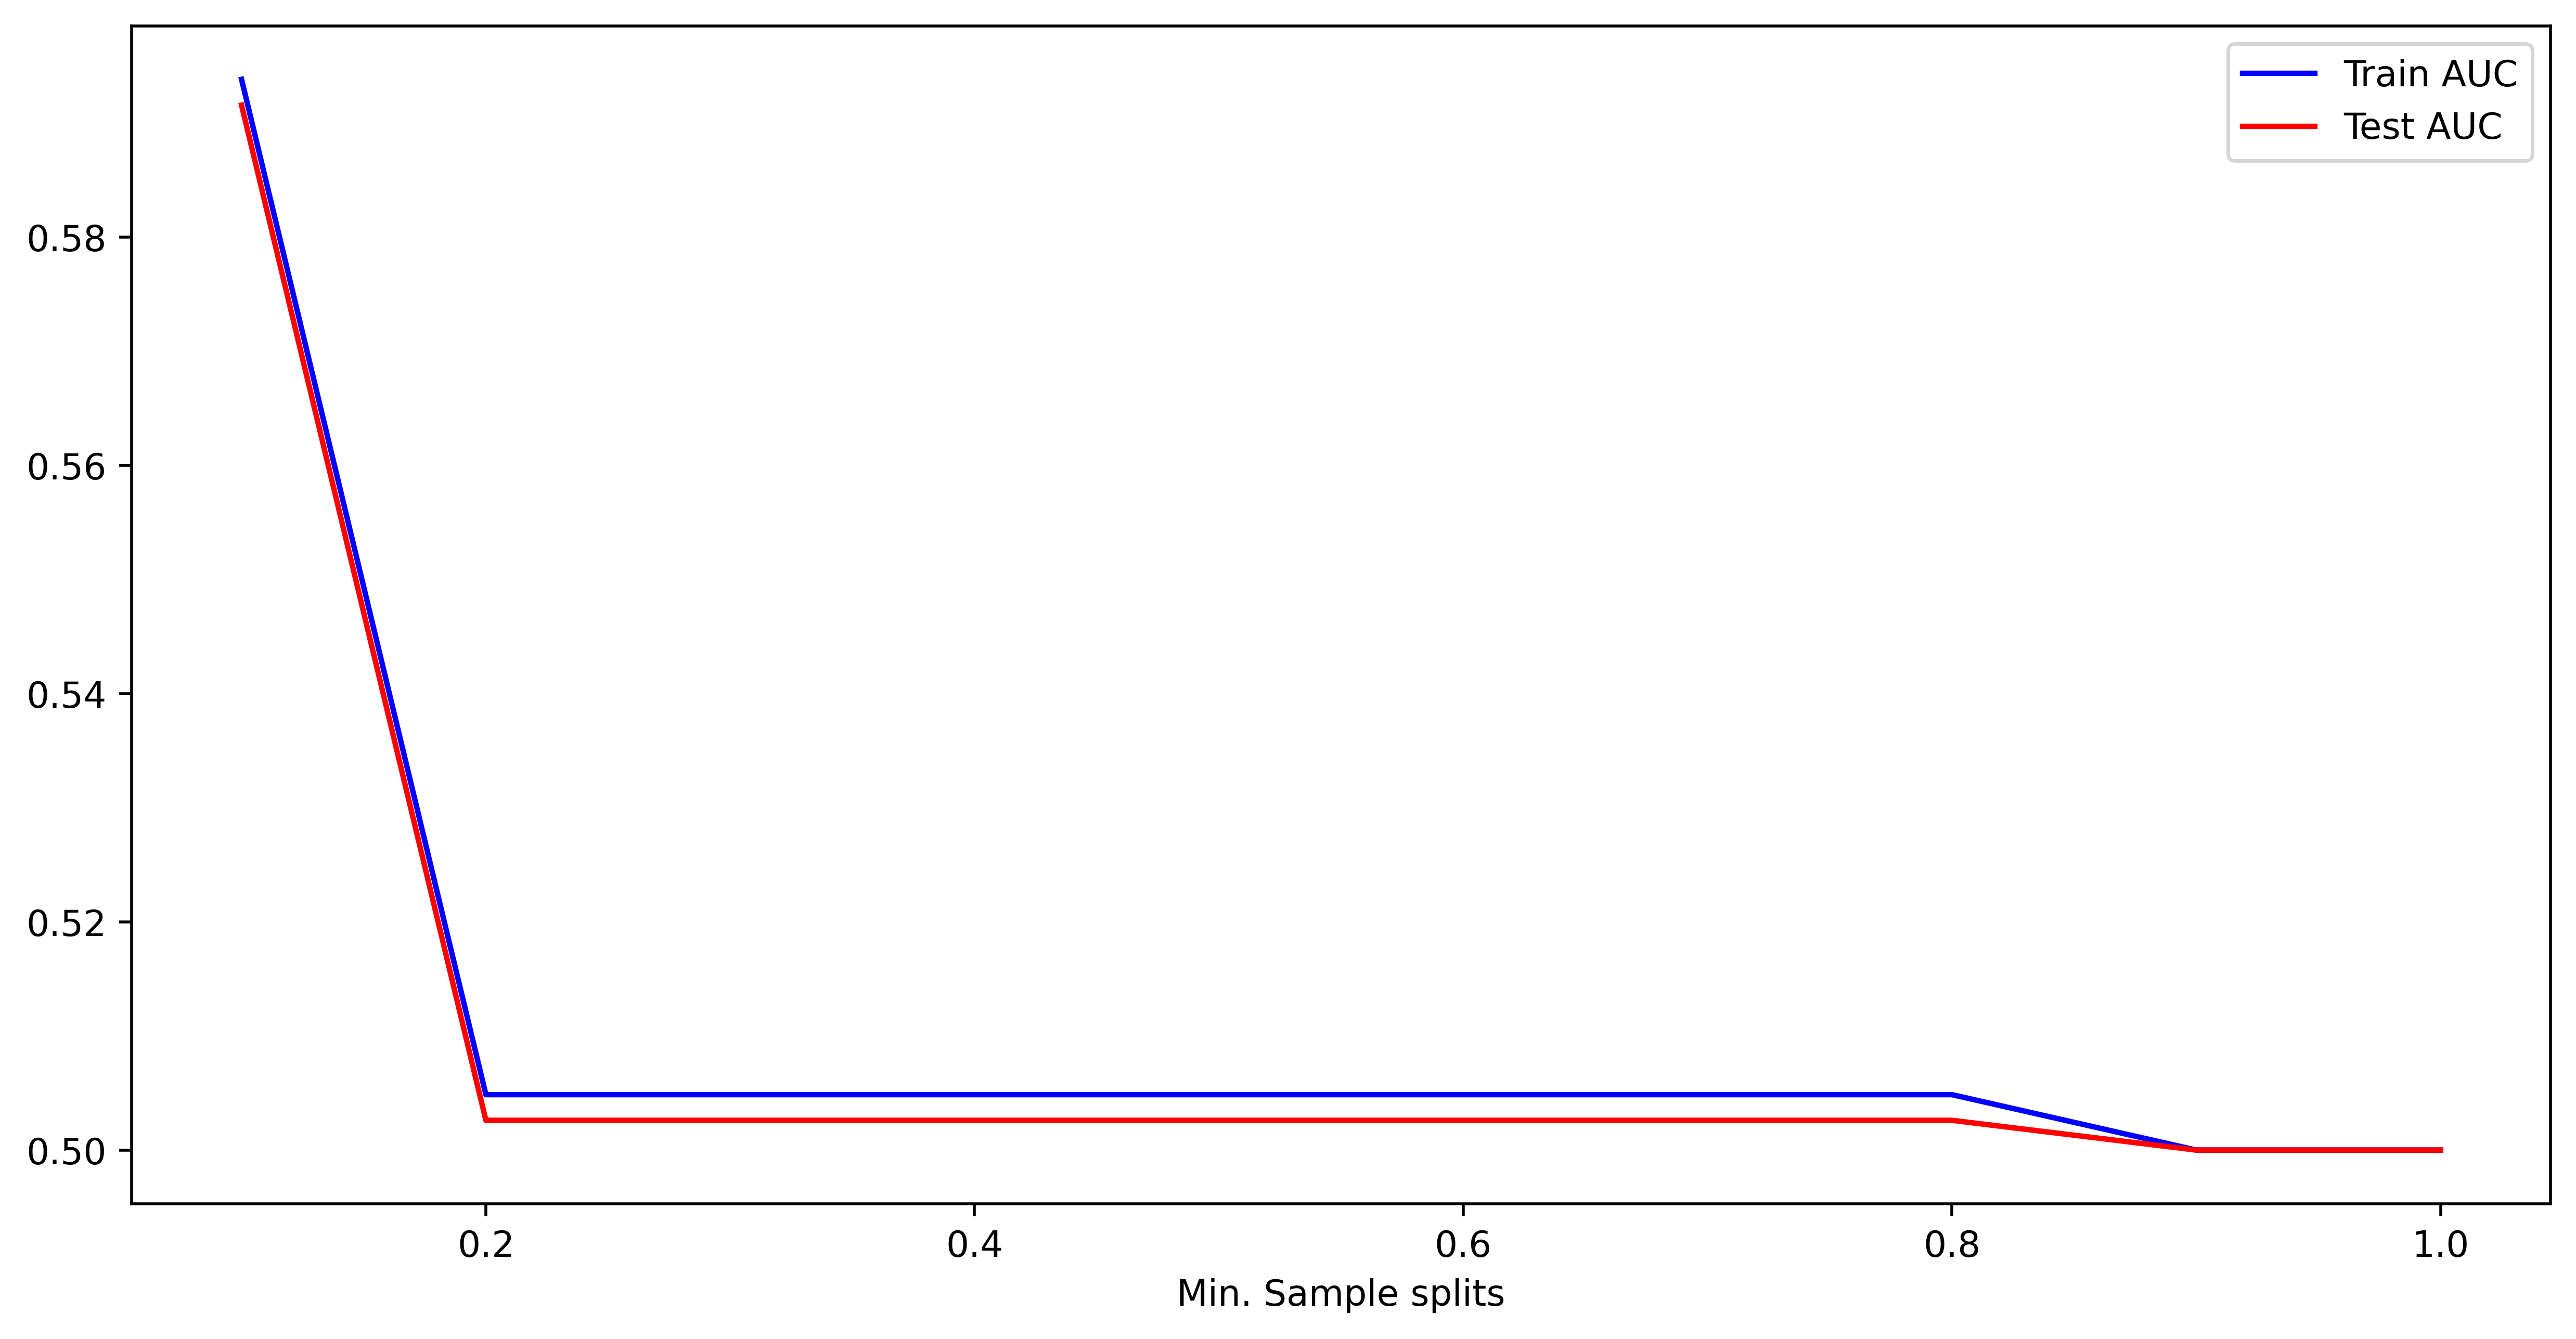

In [78]:
#obtained from same source 
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=42)
    
    X= None
    y= None
    X = df.drop(columns='y')
    y = df.y

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)
    
    scalar = StandardScaler()
    ohe = OneHotEncoder(sparse=False)
    X_train_scaled = scalar.fit_transform(X_train[not_object])
    X_train_not_object = ohe.fit_transform(X_train[objcolslist])

    X_train=np.concatenate([X_train_scaled, X_train_not_object], axis=1)




    dt.fit(X_train, y_train)


    X_test_scaled = scalar.transform(X_test[not_object])
    X_test_not_object = ohe.transform(X_test[objcolslist])
    X_test=np.concatenate([X_test_scaled, X_test_not_object], axis=1)
    
    train_pred = dt.predict(X_train)
    #use the roc() to get the fp, tp, thresholds and roc_auc score 
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # append auc score to list of train results from fpr and tpr  
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

the problem with this min sample split is that it seems to level out at .2-.8 

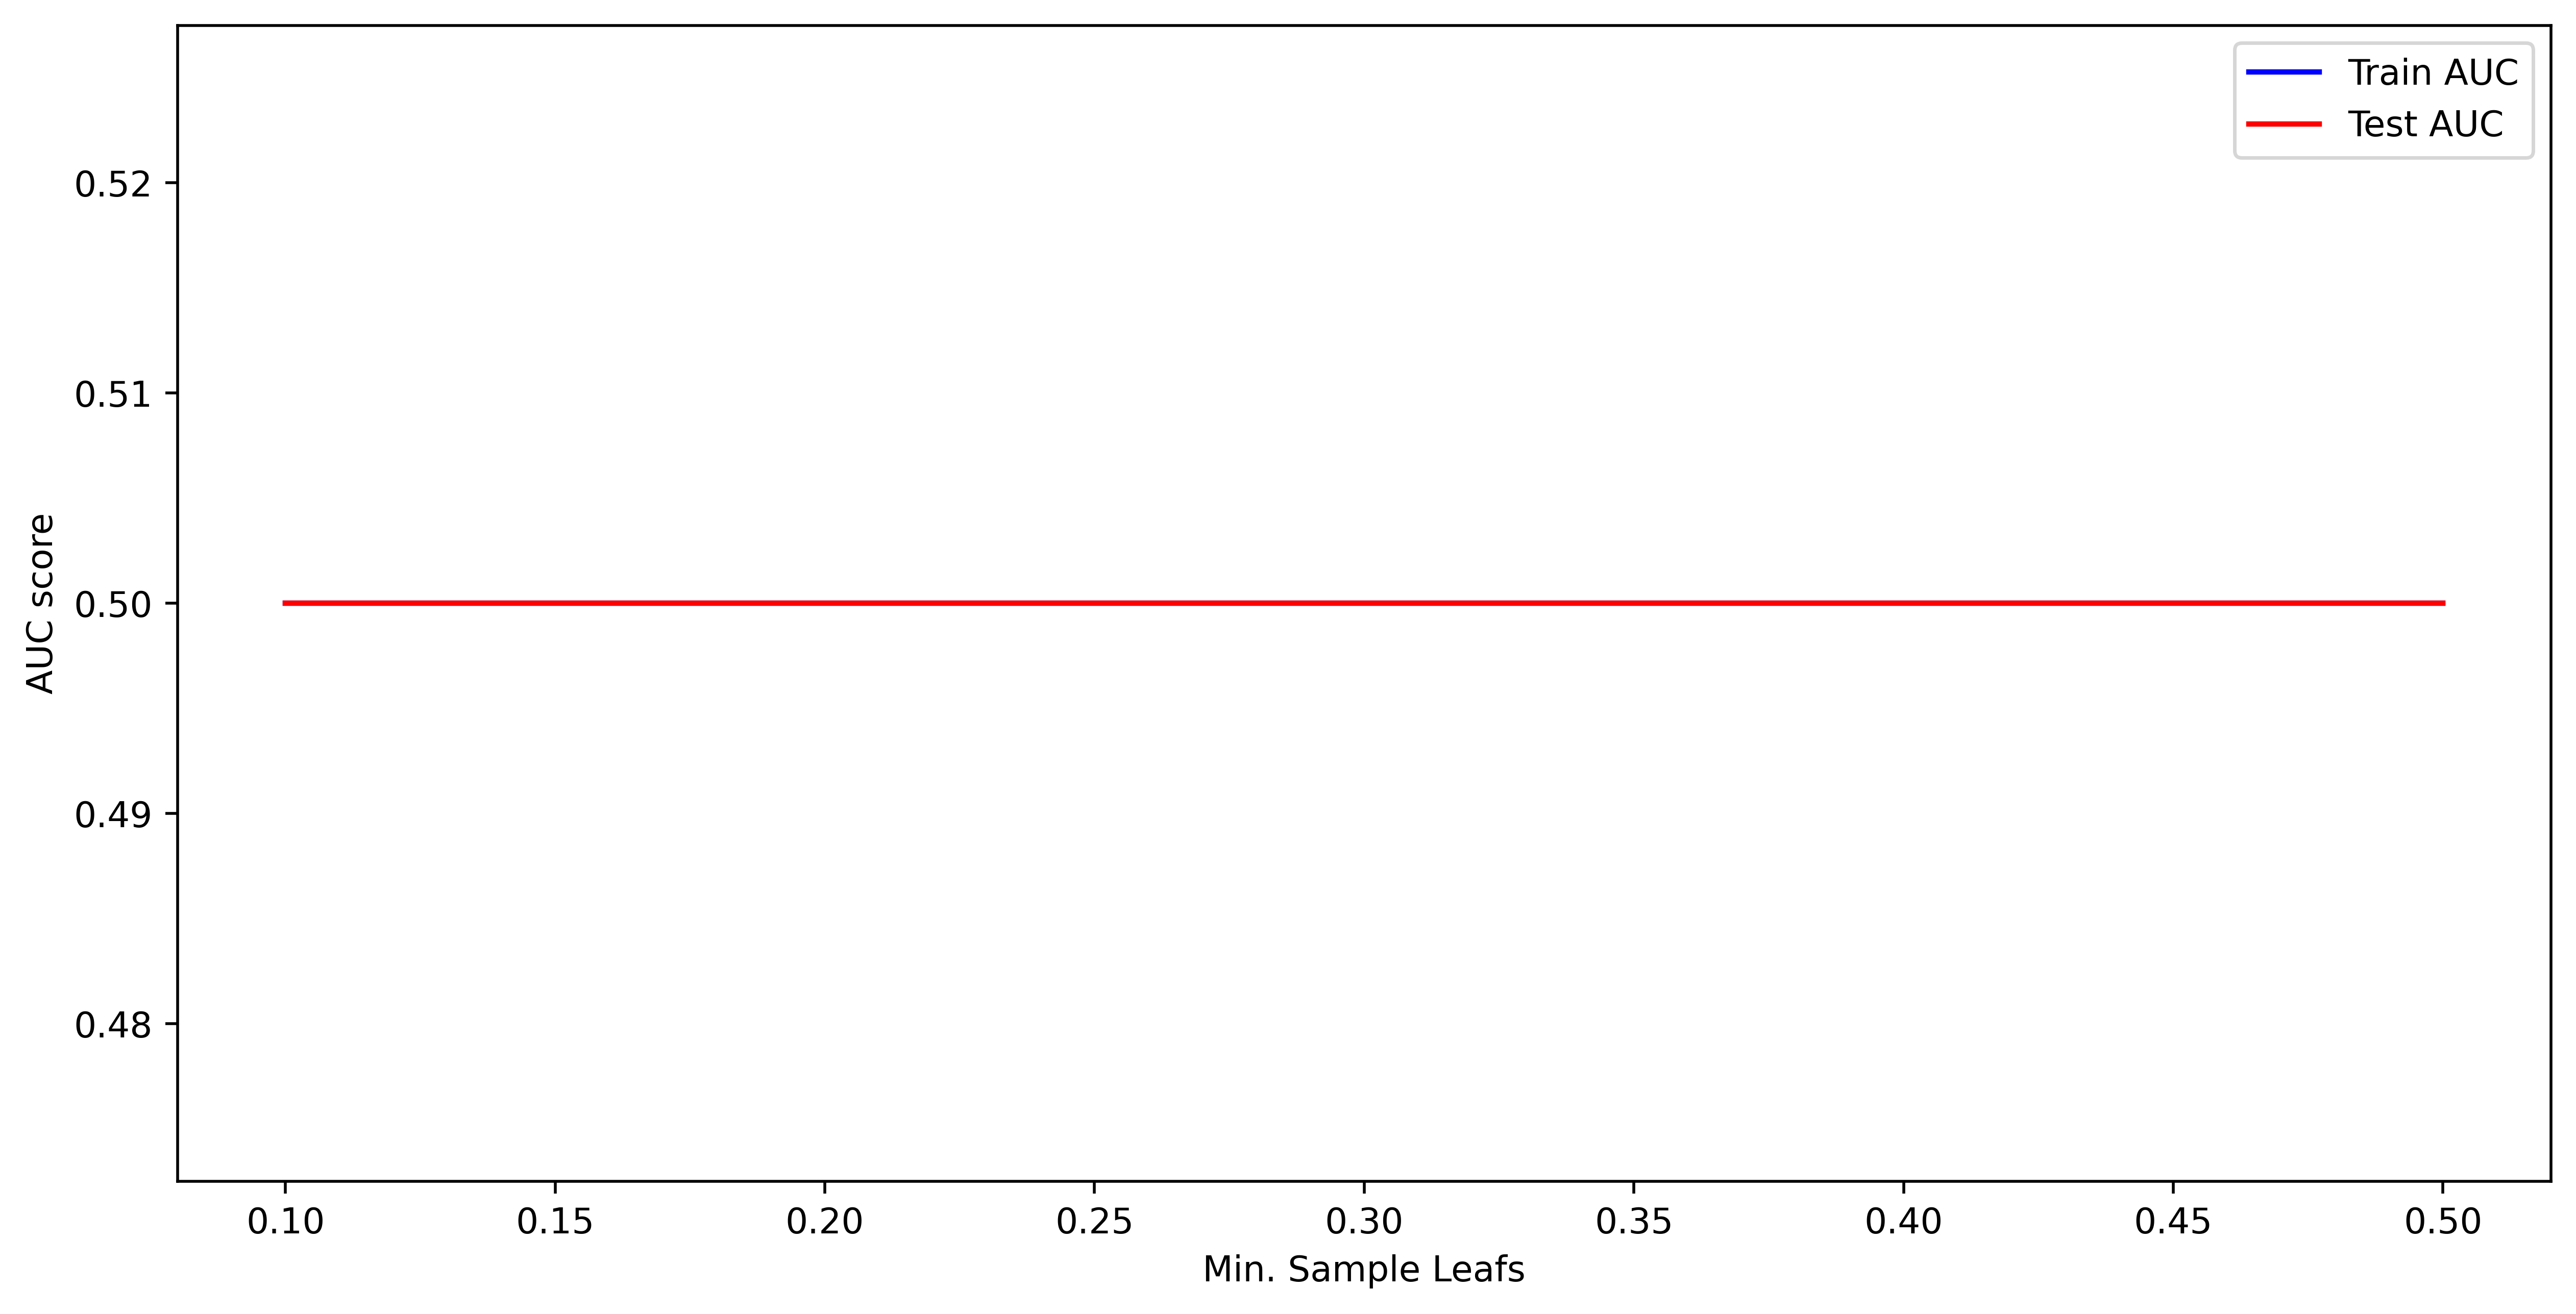

In [79]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=42)
    
    X= None
    y= None
    X = df.drop(columns='y')
    y = df.y

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)
    
    scalar = StandardScaler()
    ohe = OneHotEncoder(sparse=False)
    X_train_scaled = scalar.fit_transform(X_train[not_object])
    X_train_not_object = ohe.fit_transform(X_train[objcolslist])

    X_train=np.concatenate([X_train_scaled, X_train_not_object], axis=1)




    dt.fit(X_train, y_train)


    X_test_scaled = scalar.transform(X_test[not_object])
    X_test_not_object = ohe.transform(X_test[objcolslist])
    X_test=np.concatenate([X_test_scaled, X_test_not_object], axis=1)
    
    train_pred = dt.predict(X_train)
    #use the roc() to get the fp, tp, thresholds and roc_auc score 
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # append auc score to list of train results from fpr and tpr  
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

The min sample leafs tell us nothing 

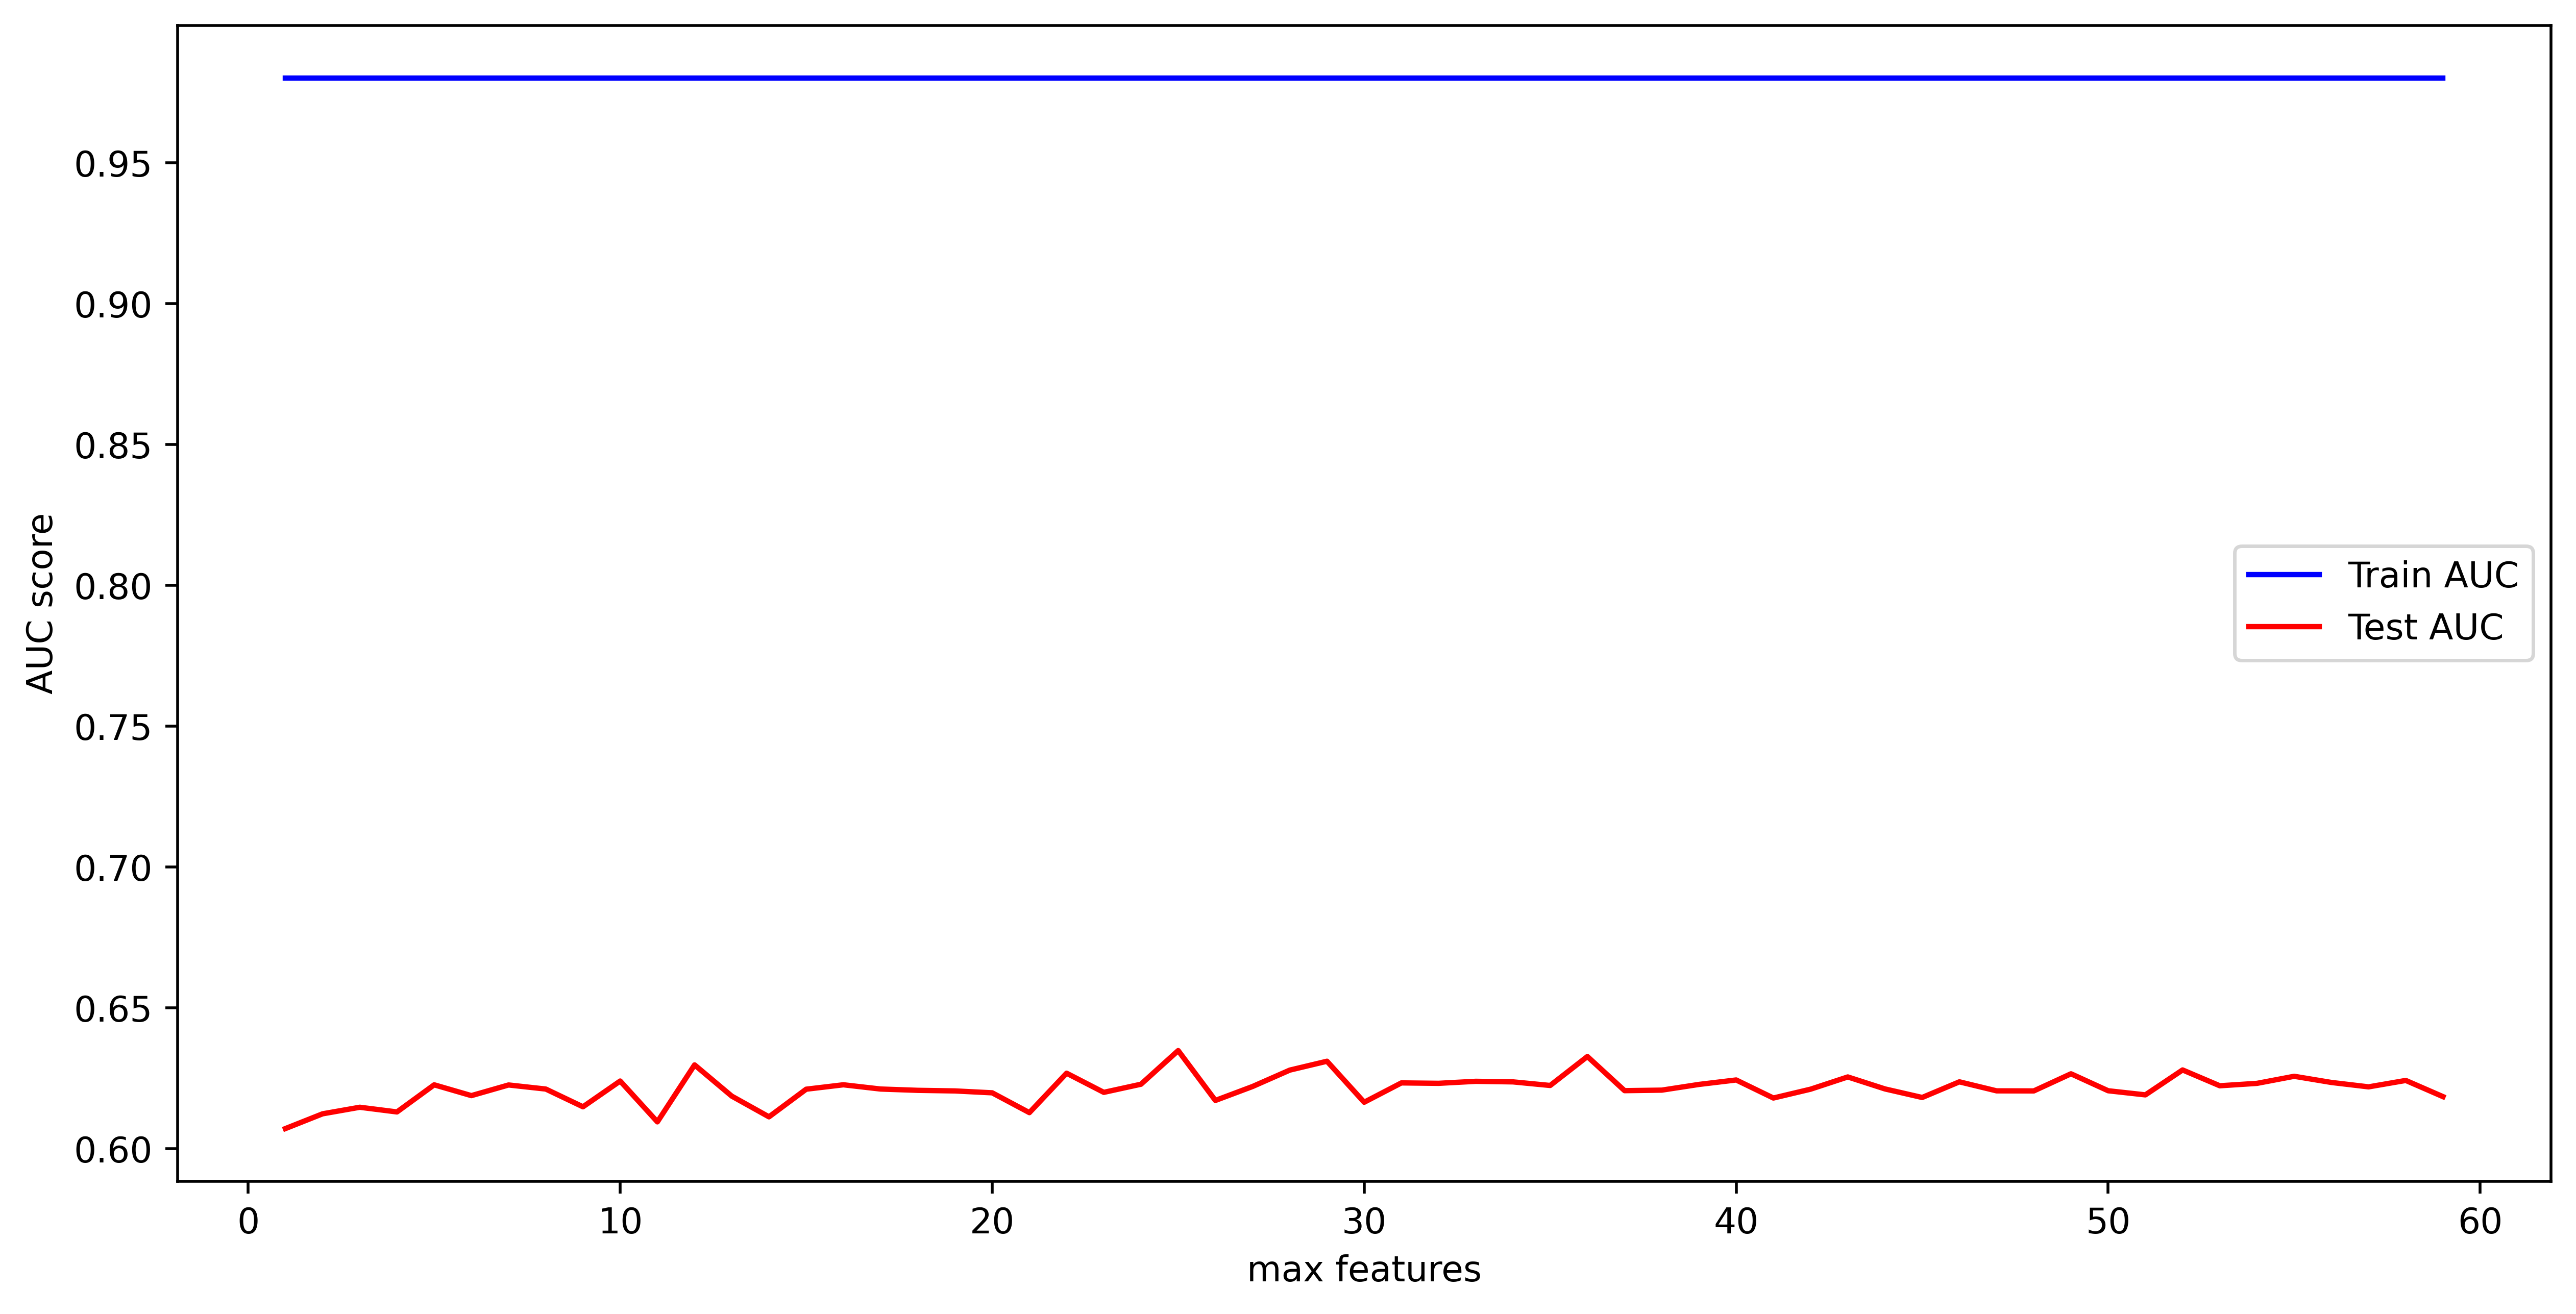

In [80]:
#same as above
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=42)
    
    X= None
    y= None
    X = df.drop(columns='y')
    y = df.y

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)
    
    scalar = StandardScaler()
    ohe = OneHotEncoder(sparse=False)
    X_train_scaled = scalar.fit_transform(X_train[not_object])
    X_train_not_object = ohe.fit_transform(X_train[objcolslist])

    X_train=np.concatenate([X_train_scaled, X_train_not_object], axis=1)




    dt.fit(X_train, y_train)


    X_test_scaled = scalar.transform(X_test[not_object])
    X_test_not_object = ohe.transform(X_test[objcolslist])
    X_test=np.concatenate([X_test_scaled, X_test_not_object], axis=1)
    
    train_pred = dt.predict(X_train)
    #use the roc() to get the fp, tp, thresholds and roc_auc score 
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # append auc score to list of train results from fpr and tpr  
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

# Hypertuning a DT with Optuna


So at this point, we cannot adjust the parameters from through visualization. Optuna for best parameters supercedes other Grid Searches


In [81]:
#so we're going to fine tune this and RF and see which model behaves better 
#this is better than our current visual method
from optuna.samplers import TPESampler
import optuna
#define the objective to create a trial
#https://optuna.readthedocs.io/en/stable/reference/generated/optuna.trial.Trial.html
def objective(trial):
#take in the best params allowed
    dt_params = {
        'criterion':  trial.suggest_categorical('criterion',['entropy']),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None])
    }
    #uses dt_params as the parameter, which is the function
    #**kwargs/dict
    dt = DecisionTreeClassifier(**dt_params)

    X= None
    y= None
    X = df.drop(columns='y')
    y = df.y

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)
    
    scalar = StandardScaler()
    ohe = OneHotEncoder(sparse=False)
    X_train_scaled = scalar.fit_transform(X_train[not_object])
    X_train_not_object = ohe.fit_transform(X_train[objcolslist])

    X_train=np.concatenate([X_train_scaled, X_train_not_object], axis=1)

    dt.fit(X=X_train, y=y_train)

    X_test_scaled = scalar.transform(X_test[not_object])
    X_test_not_object = ohe.transform(X_test[objcolslist])
    X_test=np.concatenate([X_test_scaled, X_test_not_object], axis=1)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #we want the optimal ROC_AUC score 
    return roc_auc
#make the study
study_2 = optuna.create_study(direction='maximize')
#use the optimize call to take the objective, and run the amount of trials 20 times
study_2.optimize(objective, n_trials=20)

[I 2022-10-02 12:43:34,690] A new study created in memory with name: no-name-ff718e3c-fbcc-48d2-a1ef-61cbf1303be4
[I 2022-10-02 12:43:35,172] Trial 0 finished with value: 0.6497753921480592 and parameters: {'criterion': 'entropy', 'min_samples_split': 3, 'min_samples_leaf': 3, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.6497753921480592.
[I 2022-10-02 12:43:35,616] Trial 1 finished with value: 0.624892185868019 and parameters: {'criterion': 'entropy', 'min_samples_split': 6, 'min_samples_leaf': 7, 'class_weight': None}. Best is trial 0 with value: 0.6497753921480592.
[I 2022-10-02 12:43:36,114] Trial 2 finished with value: 0.6241899663344219 and parameters: {'criterion': 'entropy', 'min_samples_split': 4, 'min_samples_leaf': 1, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.6497753921480592.
[I 2022-10-02 12:43:36,563] Trial 3 finished with value: 0.6260318649343939 and parameters: {'criterion': 'entropy', 'min_samples_split': 8, 'min_samples_leaf': 8, 'class

[I 2022-09-29 05:01:50,718] Trial 17 finished with value: 0.8897790725904345 and parameters: {'criterion': 'entropy', 'min_samples_split': 4, 'min_samples_leaf': 8, 'class_weight': None}. Best is trial 17 with value: 0.8897790725904345.

In [82]:
#set as new best params 
X=None
y=None
best= {'criterion': 'entropy', 'min_samples_split': 4, 'min_samples_leaf': 8, 'class_weight': None}
X = df.drop(columns='y')
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [83]:
#a pipeline would be great right now
scalar = StandardScaler()
ohe = OneHotEncoder(sparse=False)
X_train_scaled = scalar.fit_transform(X_train[not_object])
X_train_not_object = ohe.fit_transform(X_train[objcolslist])

X_train=np.concatenate([X_train_scaled, X_train_not_object], axis=1)

In [84]:
dt = DecisionTreeClassifier(**best)
dt.fit(X=X_train, y=y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=8,
                       min_samples_split=4)

In [85]:
X_test_scaled = scalar.transform(X_test[not_object])
X_test_not_object = ohe.transform(X_test[objcolslist])
X_test=np.concatenate([X_test_scaled, X_test_not_object], axis=1)
y_pred=clf.predict(X_test)

In [86]:



false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


X_scaled = scalar.transform(X[not_object])
X_not_object = ohe.transform(X[objcolslist])
X = np.concatenate([X_scaled, X_not_object], axis=1)

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
from sklearn.metrics import f1_score
text_representation = tree.export_text(clf)
print(text_representation)
print(f1_score(y_test, y_pred, average='micro'))


AUC is :0.63

Confusion Matrix
----------------
|--- feature_7 <= -1.09
|   |--- feature_59 <= 0.50
|   |   |--- feature_39 <= 0.50
|   |   |   |--- feature_41 <= 0.50
|   |   |   |   |--- feature_5 <= 0.94
|   |   |   |   |   |--- feature_0 <= 0.53
|   |   |   |   |   |   |--- feature_48 <= 0.50
|   |   |   |   |   |   |   |--- feature_1 <= 0.35
|   |   |   |   |   |   |   |   |--- feature_31 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_31 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_6 <= -1.58
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= -1.59
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  -1.59
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_6 >  -1.58
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  0.35


.02 increase in roc 4%decrease in accuracy

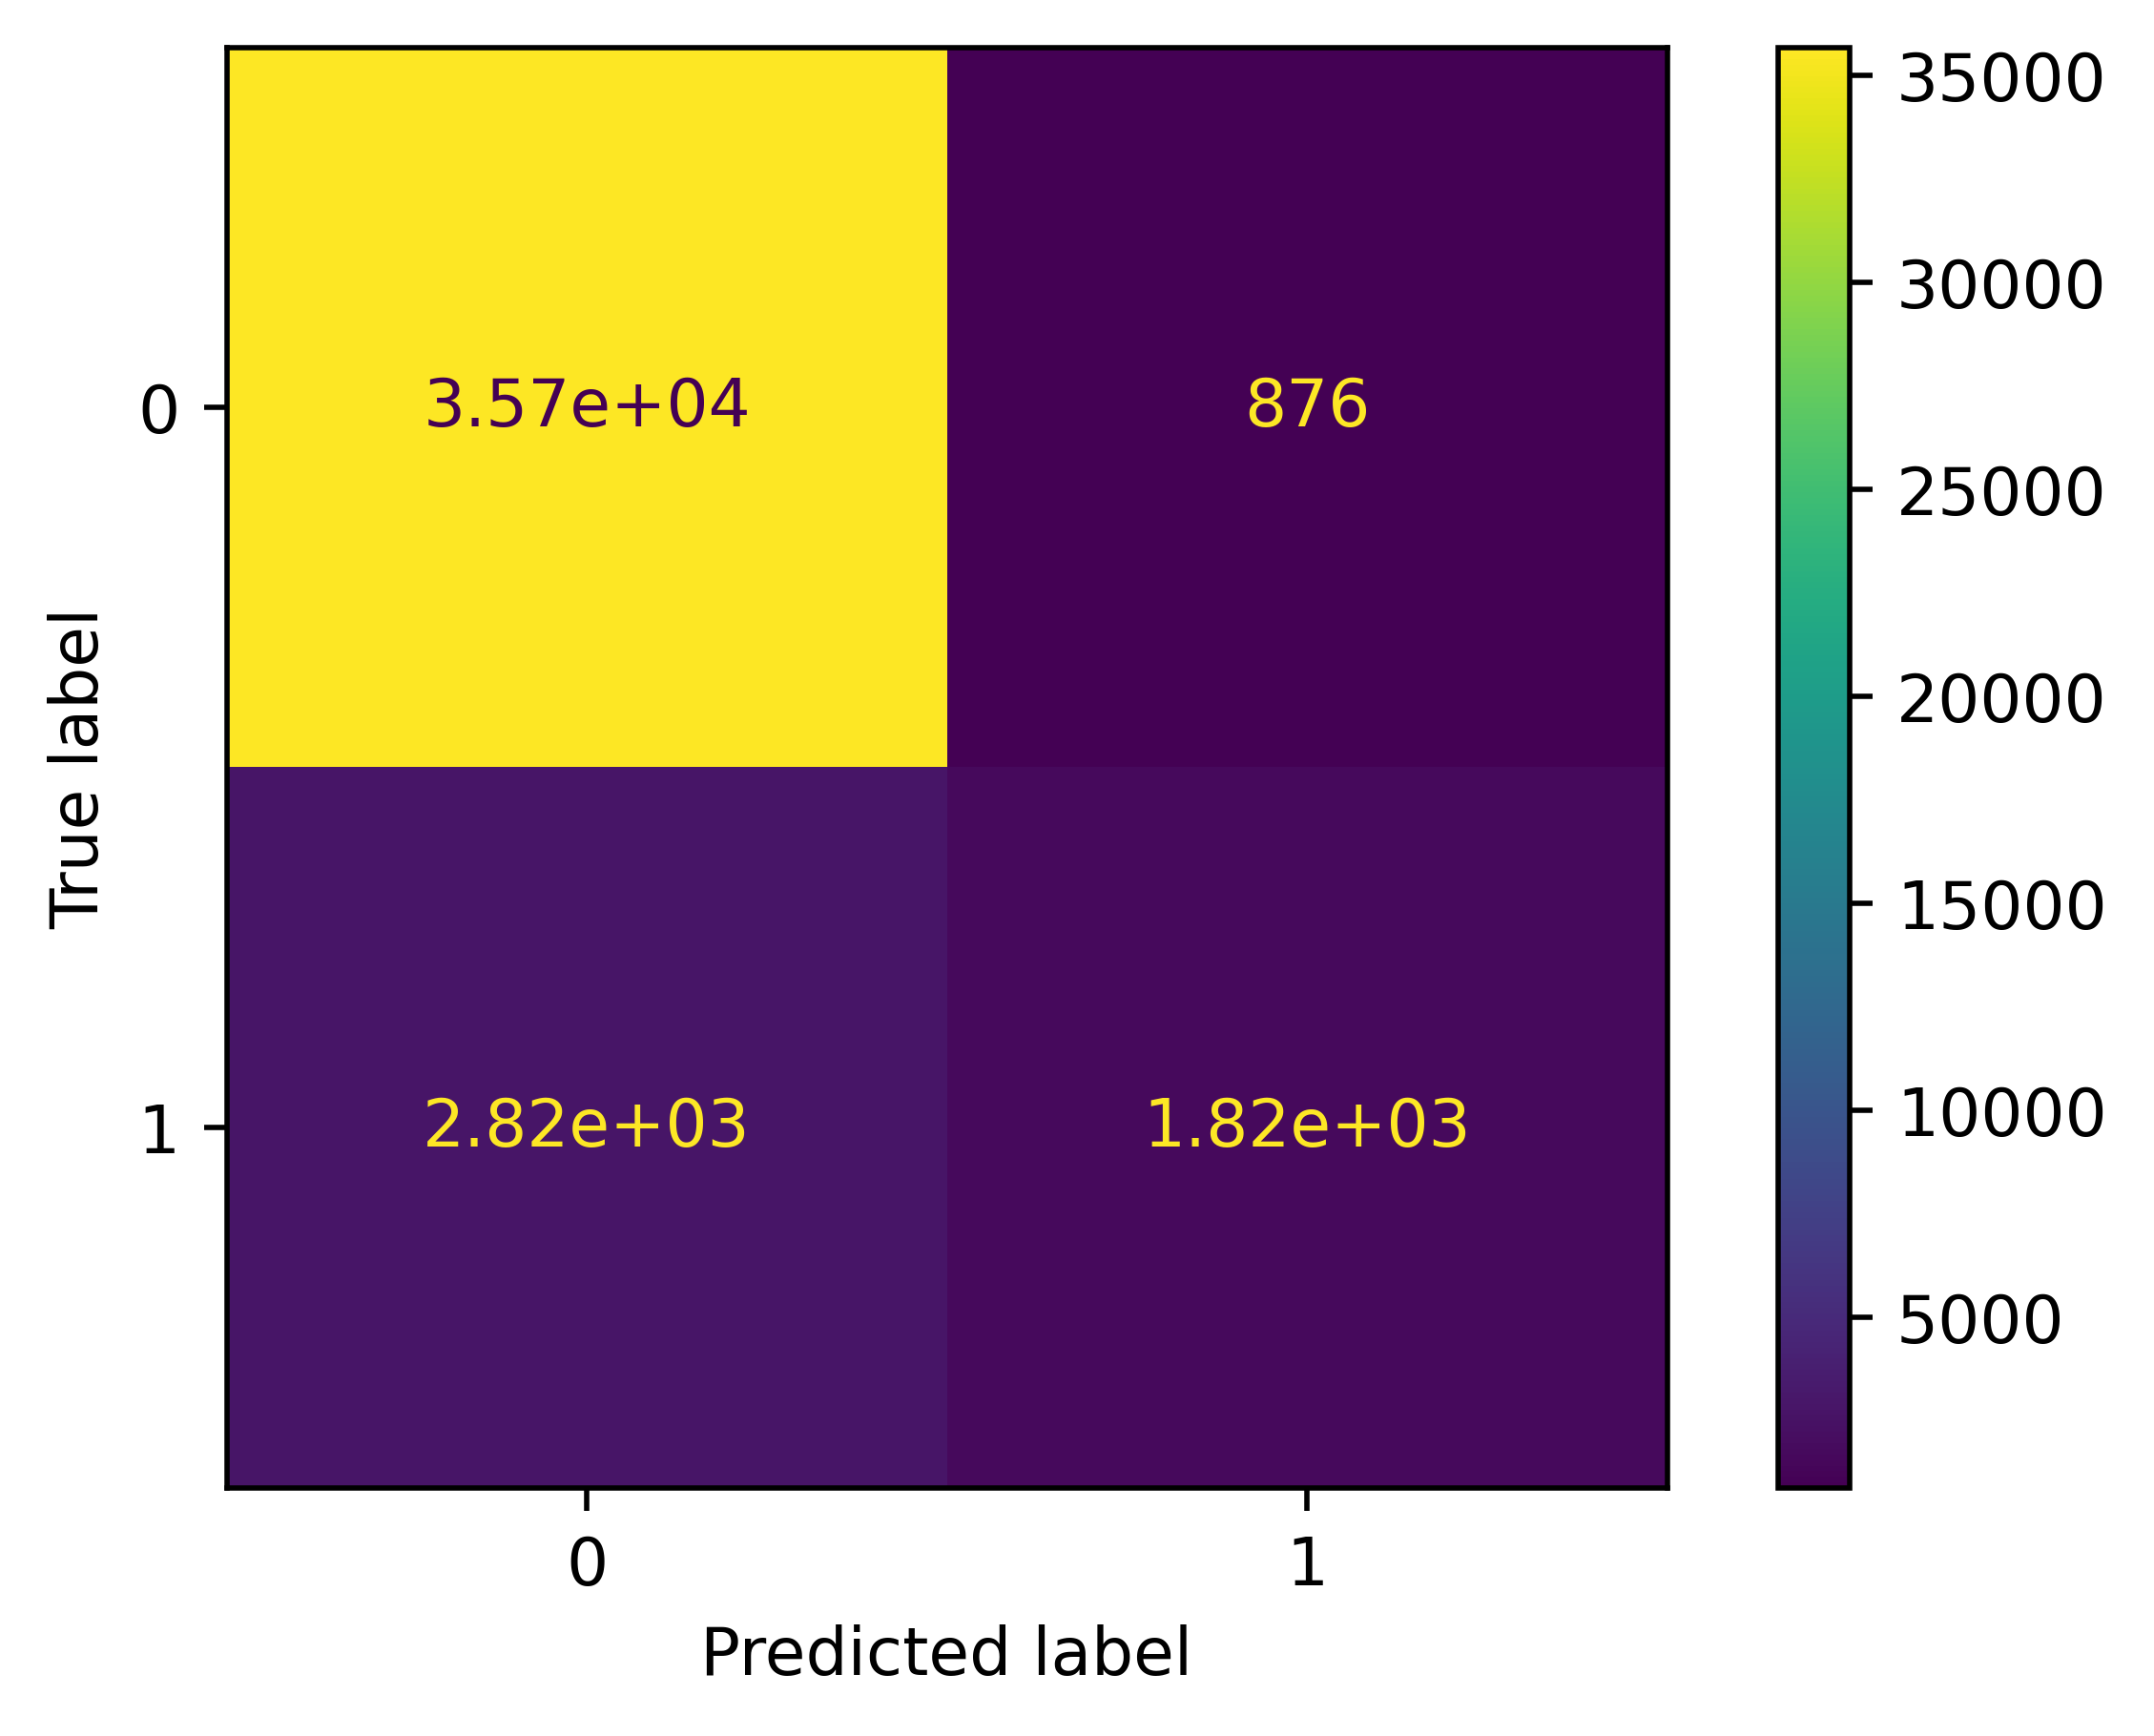

In [87]:
plot_confusion_matrix(dt, X, y, values_format='.3g')
plt.show()

# RF initial model 

How an RF works:

An RF takes the majority vote of a sample's outcome (0 1) and creates a split node off multiple trees. Instead of having one tree, we can have multiple primary nodes, this is helpful if we are trying to specify the feature importances across multiple models.

Innately it is a ensemble method, which means it bags multiple different subdataframes from our main dataframe and makes a tree. So adding a train test split divides the data even further, however we still need to implement the train test split because the default is set at .25

In [88]:
#this time with RF
#notice that we are still splitting because the default value for test size is .25 if not specified
#it is n
X=None
y=None

X = df.drop(columns='y')
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [89]:
objcolslist
not_object

scalar = StandardScaler()
ohe = OneHotEncoder(sparse=False)
X_train_scaled = scalar.fit_transform(X_train[not_object])
X_train_not_object = ohe.fit_transform(X_train[objcolslist])

X_train=np.concatenate([X_train_scaled, X_train_not_object], axis=1)

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [91]:
X_test_scaled = scalar.transform(X_test[not_object])
X_test_not_object = ohe.transform(X_test[objcolslist])
X_test=np.concatenate([X_test_scaled, X_test_not_object], axis=1)

In [92]:
y_pred=rf.predict(X_test)

In [93]:
# Check the AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


X_scaled = scalar.transform(X[not_object])
X_not_object = ohe.transform(X[objcolslist])
X = np.concatenate([X_scaled, X_not_object], axis=1)

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
from sklearn.metrics import f1_score
#text representation is gone but we will find a substitute for it later 
#text_representation = tree.export_text(rf)
#print(text_representation)
print(f1_score(y_test, y_pred, average='micro'))


AUC is :0.63

Confusion Matrix
----------------
0.8925305494861212


89% accuracy .63 AUC- lets go back up 

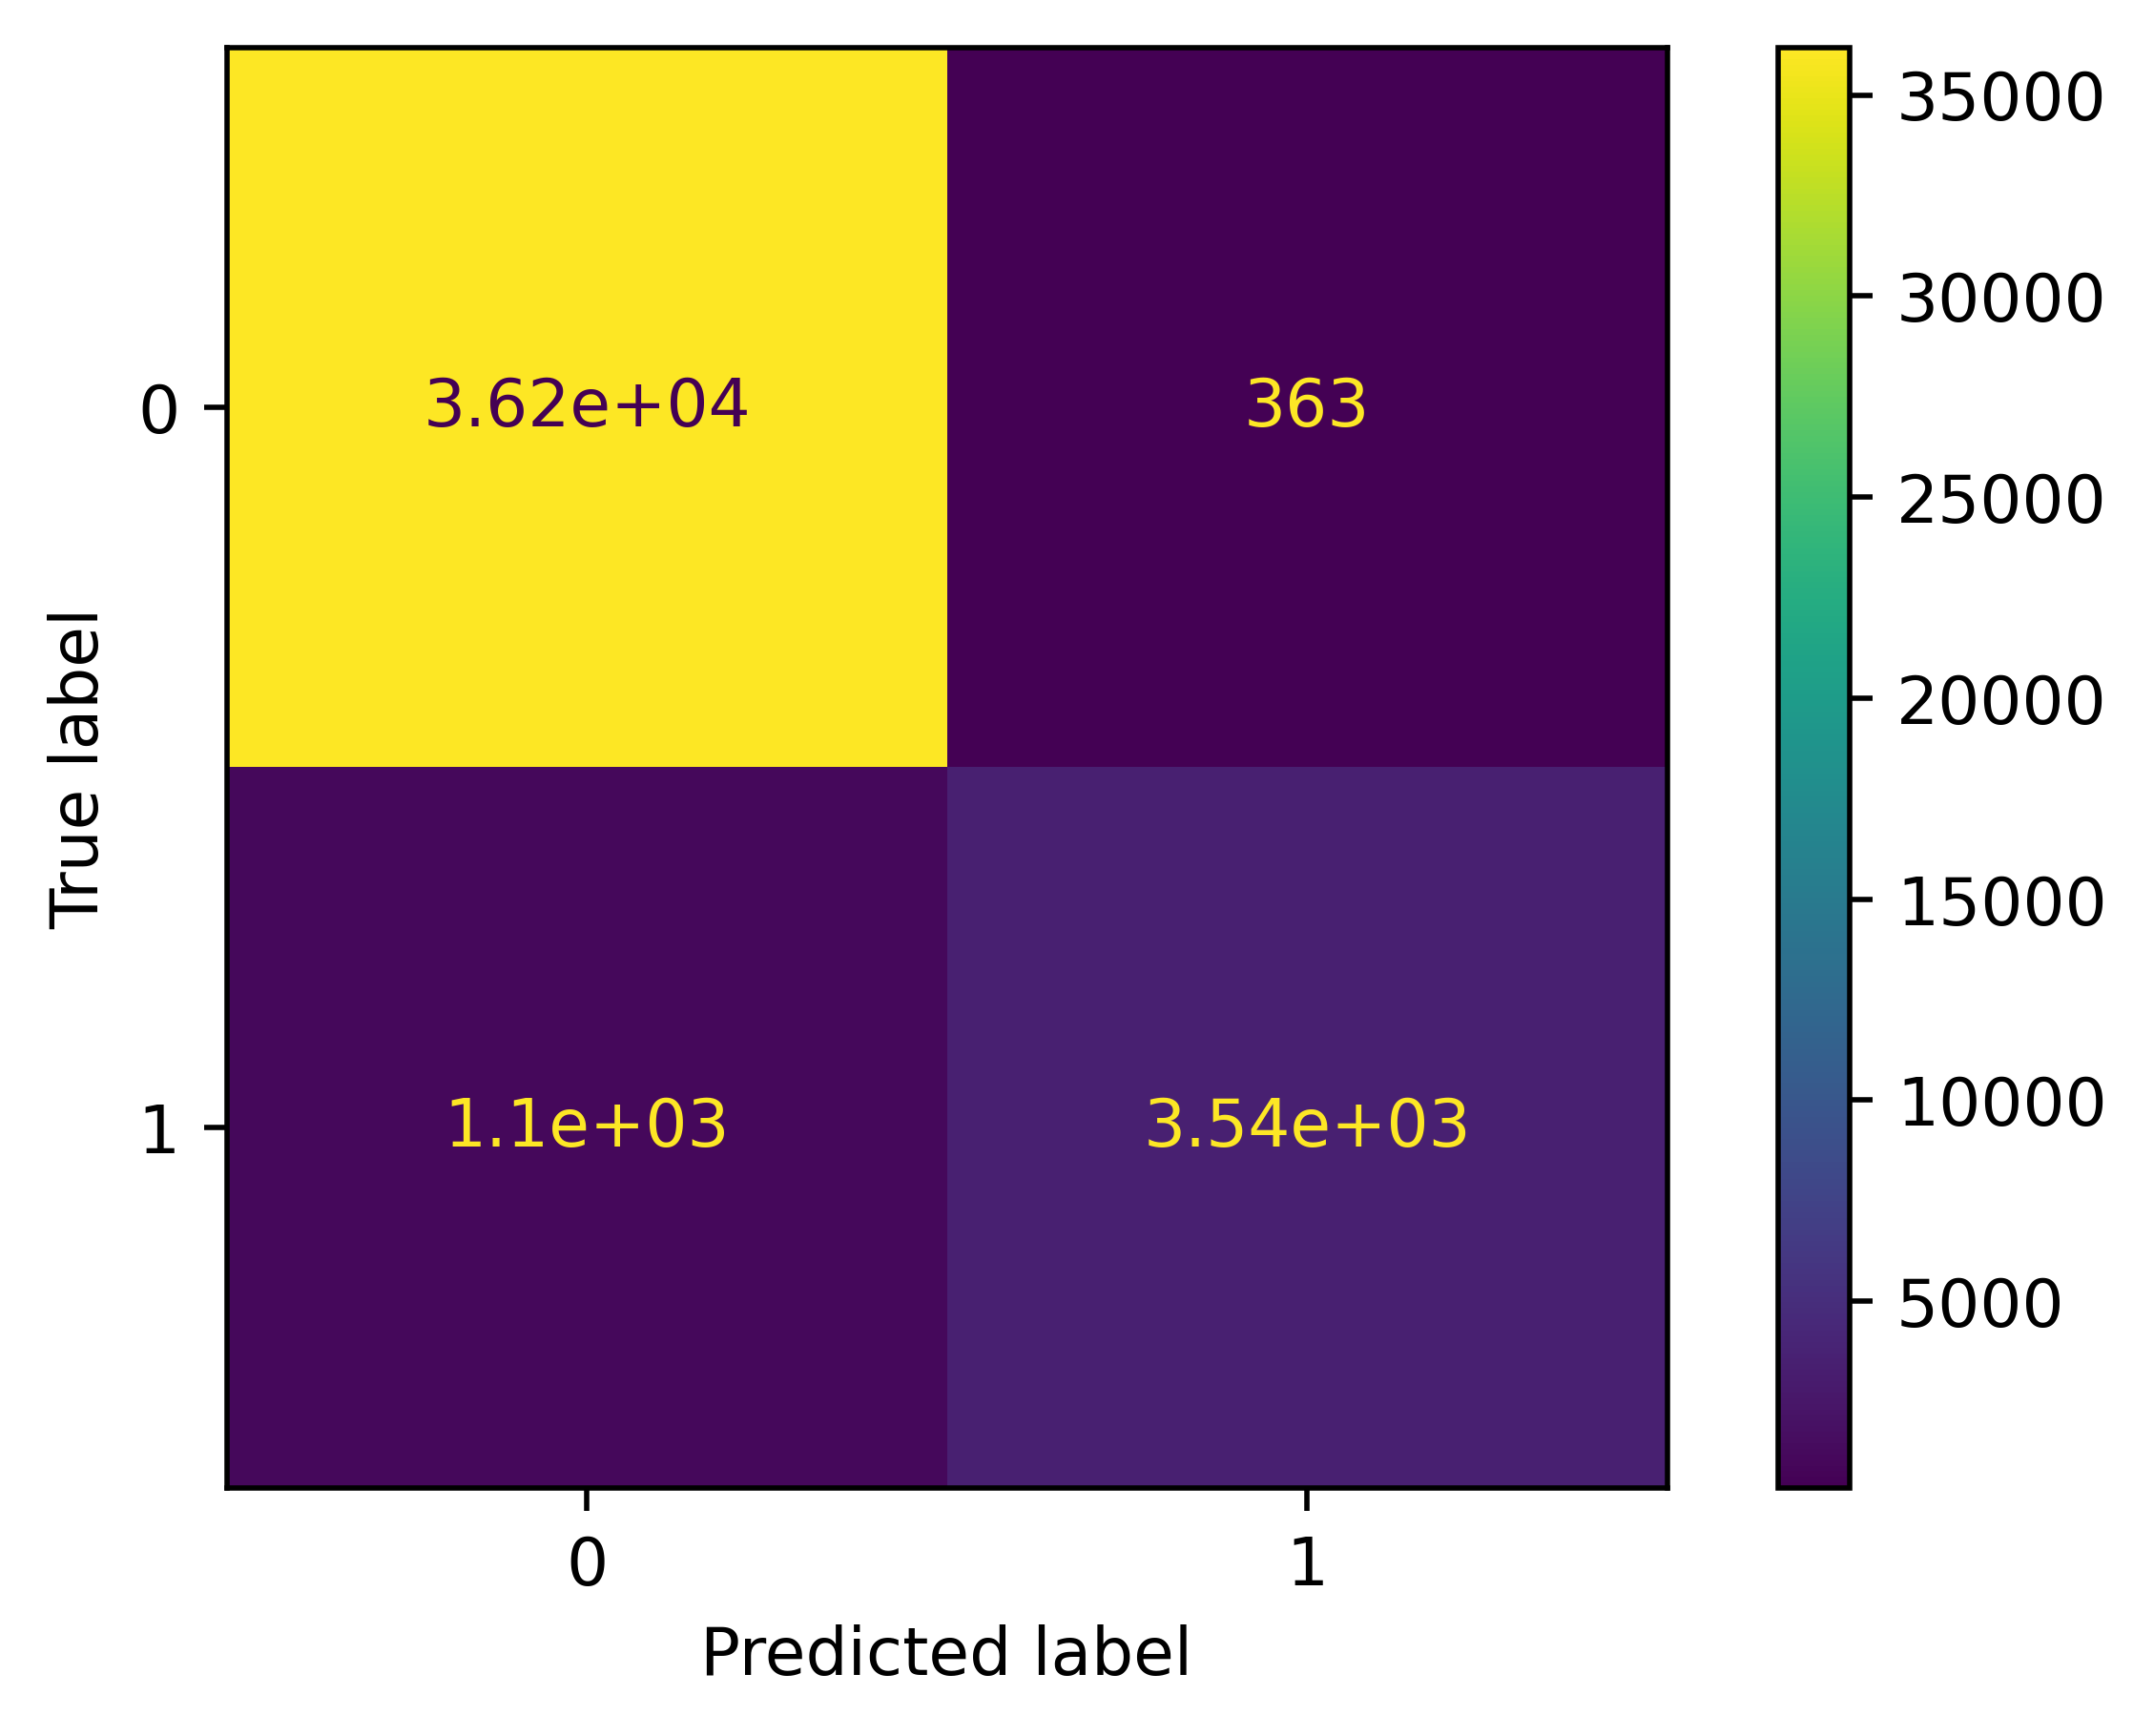

In [94]:
#no substantial changes 
plot_confusion_matrix(rf, X, y, values_format='.3g')
plt.show()

In [95]:
#fine tune the model for rf
def objective(trial):
    rf_params = {
        'criterion':  trial.suggest_categorical('criterion',['entropy']),
        'min_samples_split':        trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_int('max_features', 10, 46),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample'])
    }
    
    rf = RandomForestClassifier(**rf_params)
    X= None
    y= None
    X = df.drop(columns='y')
    y = df.y
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    
    scalar = StandardScaler()
    ohe = OneHotEncoder(sparse=False)
    X_train_scaled = scalar.fit_transform(X_train[not_object])
    X_train_not_object = ohe.fit_transform(X_train[objcolslist])

    X_train=np.concatenate([X_train_scaled, X_train_not_object], axis=1)
    
    
    
    rf.fit(X=X_train, y=y_train)

    X_test_scaled = scalar.transform(X_test[not_object])
    X_test_not_object = ohe.transform(X_test[objcolslist])
    X_test=np.concatenate([X_test_scaled, X_test_not_object], axis=1)


    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    return roc_auc
#https://optuna.readthedocs.io/en/stable/reference/generated/optuna.create_study.html
study_2 = optuna.create_study(direction='maximize')
study_2.optimize(objective, n_trials=20)

[I 2022-10-02 12:43:50,891] A new study created in memory with name: no-name-6aff1762-9dc7-4e2a-886b-1a924a23ccdb
[I 2022-10-02 12:43:55,751] Trial 0 finished with value: 0.7325817658525555 and parameters: {'criterion': 'entropy', 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 11, 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.7325817658525555.
[I 2022-10-02 12:44:05,239] Trial 1 finished with value: 0.7280265297496963 and parameters: {'criterion': 'entropy', 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 34, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7325817658525555.
[I 2022-10-02 12:44:12,471] Trial 2 finished with value: 0.71733254722171 and parameters: {'criterion': 'entropy', 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 25, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7325817658525555.
[I 2022-10-02 12:44:19,979] Trial 3 finished with value: 0.7298742904318226 and parameters: {'c

[I 2022-09-30 06:28:27,213] Trial 18 finished with value: 0.7372668981750222 and parameters: {'criterion': 'entropy', 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 13, 'class_weight': 'balanced_subsample'}. Best is trial 18 with value: 0.7372668981750222.


In [96]:
#using the best parameters to retrain:
best={'criterion': 'entropy', 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 13, 'class_weight': 'balanced_subsample'}
X=None 
y=None
X = df.drop(columns='y')
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [97]:
objcolslist
not_object

scalar = StandardScaler()
ohe = OneHotEncoder(sparse=False)
X_train_scaled = scalar.fit_transform(X_train[not_object])
X_train_not_object = ohe.fit_transform(X_train[objcolslist])

#X_train=np.concatenate([X_train_scaled, X_train_not_object], axis=1)

In [98]:
#in order to get the list of the column name we take the first scaled array (continuous)
#for the second we need to pass OHE through it, get the featured names
column1 = list(X_train[not_object].columns)
column2 = list(ohe.get_feature_names(X_train[objcolslist].columns))
#add
list_of_x_train= column1+column2
#combine in that order in which it was encoded
X_train=np.concatenate([X_train_scaled, X_train_not_object], axis=1)

In [99]:
rf = RandomForestClassifier(**best)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features=13, min_samples_leaf=9,
                       min_samples_split=9)

In [100]:
X_test_scaled = scalar.transform(X_test[not_object])
X_test_not_object = ohe.transform(X_test[objcolslist])
X_test=np.concatenate([X_test_scaled, X_test_not_object], axis=1)

In [101]:
y_pred=rf.predict(X_test)

In [102]:

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

print(f1_score(y_test, y_pred, average='micro'))


AUC is :0.74
0.8651776321113539


*This is an ideal result because of the increase in AUC*

In [103]:
#
X_scaled = scalar.transform(X[not_object])
X_not_object = ohe.transform(X[objcolslist])
X = np.concatenate([X_scaled, X_not_object], axis=1)

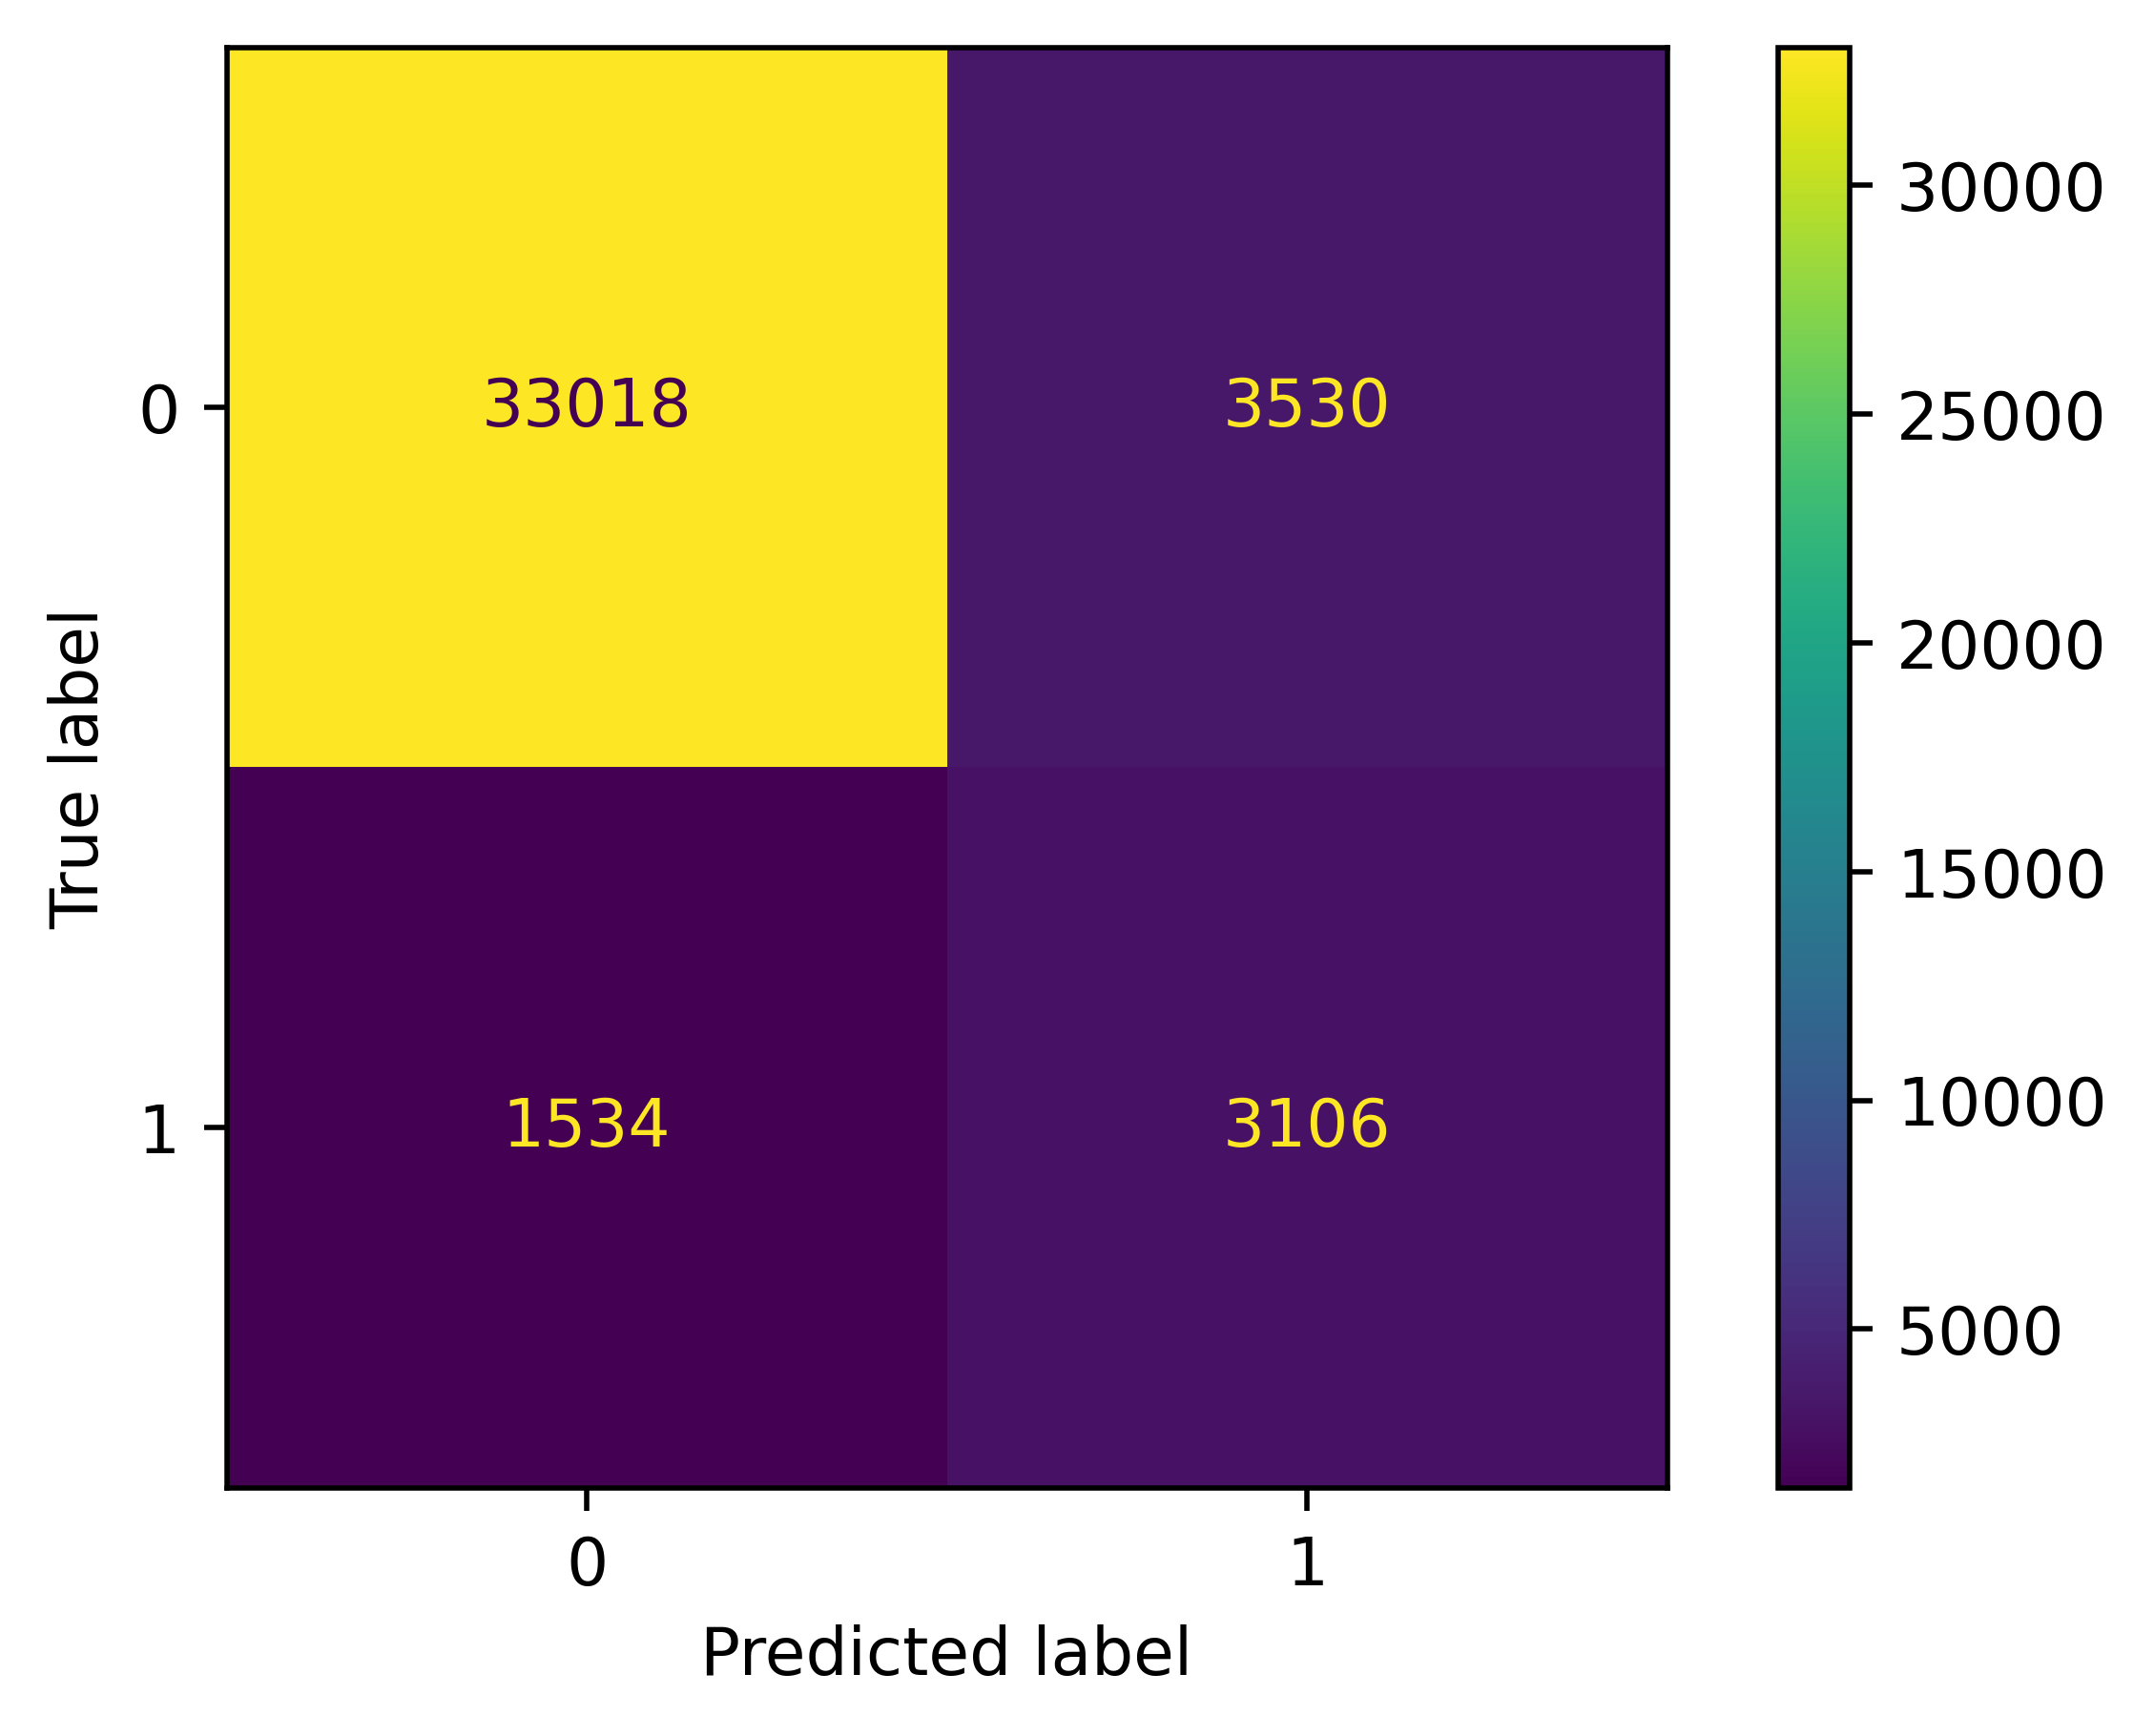

In [104]:
#cm
plot_confusion_matrix(rf, X, y, cmap='viridis', )
plt.show()

True negatives = 33000
(T1 Error)True Positives = 3110
False positives = 3540
(T2 Error) False negatives = 1530

# Model Interpretation

In [105]:
TN = 33014
TP = 3116
FP = 3534
FN = 1524

print('expected chance of making a successful phone call')
print((TP + FP)/(TP +FP +TN + FN))
print('chance that those calls are lucky')
print((TP)/(TP+FP))
print('Percentage of failed phone calls')
print((TN+FN)/(TP +FP +TN + FN))
print('Percentage of sales you would miss by accident')
print((FN)/(FN+TN))

expected chance of making a successful phone call
0.16145479265805573
chance that those calls are lucky
0.4685714285714286
Percentage of failed phone calls
0.8385452073419443
Percentage of sales you would miss by accident
0.044125311251375296


In [106]:
#Validation
#we expect these scores in a unbalanced sample so in theory the training data accuracy can go up to 94% with more hypertuning
print(f'model score on training data: {rf.score(X_train, y_train)}')
print(f'model score on testing data: {rf.score(X_test, y_test)}')

model score on training data: 0.8821407512746696
model score on testing data: 0.8651776321113539


In [107]:
#lets recreate the pd so we can use some rf features to look at more information from our model 
#create a list
list_of_x_train = list(list_of_x_train)
#take the shape for information
print(X_train.shape)
X_train1  = pd.DataFrame(data=X,
                        columns=list_of_x_train
                        )
X_test1 = pd.DataFrame(data=X,
                        columns=list_of_x_train
                        )
X1 = pd.concat([X_train1, X_test1], ignore_index=True, axis=0)

(28831, 60)


In [108]:
X1

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success,Reachedout_no,Reachedout_yes
0,1.530036,-0.943929,-0.349144,0.647250,0.718902,0.887871,0.711976,0.330682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.625730,-0.943929,-0.349144,0.647250,0.718902,0.887871,0.711976,0.330682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.288155,-0.943929,-0.349144,0.647250,0.718902,0.887871,0.711976,0.330682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.001072,-0.943929,-0.349144,0.647250,0.718902,0.887871,0.711976,0.330682,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.530036,-0.943929,-0.349144,0.647250,0.718902,0.887871,0.711976,0.330682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82371,3.156839,-0.943929,-0.349144,-0.753176,2.052387,-2.219070,-1.494722,-2.804082,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
82372,0.573094,-0.943929,-0.349144,-0.753176,2.052387,-2.219070,-1.494722,-2.804082,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
82373,1.530036,0.056680,-0.349144,-0.753176,2.052387,-2.219070,-1.494722,-2.804082,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
82374,0.381705,-0.943929,-0.349144,-0.753176,2.052387,-2.219070,-1.494722,-2.804082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


<BarContainer object of 60 artists>

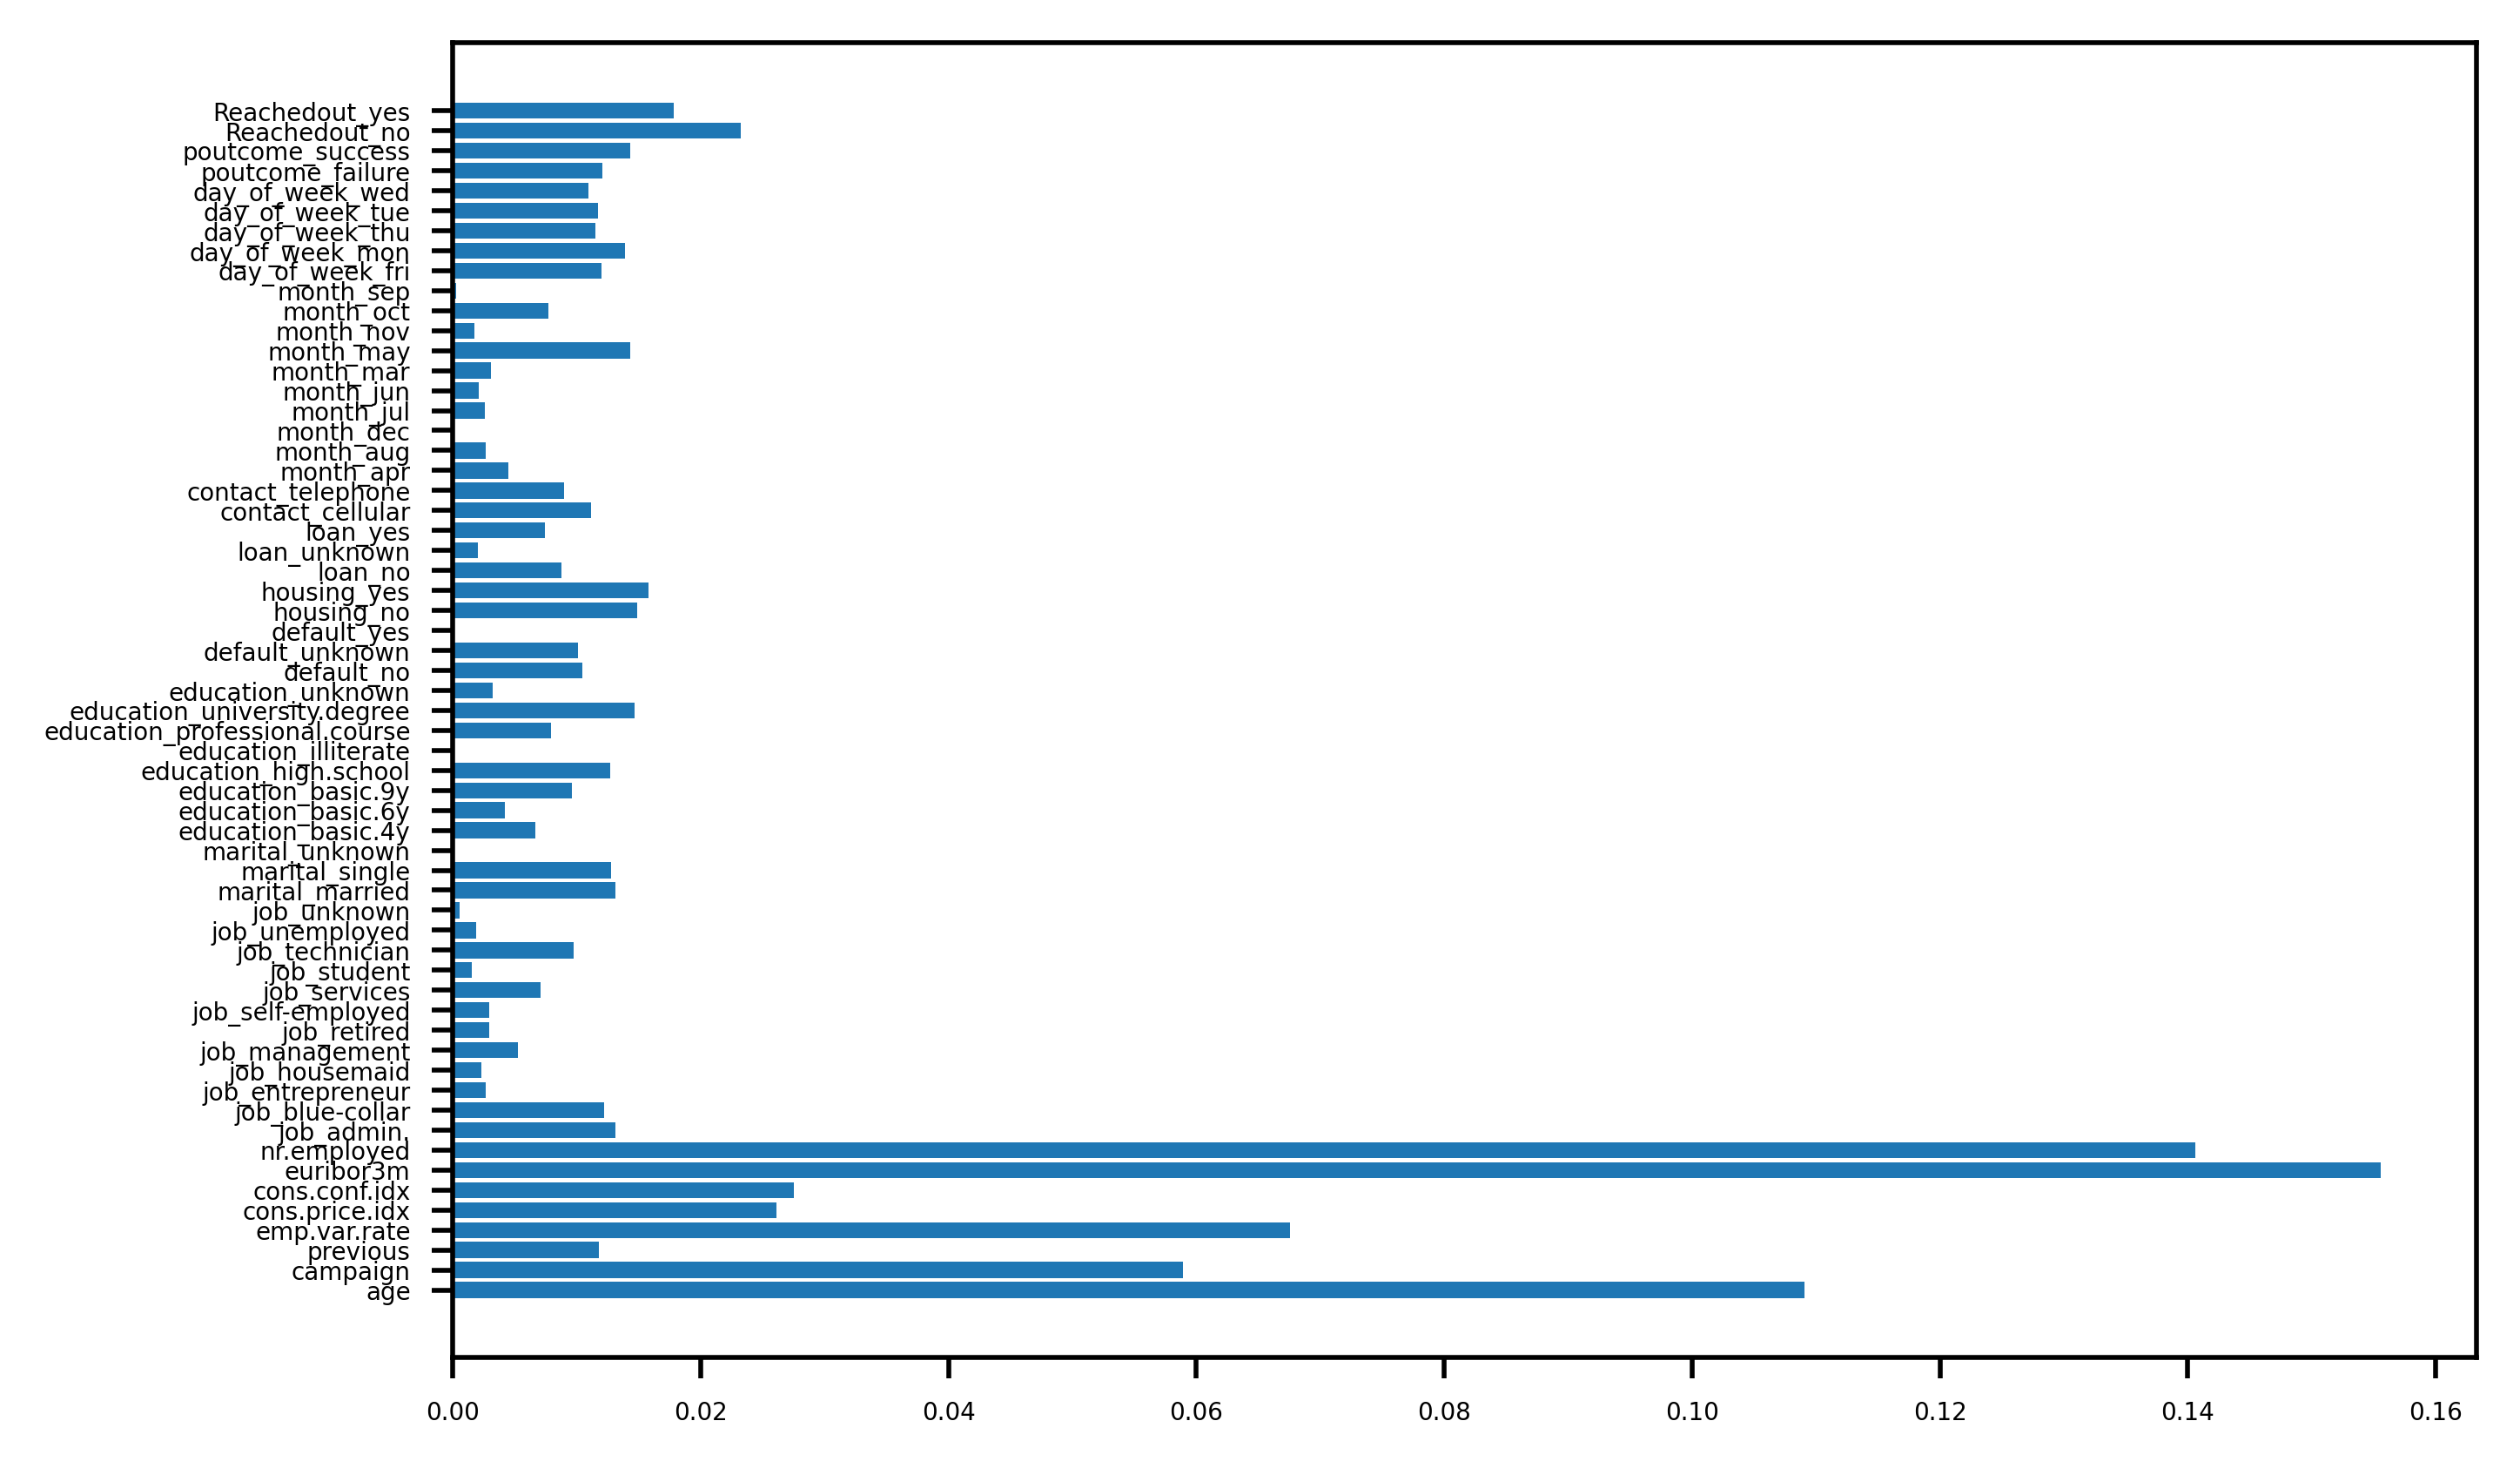

In [109]:
#we plot the rf feature importances to see which variables were of interest 
#source for original plan https://mljar.com/blog/feature-importance-in-random-forest/
#their code was: plt.barh(boston.feature_names, rf.feature_importances_) where i had to change the load_boston() because it wasnt a pd
#in the site above i realized that the feature_importances_ kept the column natural and all the rows identified directly with the columns
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 4})

plt.barh(X1.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

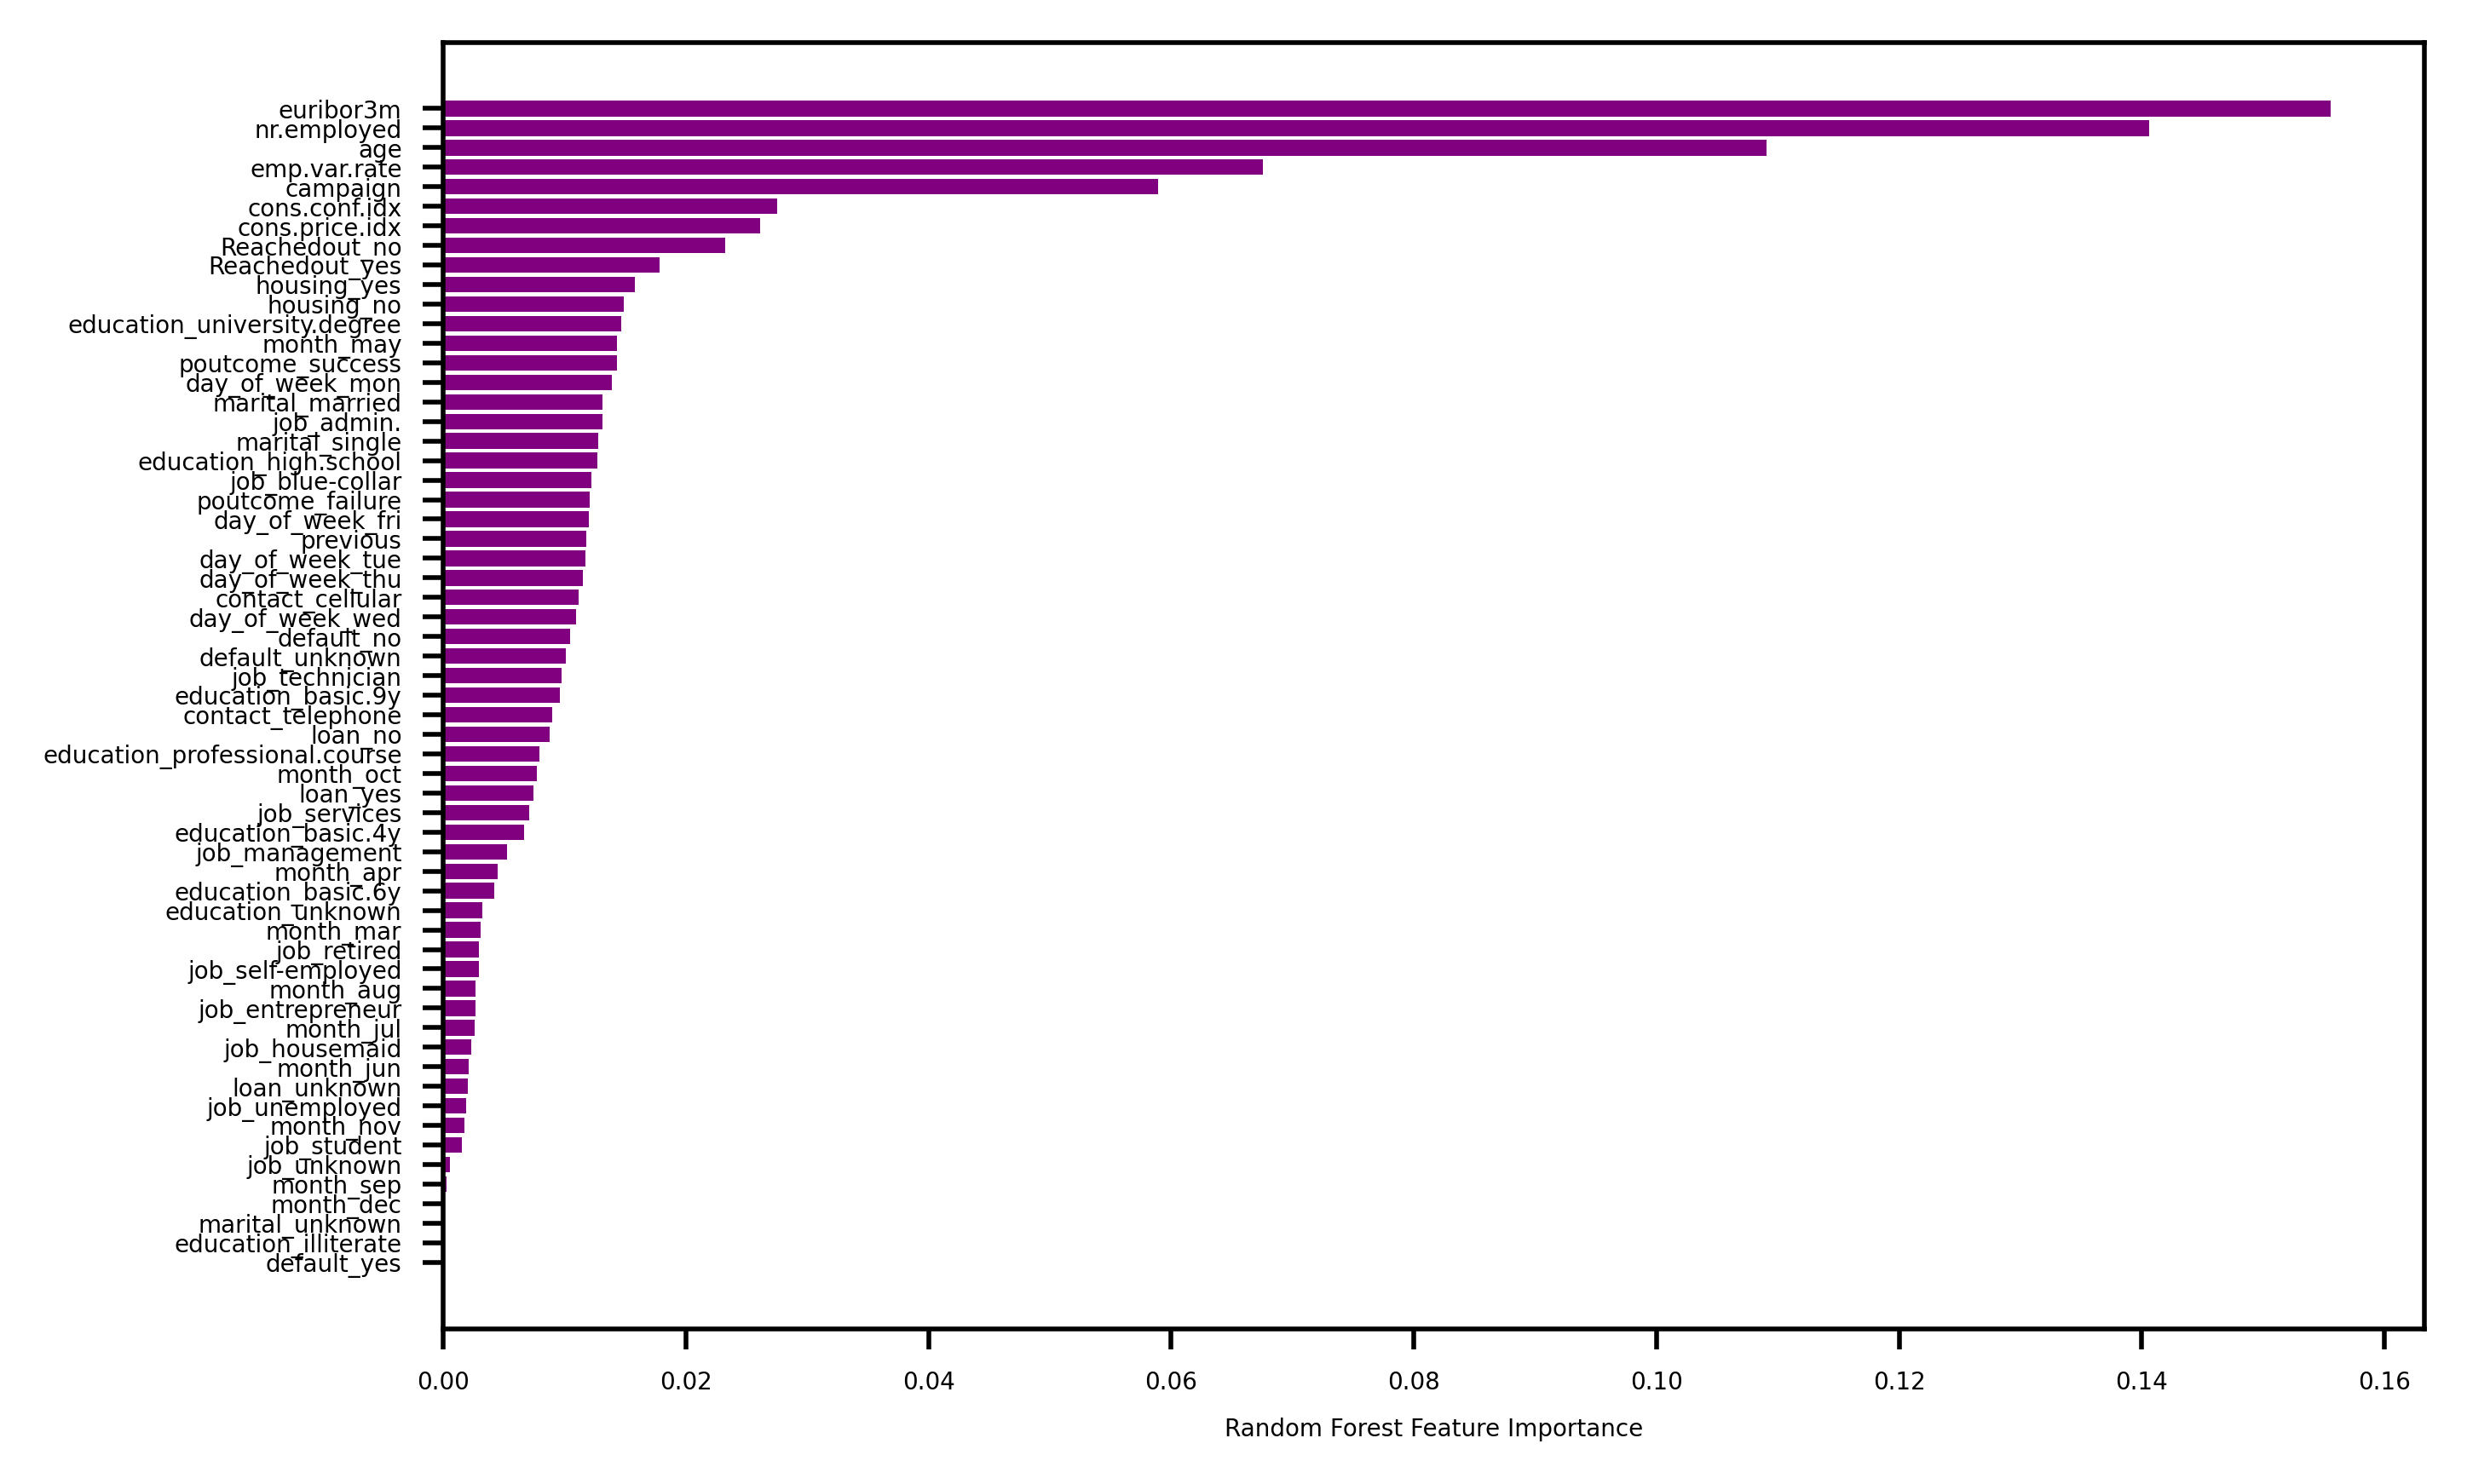

In [110]:
# code adapteed from same website
#this is the sorted array value
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html
sorted_idx = rf.feature_importances_.argsort()
#it gets passsed through the columns by both the x and y axis.
plt.barh(X1.columns[sorted_idx], rf.feature_importances_[sorted_idx], color='Purple')
plt.xlabel("Random Forest Feature Importance")

In [111]:
#create a topfeatures df  where feature is the list of the the column name
#feature importance is an rf fx to return the the score of the variable's impact on the model
#a larger score indiciates a high association with the model

top_features = pd.DataFrame({'Feature': list_of_x_train,
                            'Feature Importances': rf.feature_importances_})
top_features.sort_values('Feature Importances', inplace=True, ascending=False)
top_features = top_features[top_features['Feature Importances'] > 0]



In [112]:
top_features= top_features.head(10)
top_features.sort_values('Feature Importances', inplace=True, ascending=True)

In [113]:
Demographics_Customer = ['age']
Economics_internal_customer = []
Communication=['Reachedout_yes', 'Reachedout_no']
Campaign = ['campaign','poutcome_success', ]
Economics_external=['euribor3m', 'nr.employed', 'emp.var.rate', 'cons.conf.index', 'cons.price.index']

 

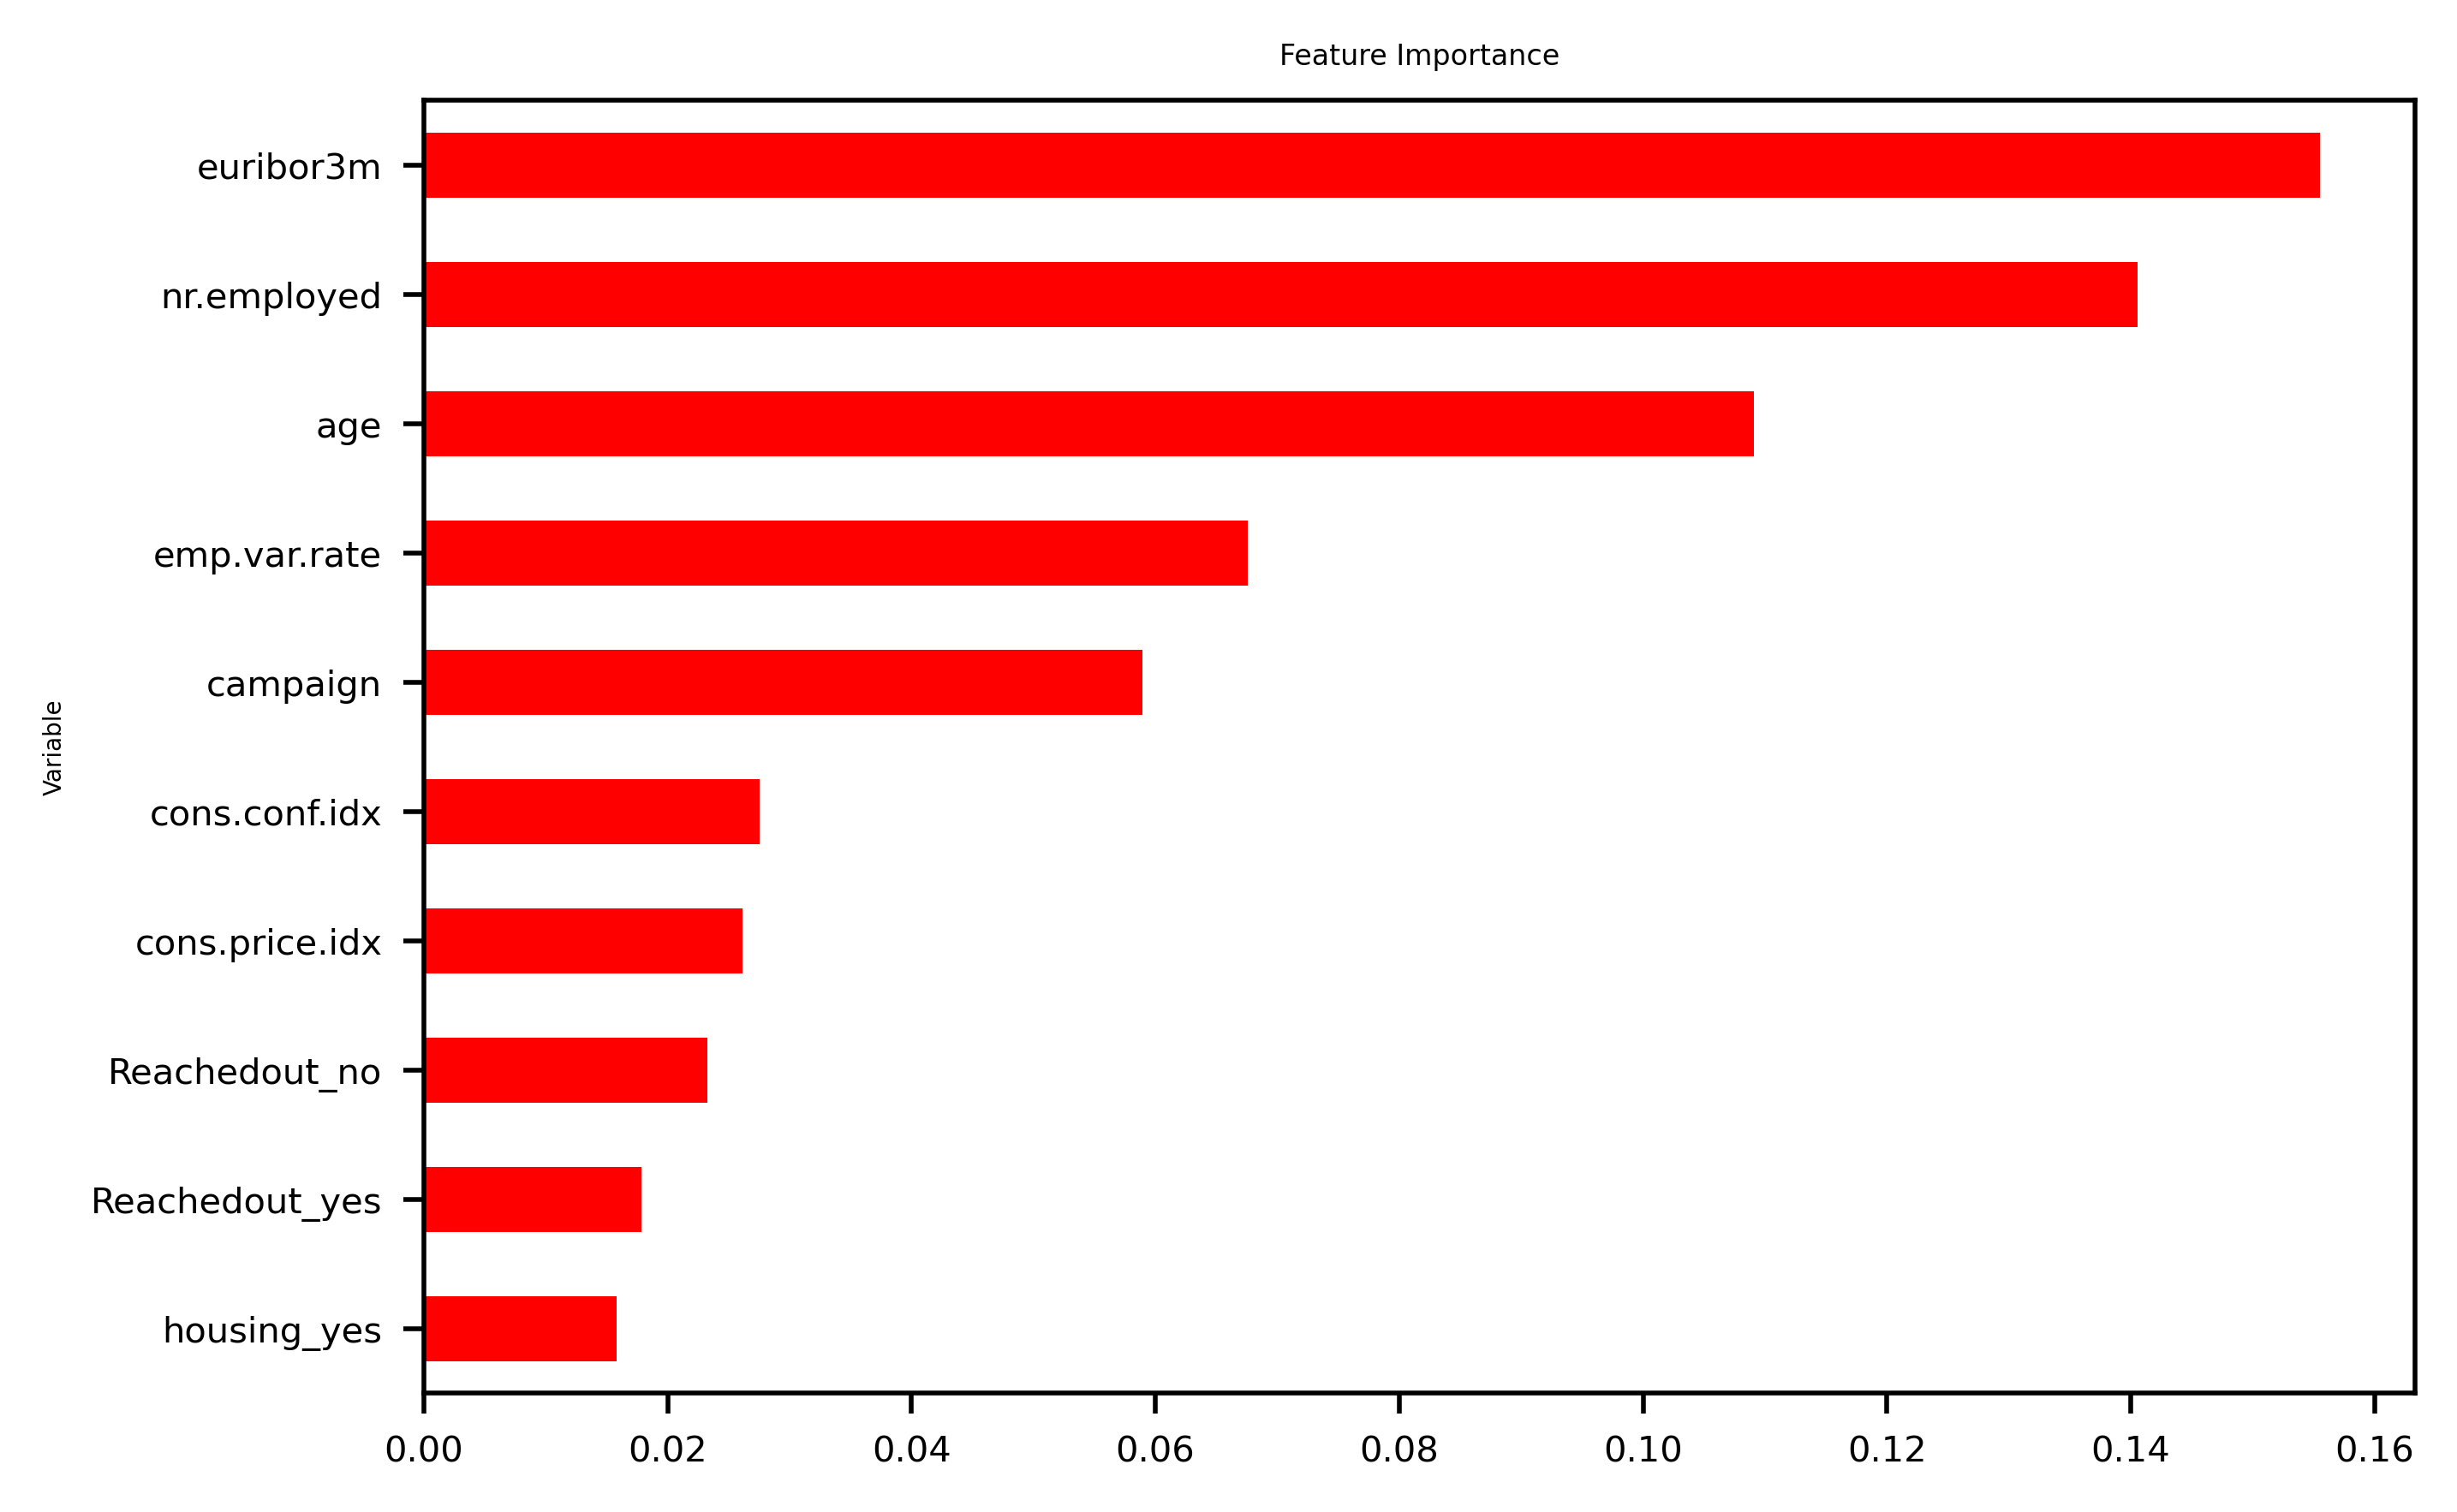

In [114]:
#plot
ax= top_features.plot.barh(x='Feature',y='Feature Importances',  
title ='Feature Importance',ylabel = 'Impact on Model from 0-1', xlabel = 'Variable',color='red', legend = False, fontsize = 6,  stacked=True)



The external economic factor is almost twice as influencetial as age. Which is closely followed by the emp var rate than campaign.
It is clear that this algorithim favors external factors more than other domains 

In [115]:
#classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     10968
           1       0.43      0.58      0.49      1389

    accuracy                           0.87     12357
   macro avg       0.69      0.74      0.71     12357
weighted avg       0.89      0.87      0.87     12357



We can see that the chances of prediciting a 1 overall is 50%, which is a coin flip. But when we look at the macro average we see 71% across both populations

In [116]:
#final validations
#should have done this from the start, see explanation at the bottom
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)

scoring = 'accuracy'
results = model_selection.cross_val_score(rf, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.2f" % (results.mean()))

10-fold cross validation average accuracy: 0.87


This 10 fold cross vallidation is not necessary because the decision tree innately distributes the subset, however with an additional 90-10 split stacked on top, we can calculate the mean of all fit()'s.

Limitations

A SHAP analysis is perferred because it is not the importance of the feature but rather the magnitude of impact it has on the cumulative tree decisions. This was not my possible on my current availabe resources. AWS may be necessary


In [117]:
#takes 2 minutes to run 
#plt.figure(figsize=(10,10))
#tree.plot_tree(rf.estimators_[19], filled = True)

# Recommendations and Further inquiries 

In [118]:
Demographics_Customer = ['age']
Economics_internal_customer = []
Communication=['Reachedout_yes', 'Reachedout_no']
Campaign = ['campaign','poutcome_success', ]
Economics_external=['euribor3m', 'nr.employed', 'emp.var.rate', 'cons.conf.index', 'cons.price.index']


- The Euriborm3m, nr.employed, emp.var.rate.cons.conf.index and cons.price.index are extremelemly important variables that dominate the feature importance

- Age is a very important variable in determing if they will either subscribe or not subscribe. There is a certain population that your calls work on and we need to find those 

- The way your campaigning is half as effective as the current economic state. Target the customers that have previously listened to your campaign before.

- Contacting your customers through whatever means of comunication is beneificial to your campaign. 

- This model cannot distinguish independently what is more importannt in making a (1) decision. Interpretation is necessary by further investigation.

Thank you

End of notebook 